In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import os,glob,sys
import pylheV
import scipy as sc

sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [3]:
particlesDict = {}

In [4]:
with open("particles.xml") as f:
    xmlStr = f.read()
    xmlStr = "<root>\n" + xmlStr[:] + "</root>" 
root = ET.fromstring(xmlStr)

In [5]:
for particle in root:
    particleData  = particle.attrib
    pid = int(particleData['id'])
    particlesDict[pid] = {}
    for attr,val in particle.attrib.items():
        try:
            particlesDict[pid][attr] = eval(val) #Try to evaluate attribute
        except:
            particlesDict[pid][attr] = val

In [6]:
def getKey(my_value,d):    
    return next(key for key, value in d.items() if value == my_value)

In [7]:
def event_selector(nmin = 0, nmax = 1e5, dictionary = {}):
    eventDict = {}
    for key in dictionary:
        if dictionary[key] <= nmax and dictionary[key] >= nmin:
            eventDict[key] = dictionary[key]
        
    return eventDict

In [8]:
#No sort
def dictName1(file_name):
    
    eventDict = {}
    for n,e in enumerate(pylheV.readLHE(file_name)):
        f_ptc = ''
        for ptc in e.particles:
            if ptc.status > 0:
                if ptc.id > 0:
                    f_ptc = f_ptc + particlesDict[ptc.id]['name']
                else:
                    f_ptc = f_ptc + particlesDict[abs(ptc.id)]['antiName']
        if (eventDict.get(f_ptc)) == None:
            eventDict[f_ptc] = 1       
        else:
            eventDict[f_ptc] +=1
    
    return eventDict

In [9]:
def cleaner(f_ptc):
    f_ptc = np.sort(f_ptc)
    final = [f_ptc[0]]
    count = [1]
    j = 0
    for i in range(len(f_ptc)-1):
        if f_ptc[i+1] != f_ptc[i]:
            final.append(f_ptc[i+1])
            count.append(1)
            j+=1
        else:
            count[j] += 1
        
            
    return final, count
            
            


In [10]:
#Neutrinos in the output are given by adding or removing 'and abs(ptc.id) != 12 and abs(ptc.id) != 14 and abs(ptc.id) != 16' after ptc.status > 0
def dictName(file_name):
    
    eventDict = {}
    for n,e in enumerate(pylheV.readLHE(file_name)):
        f_ptc = []
        for ptc in e.particles:
            if ptc.status > 0:
                f_ptc.append(ptc.id)
   
        f_ptc = np.sort(f_ptc)
        f_ptc, count = cleaner(f_ptc)
        final = ''
        for i,f in enumerate(f_ptc):
            if f > 0:
                if count[i] == 1:
                    final = final + particlesDict[f]['name']
                else:
                    final = final + str(count[i]) +  particlesDict[f]['name']
            else:
                if count[i] == 1:
                    final = final + particlesDict[abs(f)]['antiName']
                else:
                    final = final + str(count[i]) +  particlesDict[abs(f)]['antiName']
                
        if (eventDict.get(final)) == None:
            eventDict[final] = 1       
        else:
            eventDict[final] +=1
    
    return eventDict

In [11]:
def dictID(file_name):
    
    eventDict = {}
    
    for n,e in enumerate(pylheV.readLHE(file_name)):
        f_ptc = []
        for ptc in e.particles:
            if ptc.status > 0:
                f_ptc.append(ptc.id)
   
        f_ptc = np.sort(f_ptc)
        f_ptc = tuple(f_ptc)
        
        if f_ptc in eventDict:
            eventDict[f_ptc] += 1
        else:
            eventDict[f_ptc] = 1
        
    
    return eventDict

In [12]:
def final_state(eDict,fstate):
    fstate_frac = [0,0,0,0,0,0,0,0,0,0,0]
    for i,dicti in enumerate(eDict):
        fstate_frac[i] = dicti.get(fstate,0)
        fstate_frac[i] = fstate_frac[i]/10000
    return fstate_frac

In [13]:
eventDict1 = dictID('output_1GeV.lhe')
#for key, value in eventDict1.items():
    #print(key)
print(eventDict1)

{(-11.0, 11.0): 9772, (22.0, 22.0): 185, (-13.0, 13.0): 36, (-13.0, 13.0, 22.0): 6, (-13.0, 13.0, 22.0, 22.0): 1}


In [14]:
file_name = ['output_1GeV.lhe','output_3GeV.lhe','output_6GeV.lhe','output_9GeV.lhe','output_12GeV.lhe', 'output_15GeV.lhe']
eventDict = []
for file in file_name:
    eventDict.append(dictName(file))

In [15]:
fName = ['output_1GeV.lhe','output_1dot5GeV.lhe','output_3GeV.lhe','output_4dot5GeV.lhe','output_6GeV.lhe','output_7dot5GeV.lhe','output_9GeV.lhe','output_10dot5GeV.lhe','output_12GeV.lhe','output_13dot5GeV.lhe', 'output_15GeV.lhe']
eDict = []
for file in fName:
    eDict.append(dictName(file))

In [16]:
print(eDict[4])

{'$e^+$$e^-$': 9844, '$\\mu^+$$\\mu^-$': 11, '$\\pi^-$$\\bar{\\nu}_\\tau$$e^+$$\\nu_e$$\\nu_\\tau$': 2, '2$\\gamma$': 117, '2$\\pi^-$$\\bar{\\nu}_\\tau$$\\nu_\\tau$2$\\gamma$$K_L^0$2$\\pi^+$': 1, '$\\mu^+$$\\mu^-$$\\gamma$': 7, '$\\pi^-$$\\bar{\\nu}_\\tau$$\\nu_\\tau$2$\\gamma$$\\pi^+$': 3, '2$\\pi^-$$\\bar{\\nu}_\\tau$$e^+$$\\nu_e$$\\nu_\\tau$$\\pi^+$': 1, '3$\\pi^-$$\\bar{\\nu}_\\tau$$\\nu_\\tau$2$\\gamma$3$\\pi^+$': 1, '2$\\pi^-$$\\bar{\\nu}_\\tau$$\\nu_\\tau$6$\\gamma$2$\\pi^+$': 1, '$\\bar{\\nu}_\\tau$$\\bar{\\nu}_\\mu$$\\mu^-$$\\nu_\\tau$2$\\gamma$$\\pi^+$': 3, '$\\bar{\\nu}_\\tau$$\\bar{\\nu}_\\mu$$\\mu^+$$\\mu^-$$\\nu_\\mu$$\\nu_\\tau$': 1, '$\\bar{\\nu}_\\tau$$\\bar{\\nu}_e$$e^-$$\\nu_\\tau$4$\\gamma$$\\pi^+$': 1, '$\\bar{\\nu}_\\tau$$\\bar{\\nu}_\\mu$$\\mu^-$$\\nu_\\tau$4$\\gamma$$K_L^0$$\\pi^+$': 1, '$\\pi^-$$\\bar{\\nu}_\\tau$$e^+$$\\nu_e$$\\nu_\\tau$2$\\gamma$': 1, '2$\\pi^-$$\\bar{\\nu}_\\tau$$e^+$$\\nu_e$$\\nu_\\tau$2$\\gamma$$\\pi^+$': 1, '$\\bar{\\nu}_\\tau$$\\bar{\\nu

In [17]:
#Final states with mu+mu- 
mupmum_frac = [0,0,0,0,0,0,0,0,0,0,0]
for i,dicti in enumerate(eventDict):
    mupmum_frac[i] = dicti.get('$\\mu^+$$\\mu^-$',0) + dicti.get('$\\mu^+$$\\mu^-$$\\gamma$',0) + dicti.get('$\\mu^+$$\\mu^-$2$\\gamma$',0) + dicti.get('$\\mu^+$$\\mu^-$3$\\gamma$',0) + dicti.get('$\\mu^+$$\\mu^-$4$\\gamma$',0)
    mupmum_frac[i] = mupmum_frac[i]/10000
        

In [18]:
#Final states with 2 photons
dPhoton_frac = final_state(eDict,'2$\\gamma$')
#Final states with e+e-
epem_frac = final_state(eDict,'$\\pi^-$$\\bar{\\nu}_\\tau$$e^+$$\\nu_e$$\\nu_\\tau$')


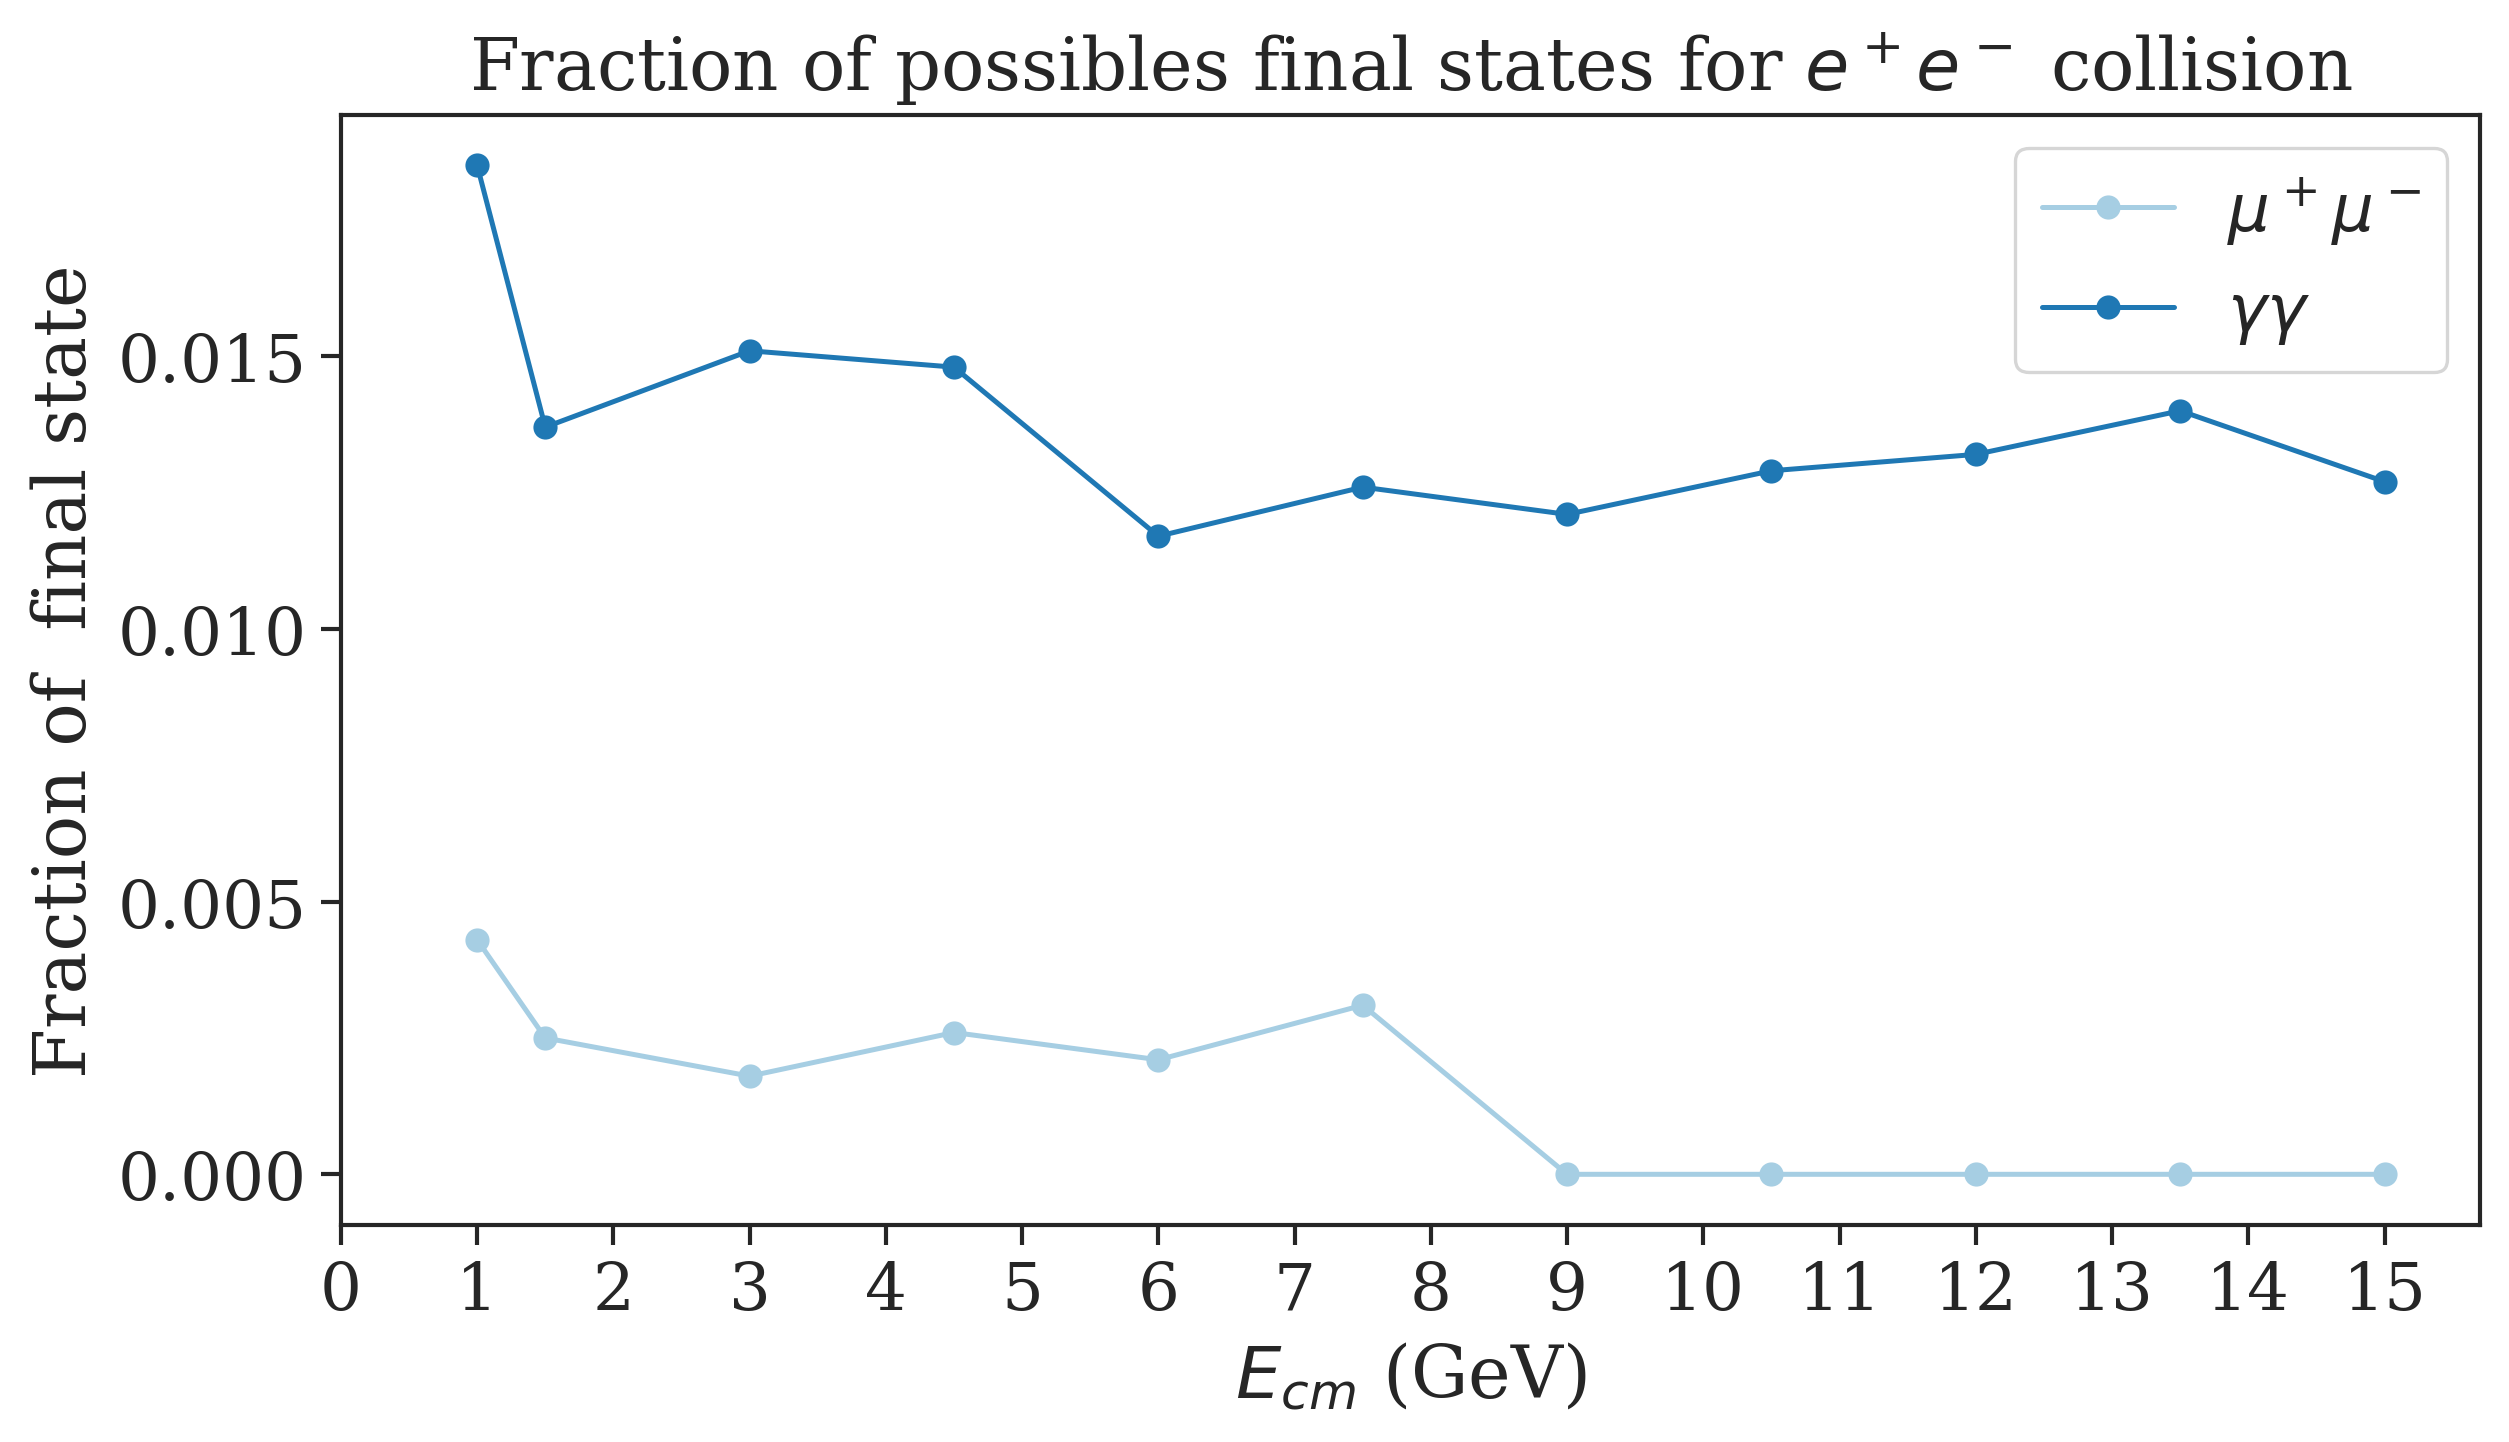

In [19]:
energy = [1,1.5,3,4.5,6,7.5,9,10.5,12,13.5,15]

fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
plt.plot(energy,final_state(eDict,'$\\pi^-$$\\bar{\\nu}_\\tau$$e^+$$\\nu_e$$\\nu_\\tau$'), marker = 'o', label = r'$\mu^+\mu^-$')
#plt.plot(energy,epem_frac, marker = 'o')
plt.title(r'Fraction of possibles final states for $e^+e^-$ collision')
plt.xlabel(r'$E_{cm}$ (GeV)')
plt.ylabel(r'Fraction of  final state')
plt.xticks(range(0,16))
plt.legend()
plt.show()

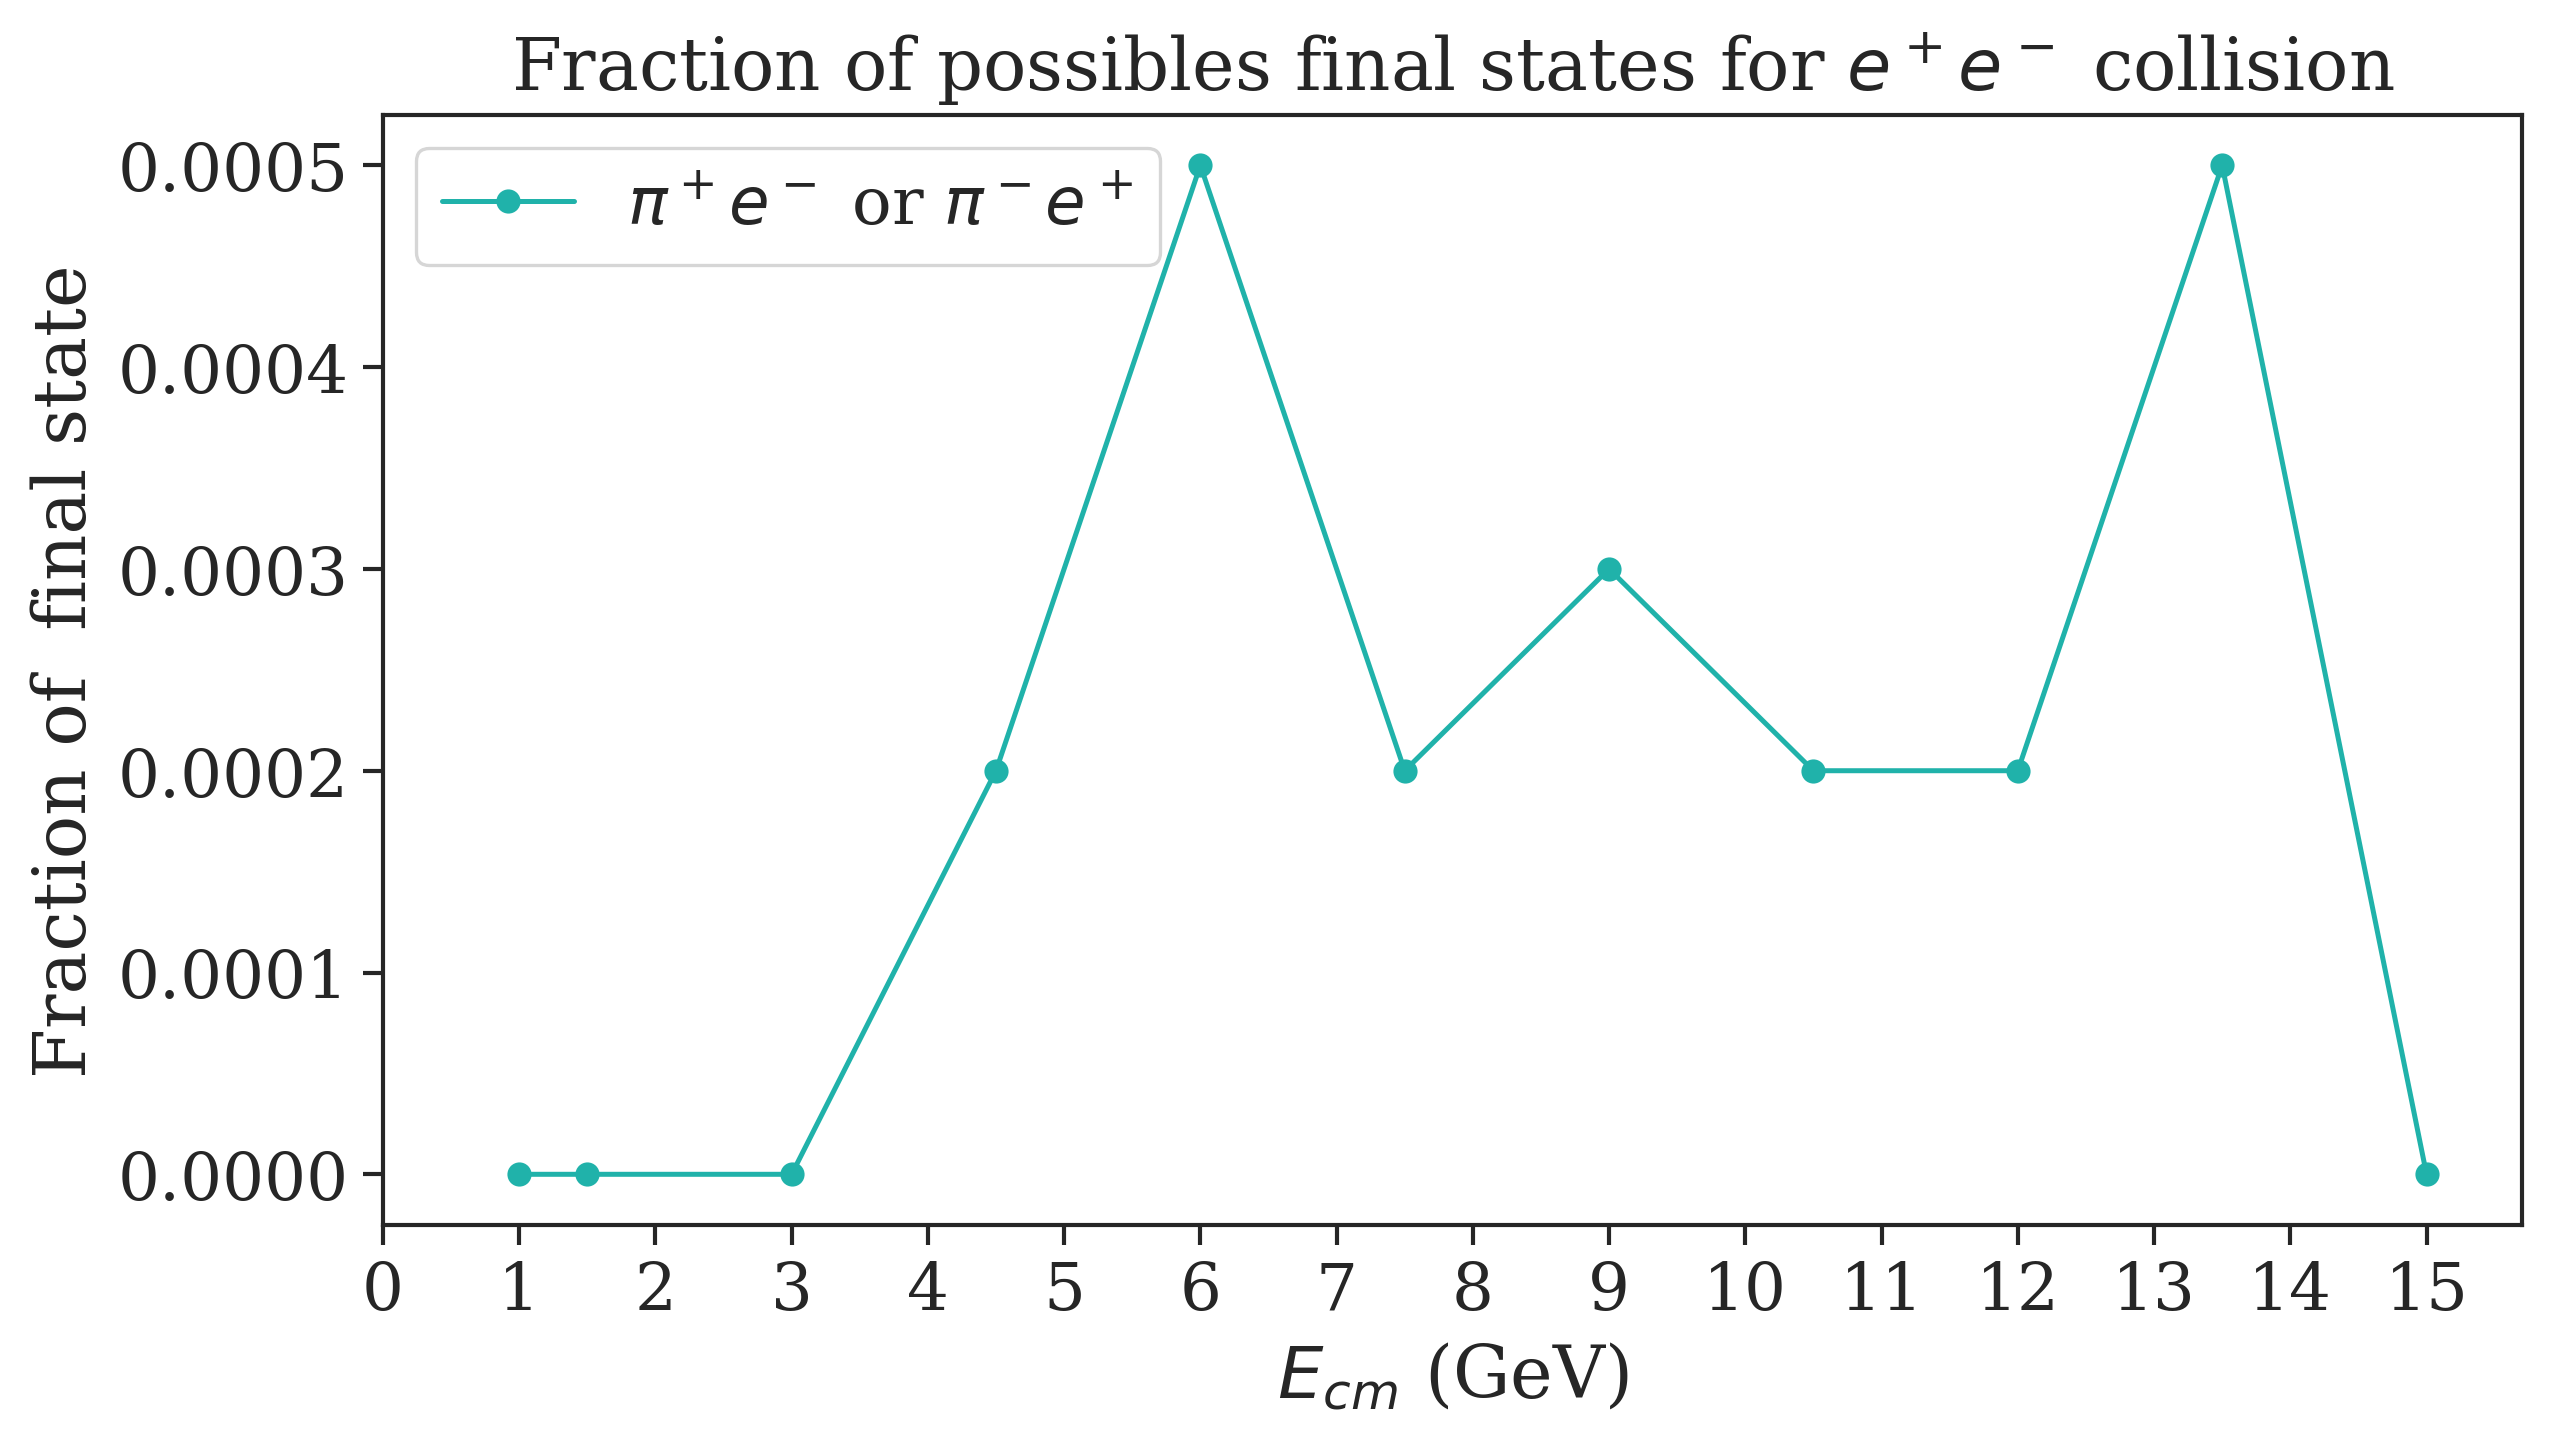

In [37]:
energy = [1,1.5,3,4.5,6,7.5,9,10.5,12,13.5,15]

#Final states with mu+mu- 
state_frac = [0,0,0,0,0,0,0,0,0,0,0]
for i,dicti in enumerate(eDict):
    state_frac[i] = dicti.get('$\\pi^-$$\\bar{\\nu}_\\tau$$e^+$$\\nu_e$$\\nu_\\tau$',0) + dicti.get('$\\pi^-$$\\bar{\\nu}_\\tau$$e^+$$\\nu_e$$\\nu_\\tau$2$\\gamma$',0) + dicti.get('$\\bar{\\nu}_\\tau$$\\bar{\\nu}_e$$e^-$$\\nu_\\tau$$\\pi^+$',0) + dicti.get('$\\bar{\\nu}_\\tau$$\\bar{\\nu}_e$$e^-$$\\nu_\\tau$$\\pi^+$',0) 
    state_frac[i] = state_frac[i]/10000



fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
plt.plot(energy,state_frac, marker = 'o', label = r'$\pi^+e^-$ or $\pi^-e^+$', color = 'lightseagreen')

#plt.plot(energy,epem_frac, marker = 'o')
plt.title(r'Fraction of possibles final states for $e^+e^-$ collision')
plt.xlabel(r'$E_{cm}$ (GeV)')
plt.ylabel(r'Fraction of  final state')
plt.xticks(range(0,16))
plt.legend()
plt.show()

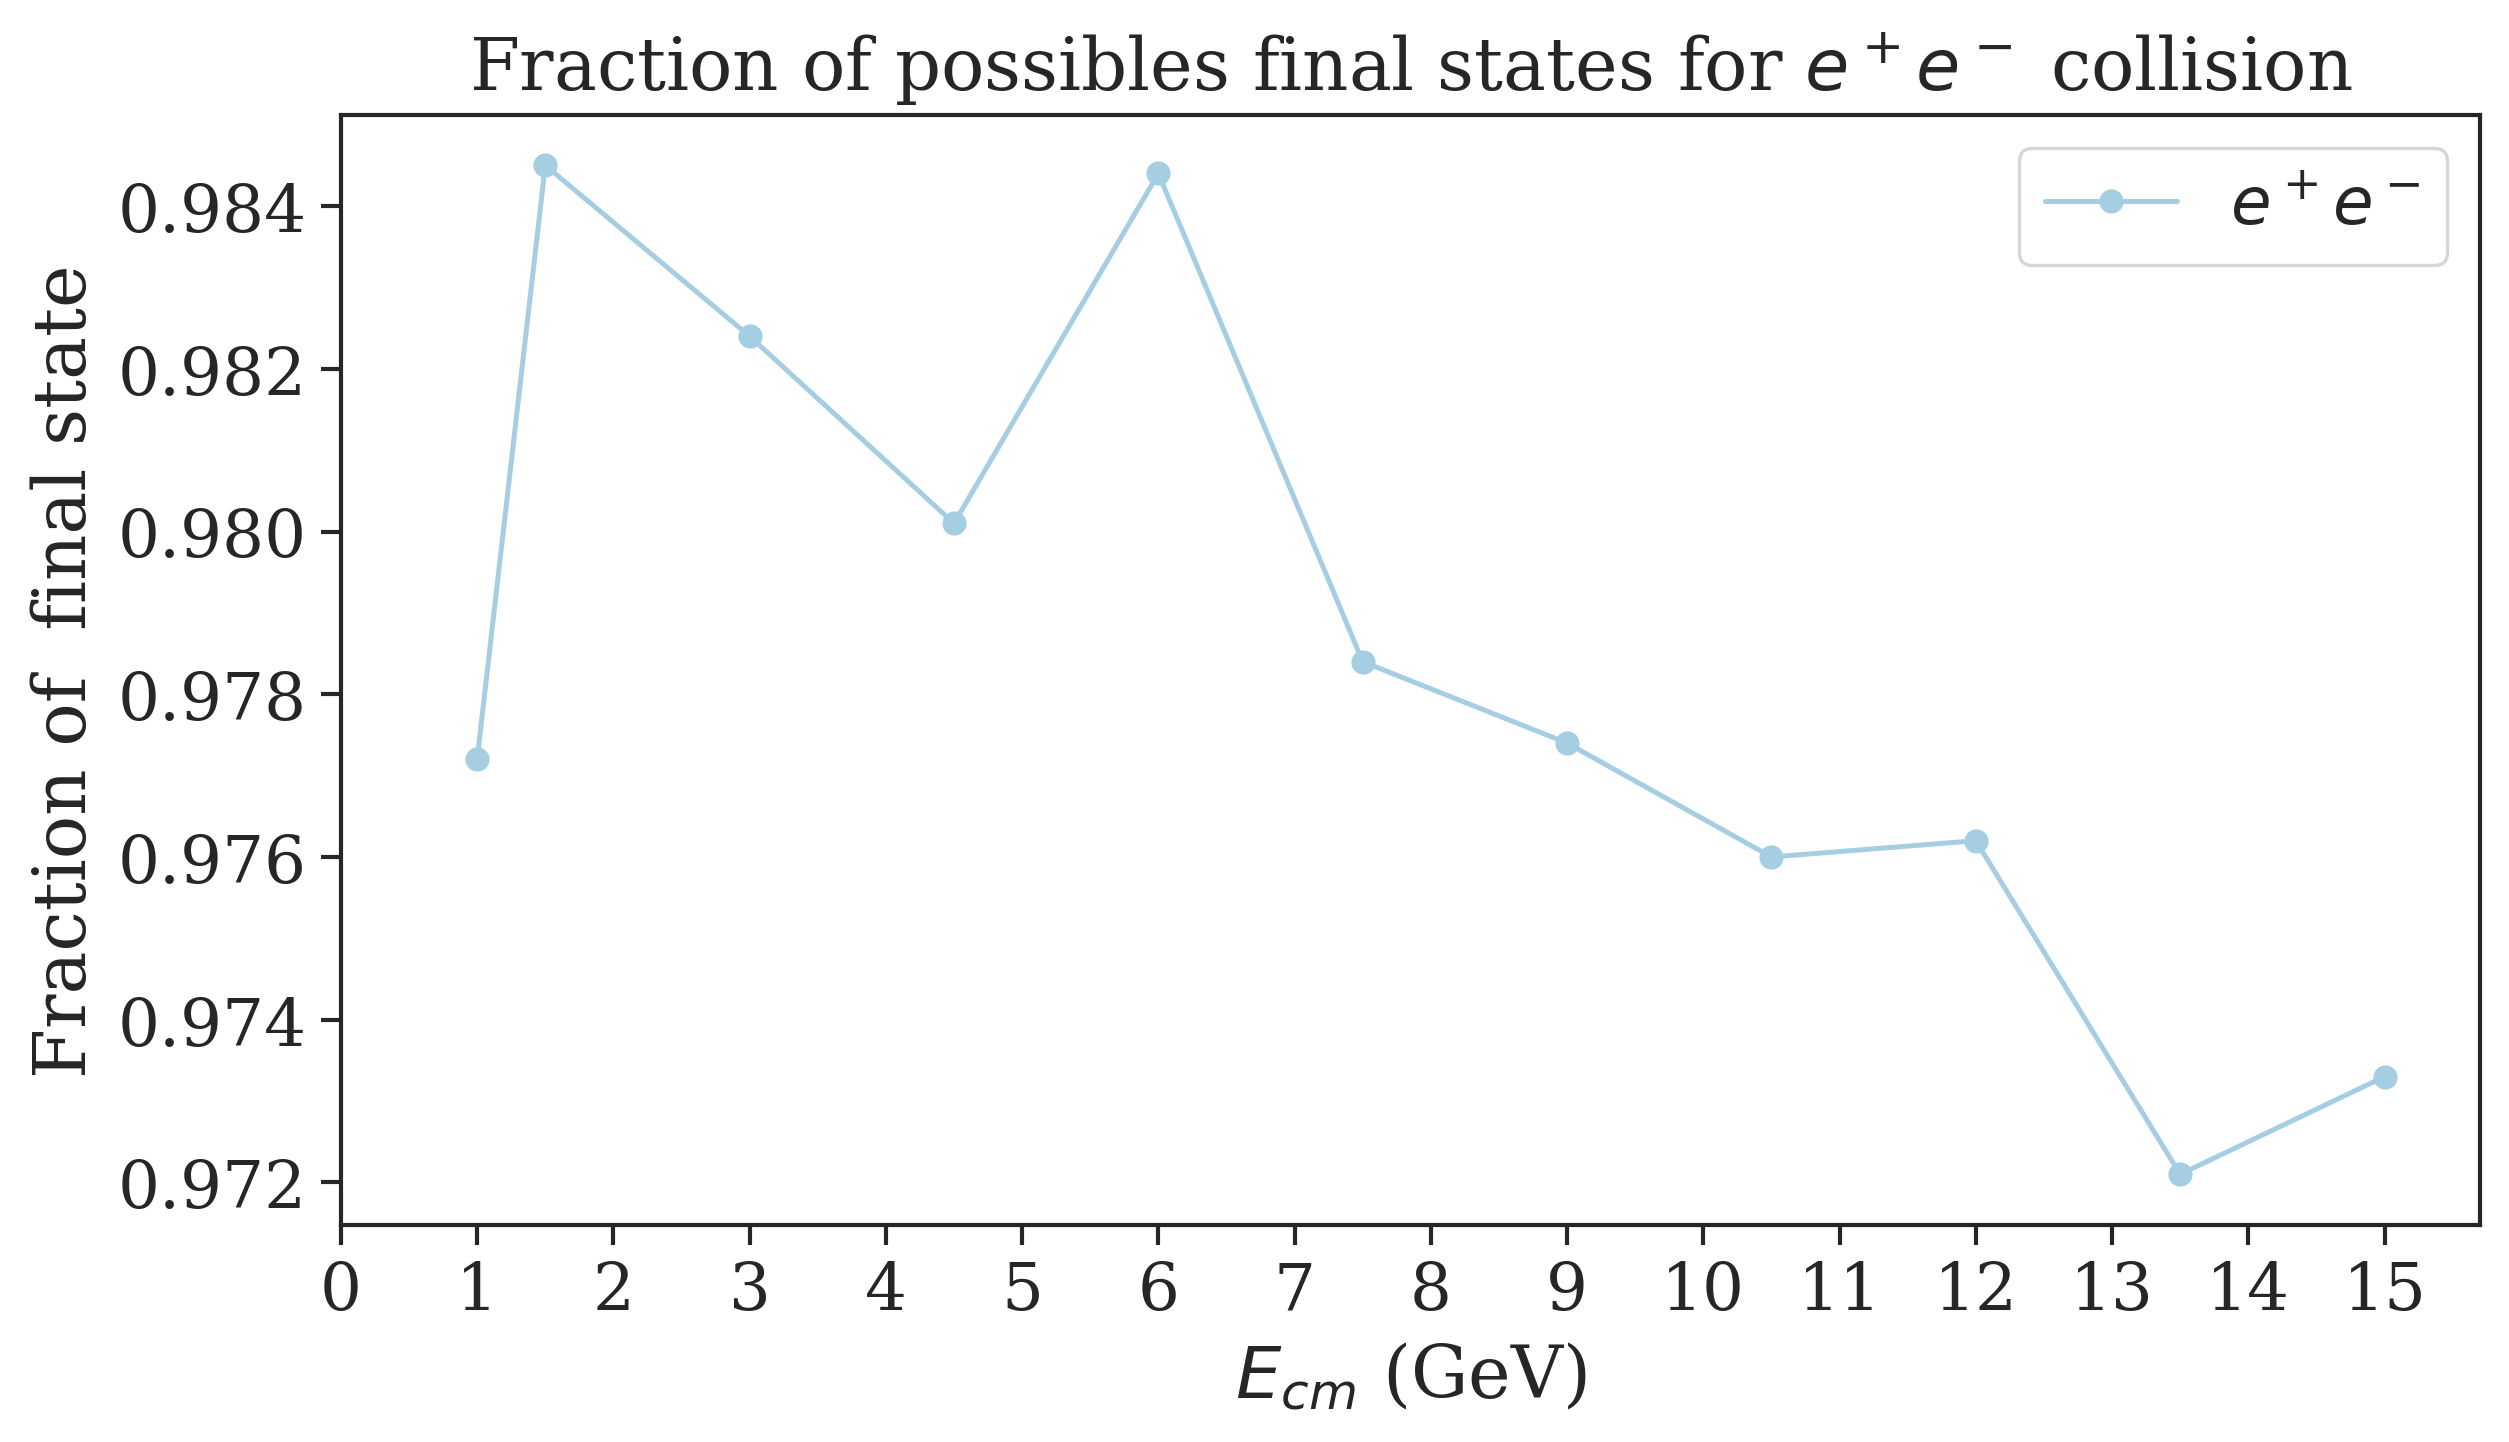

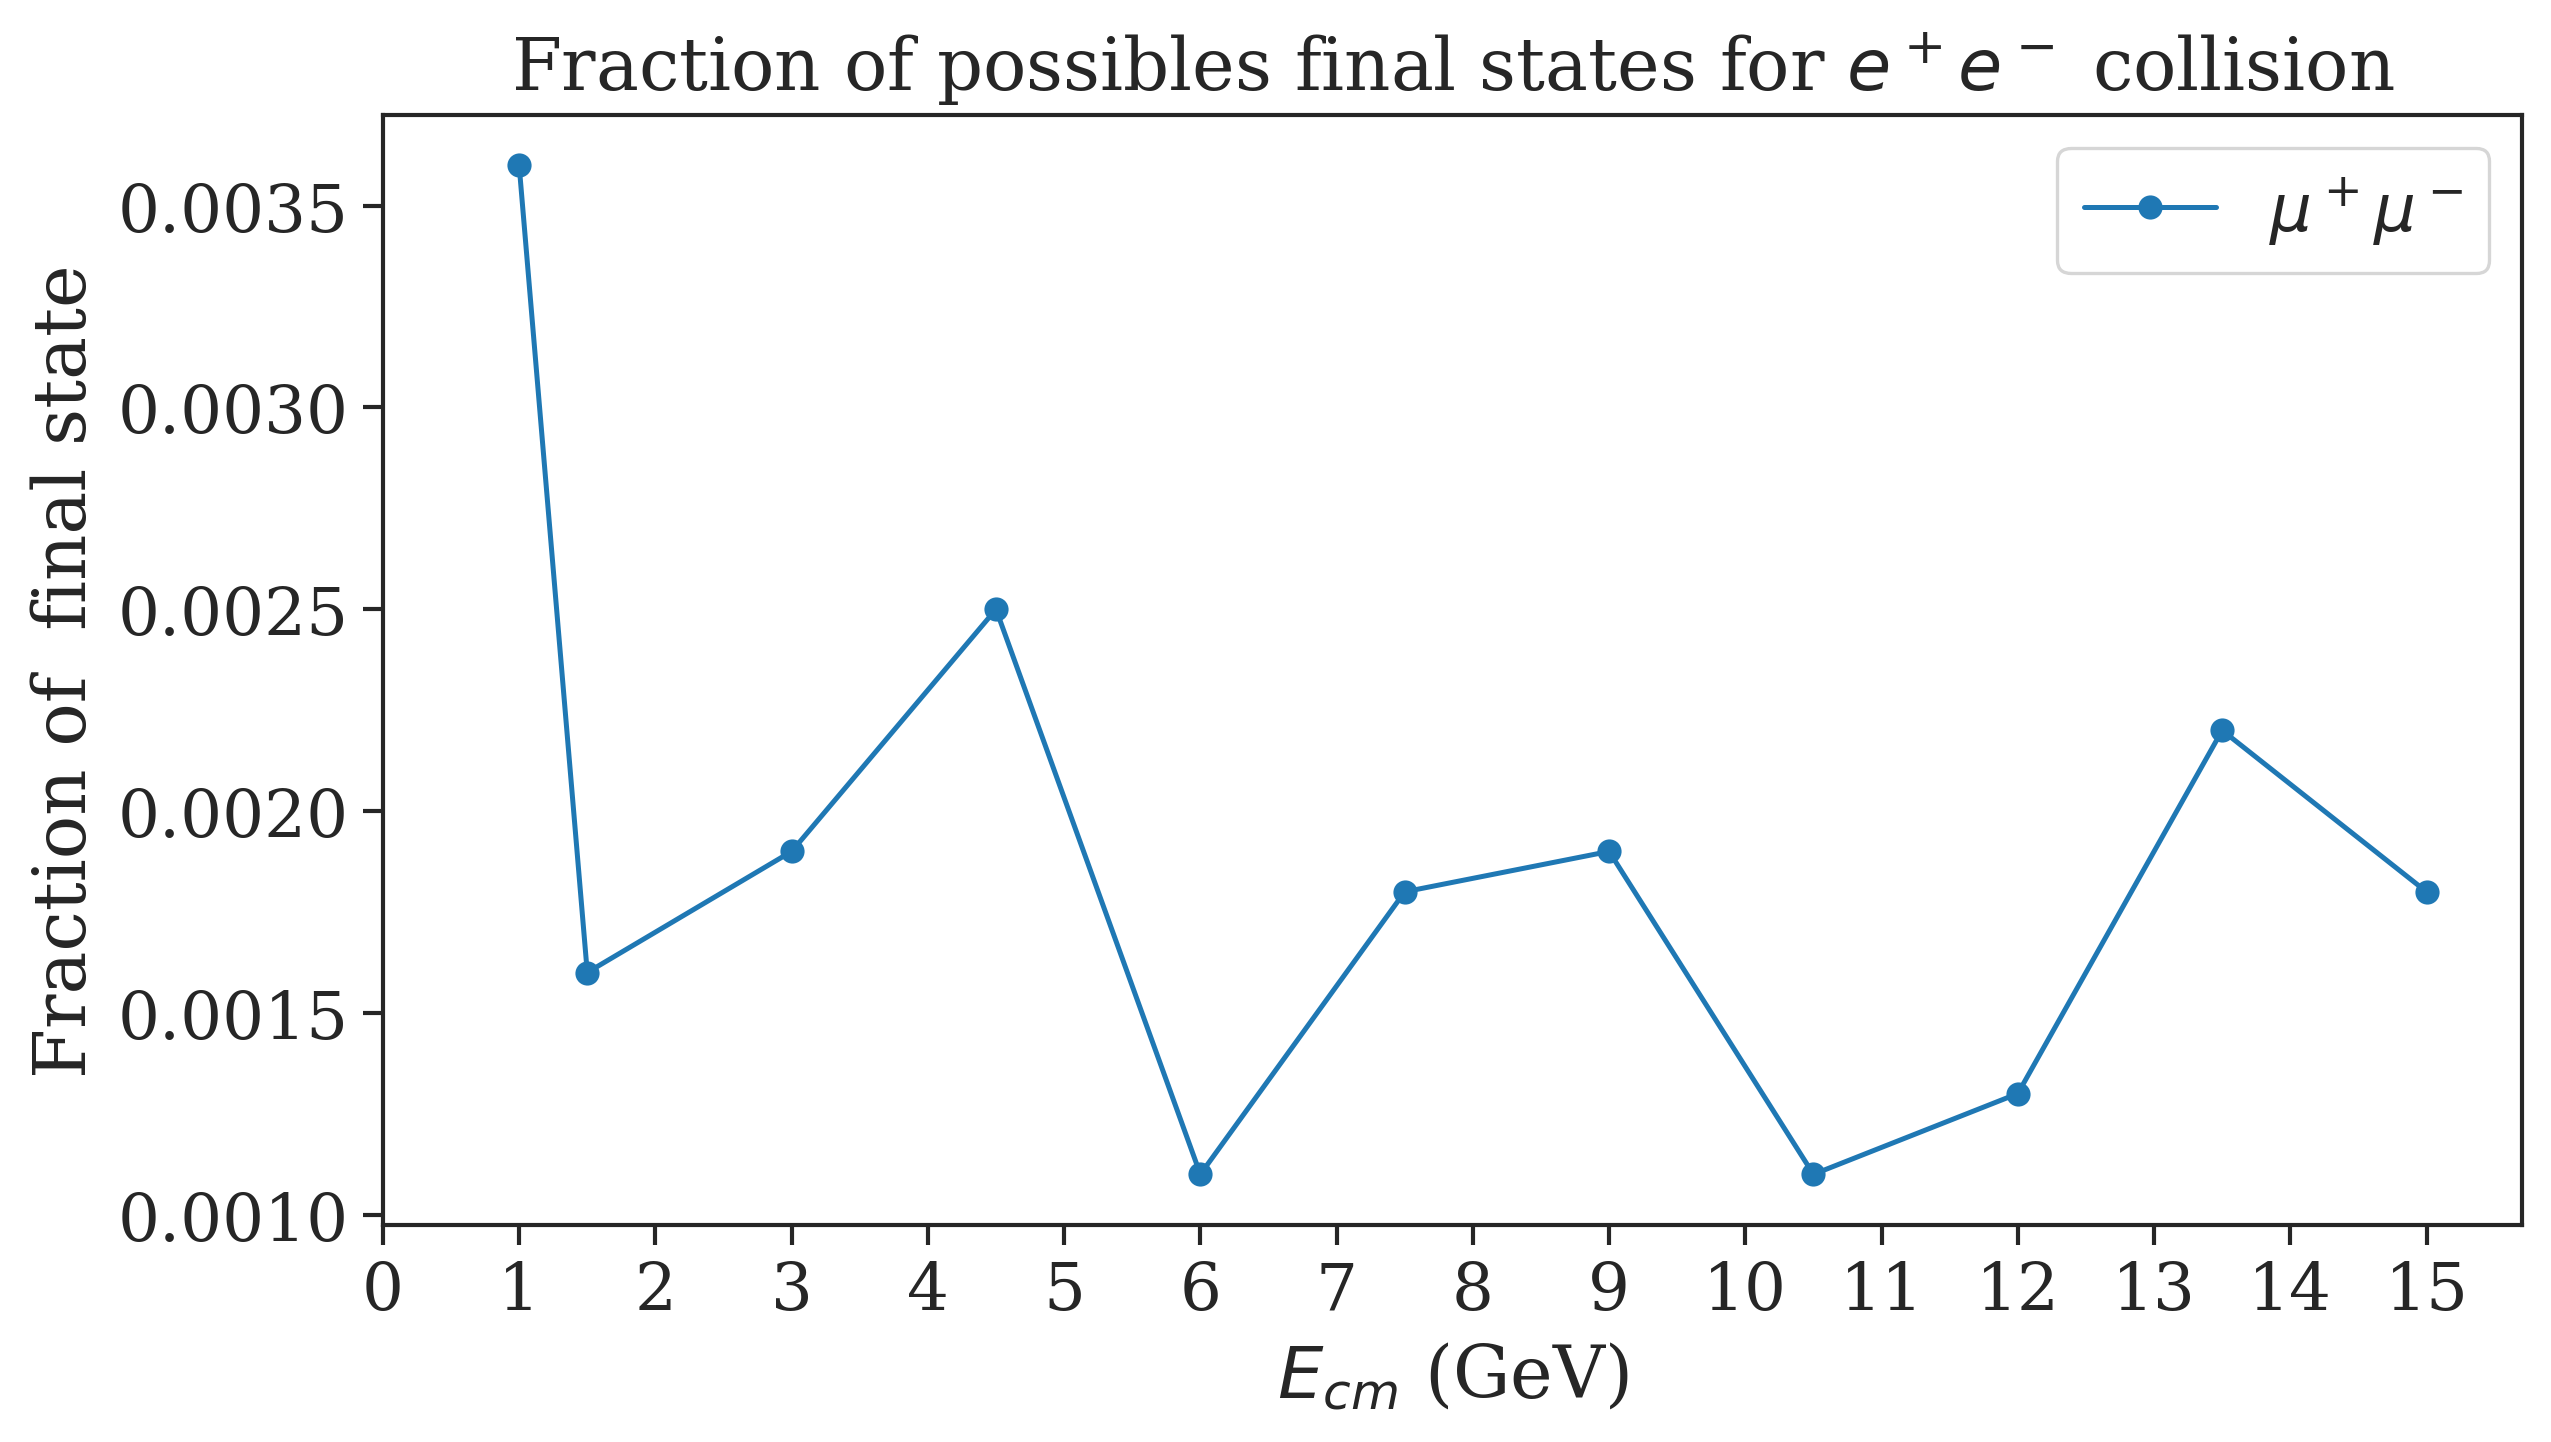

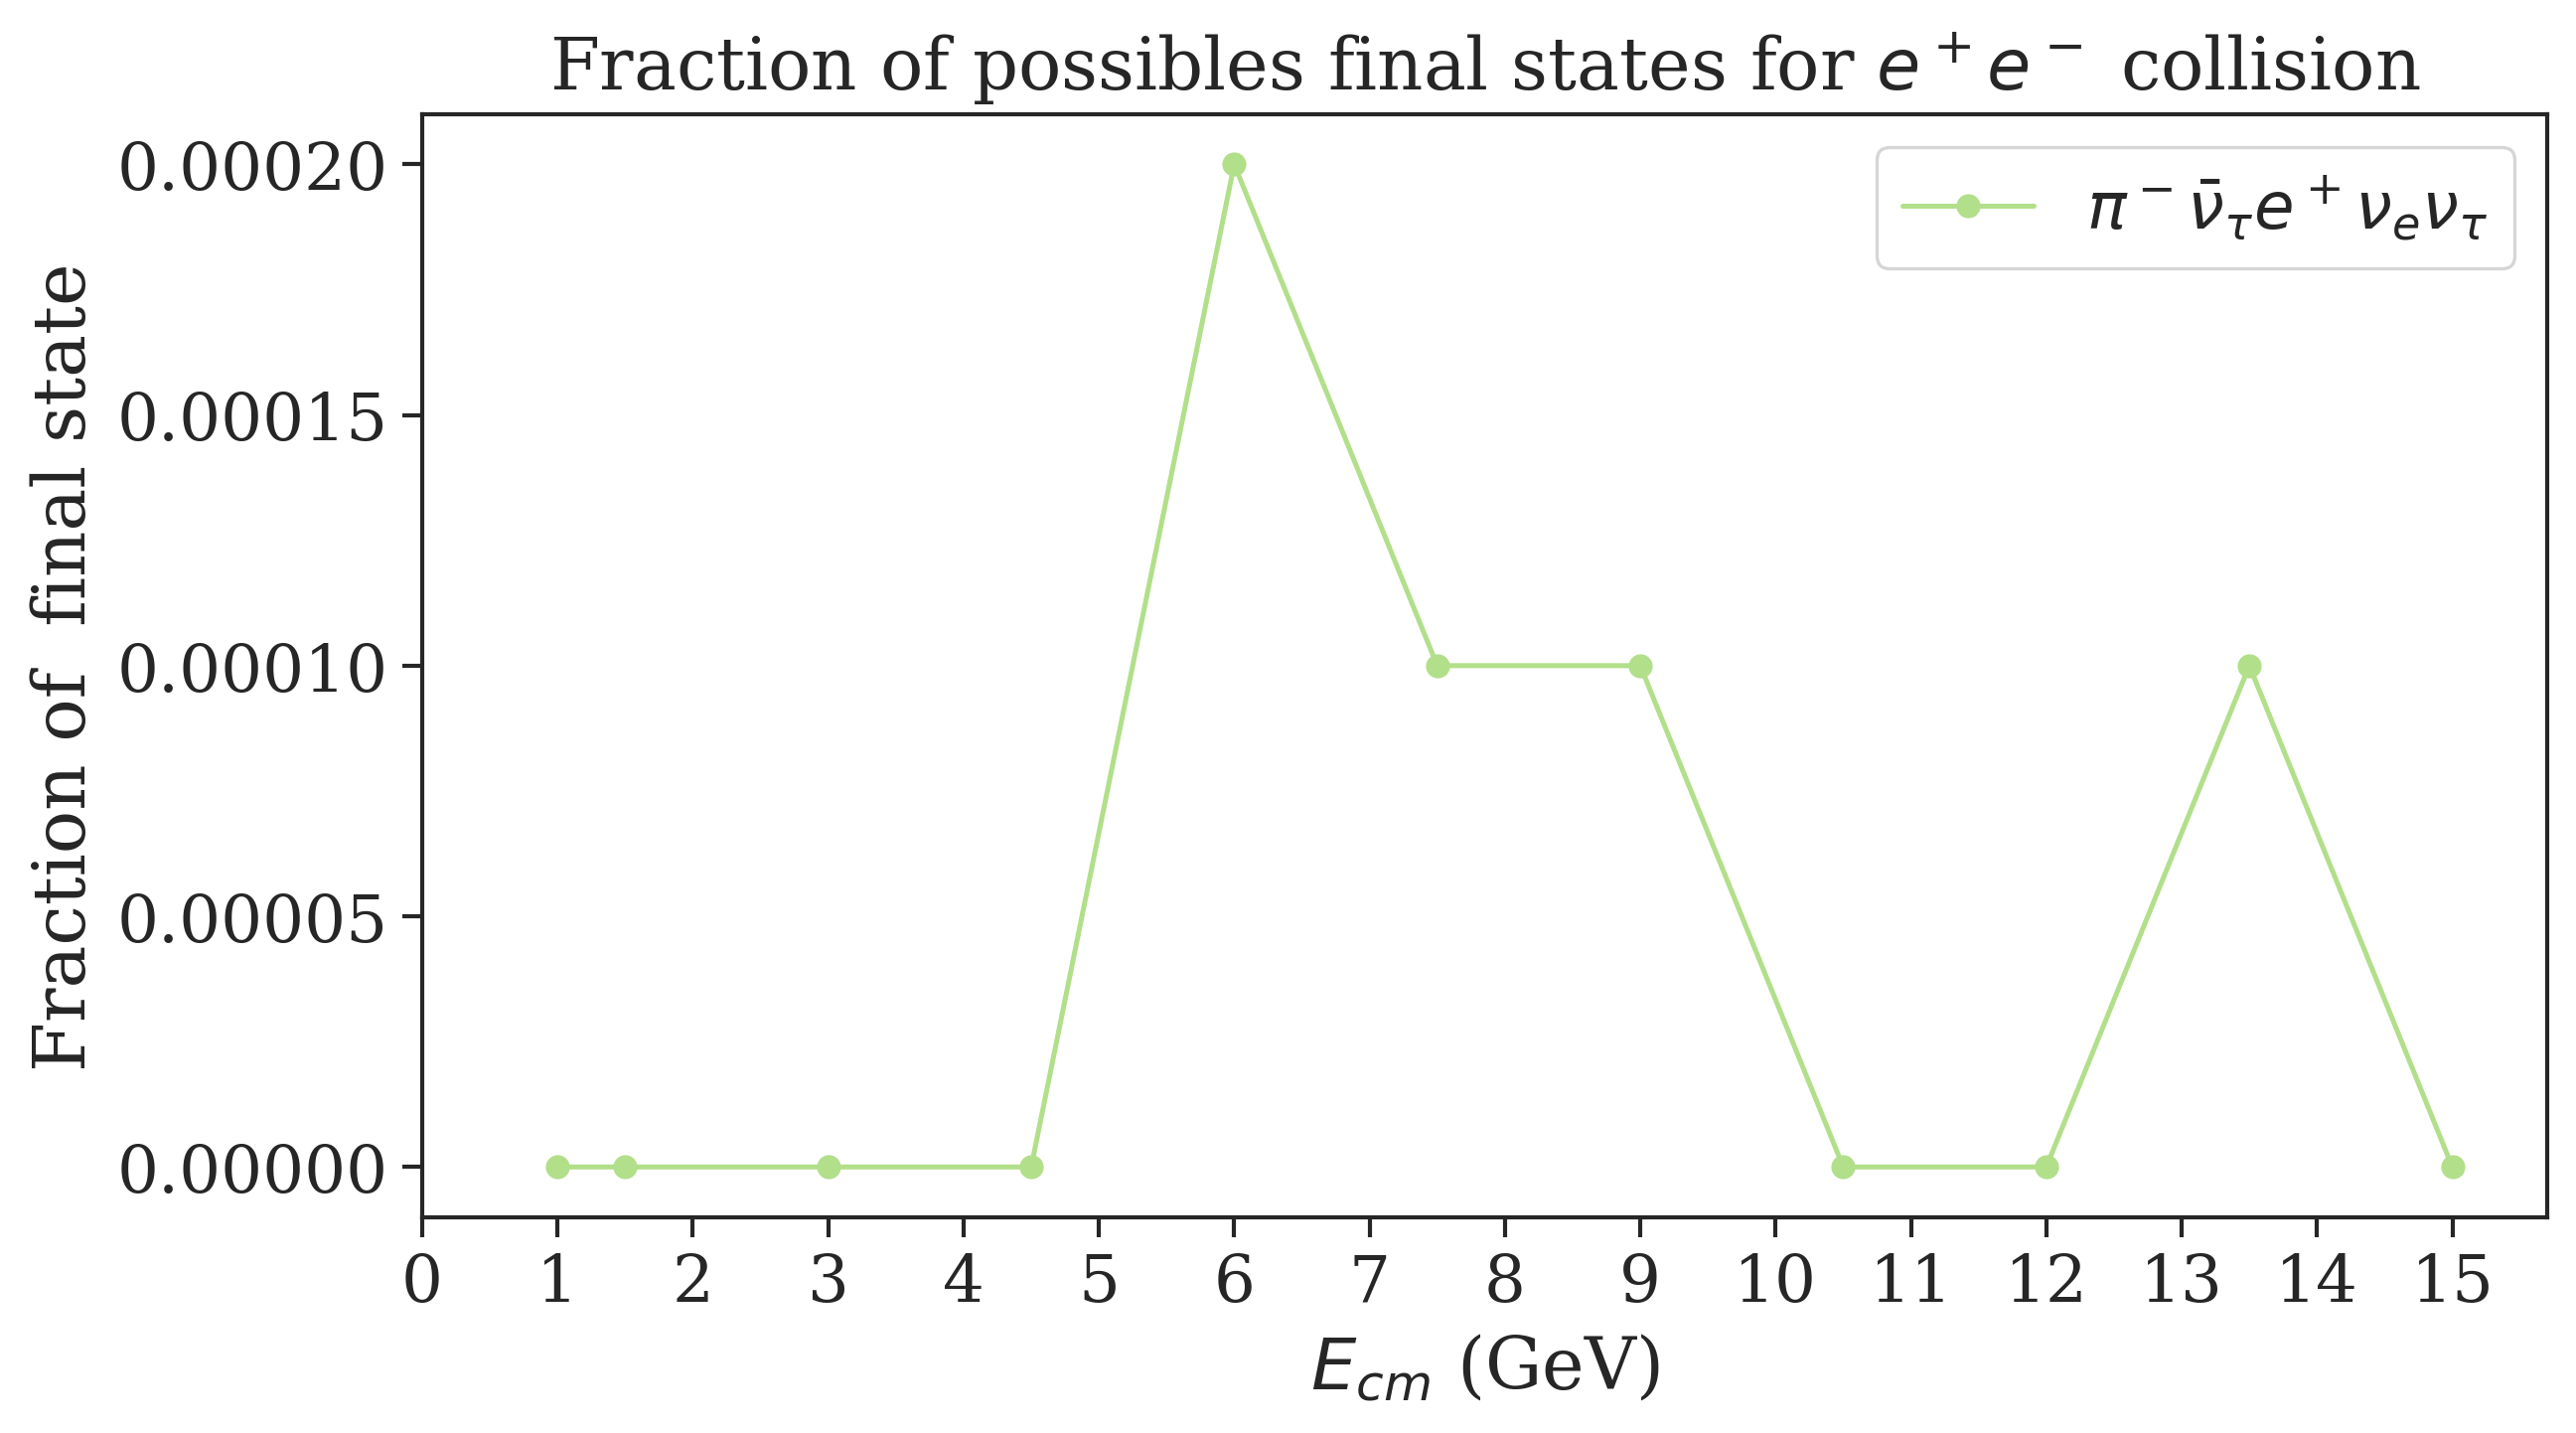

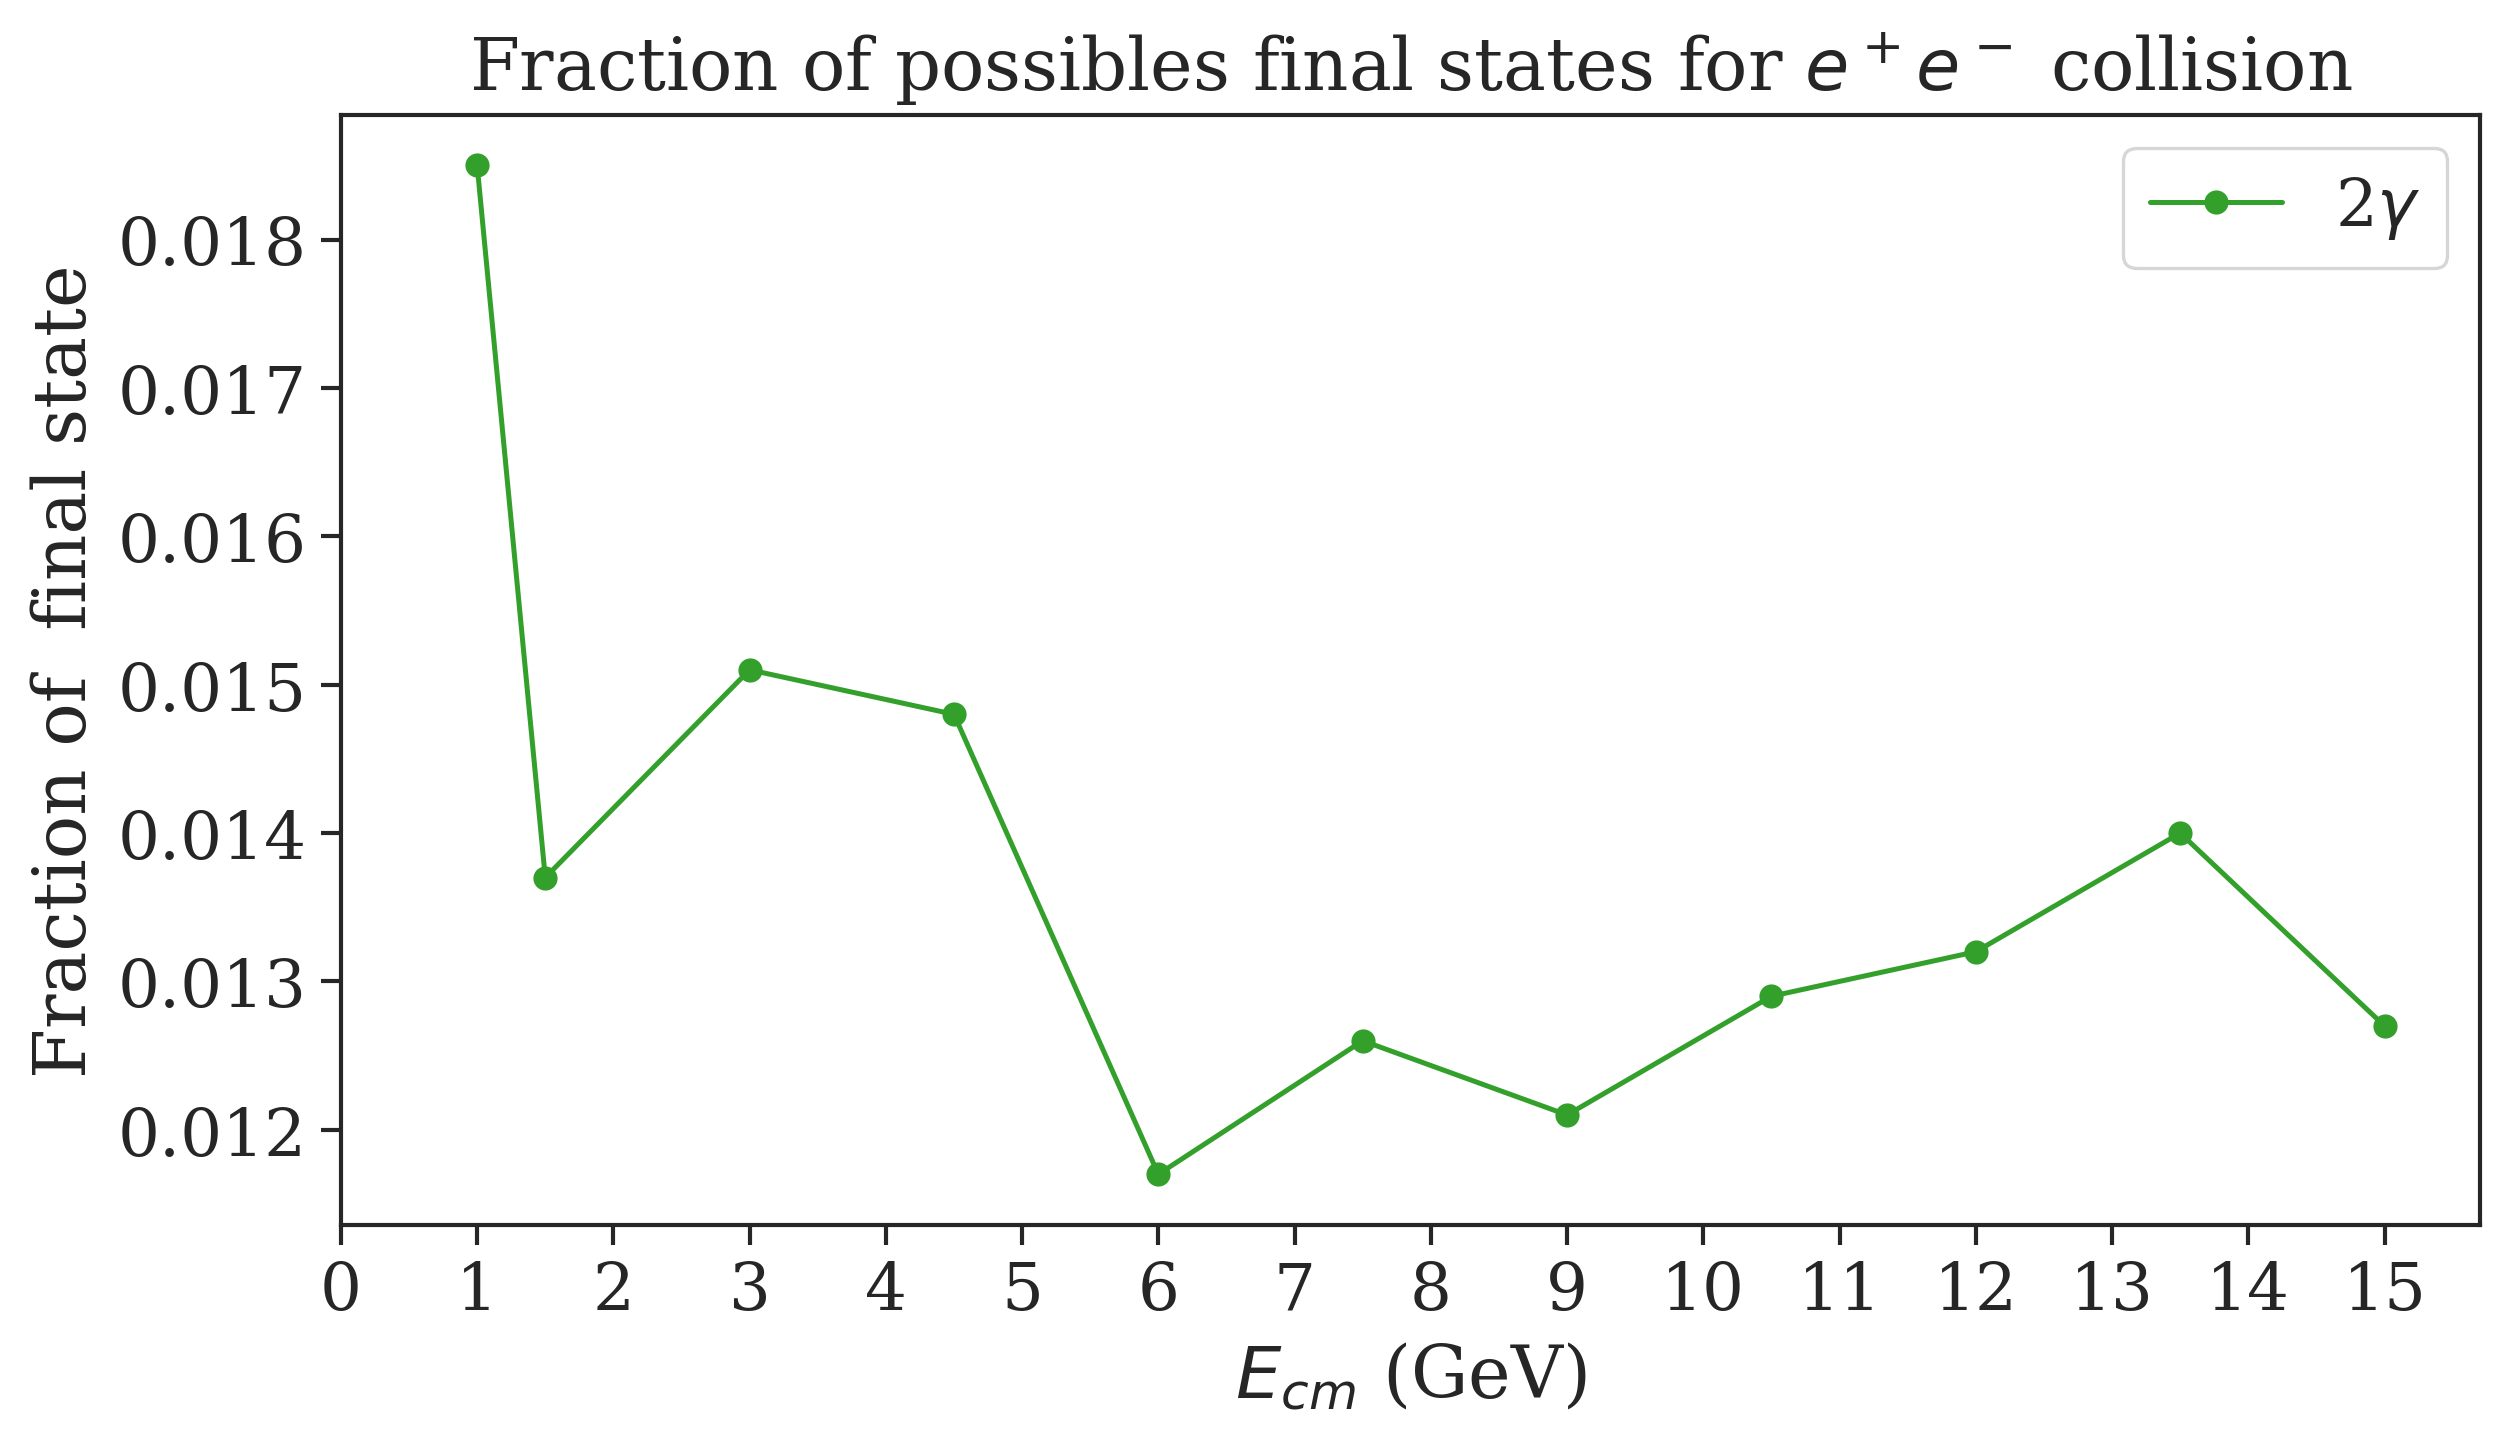

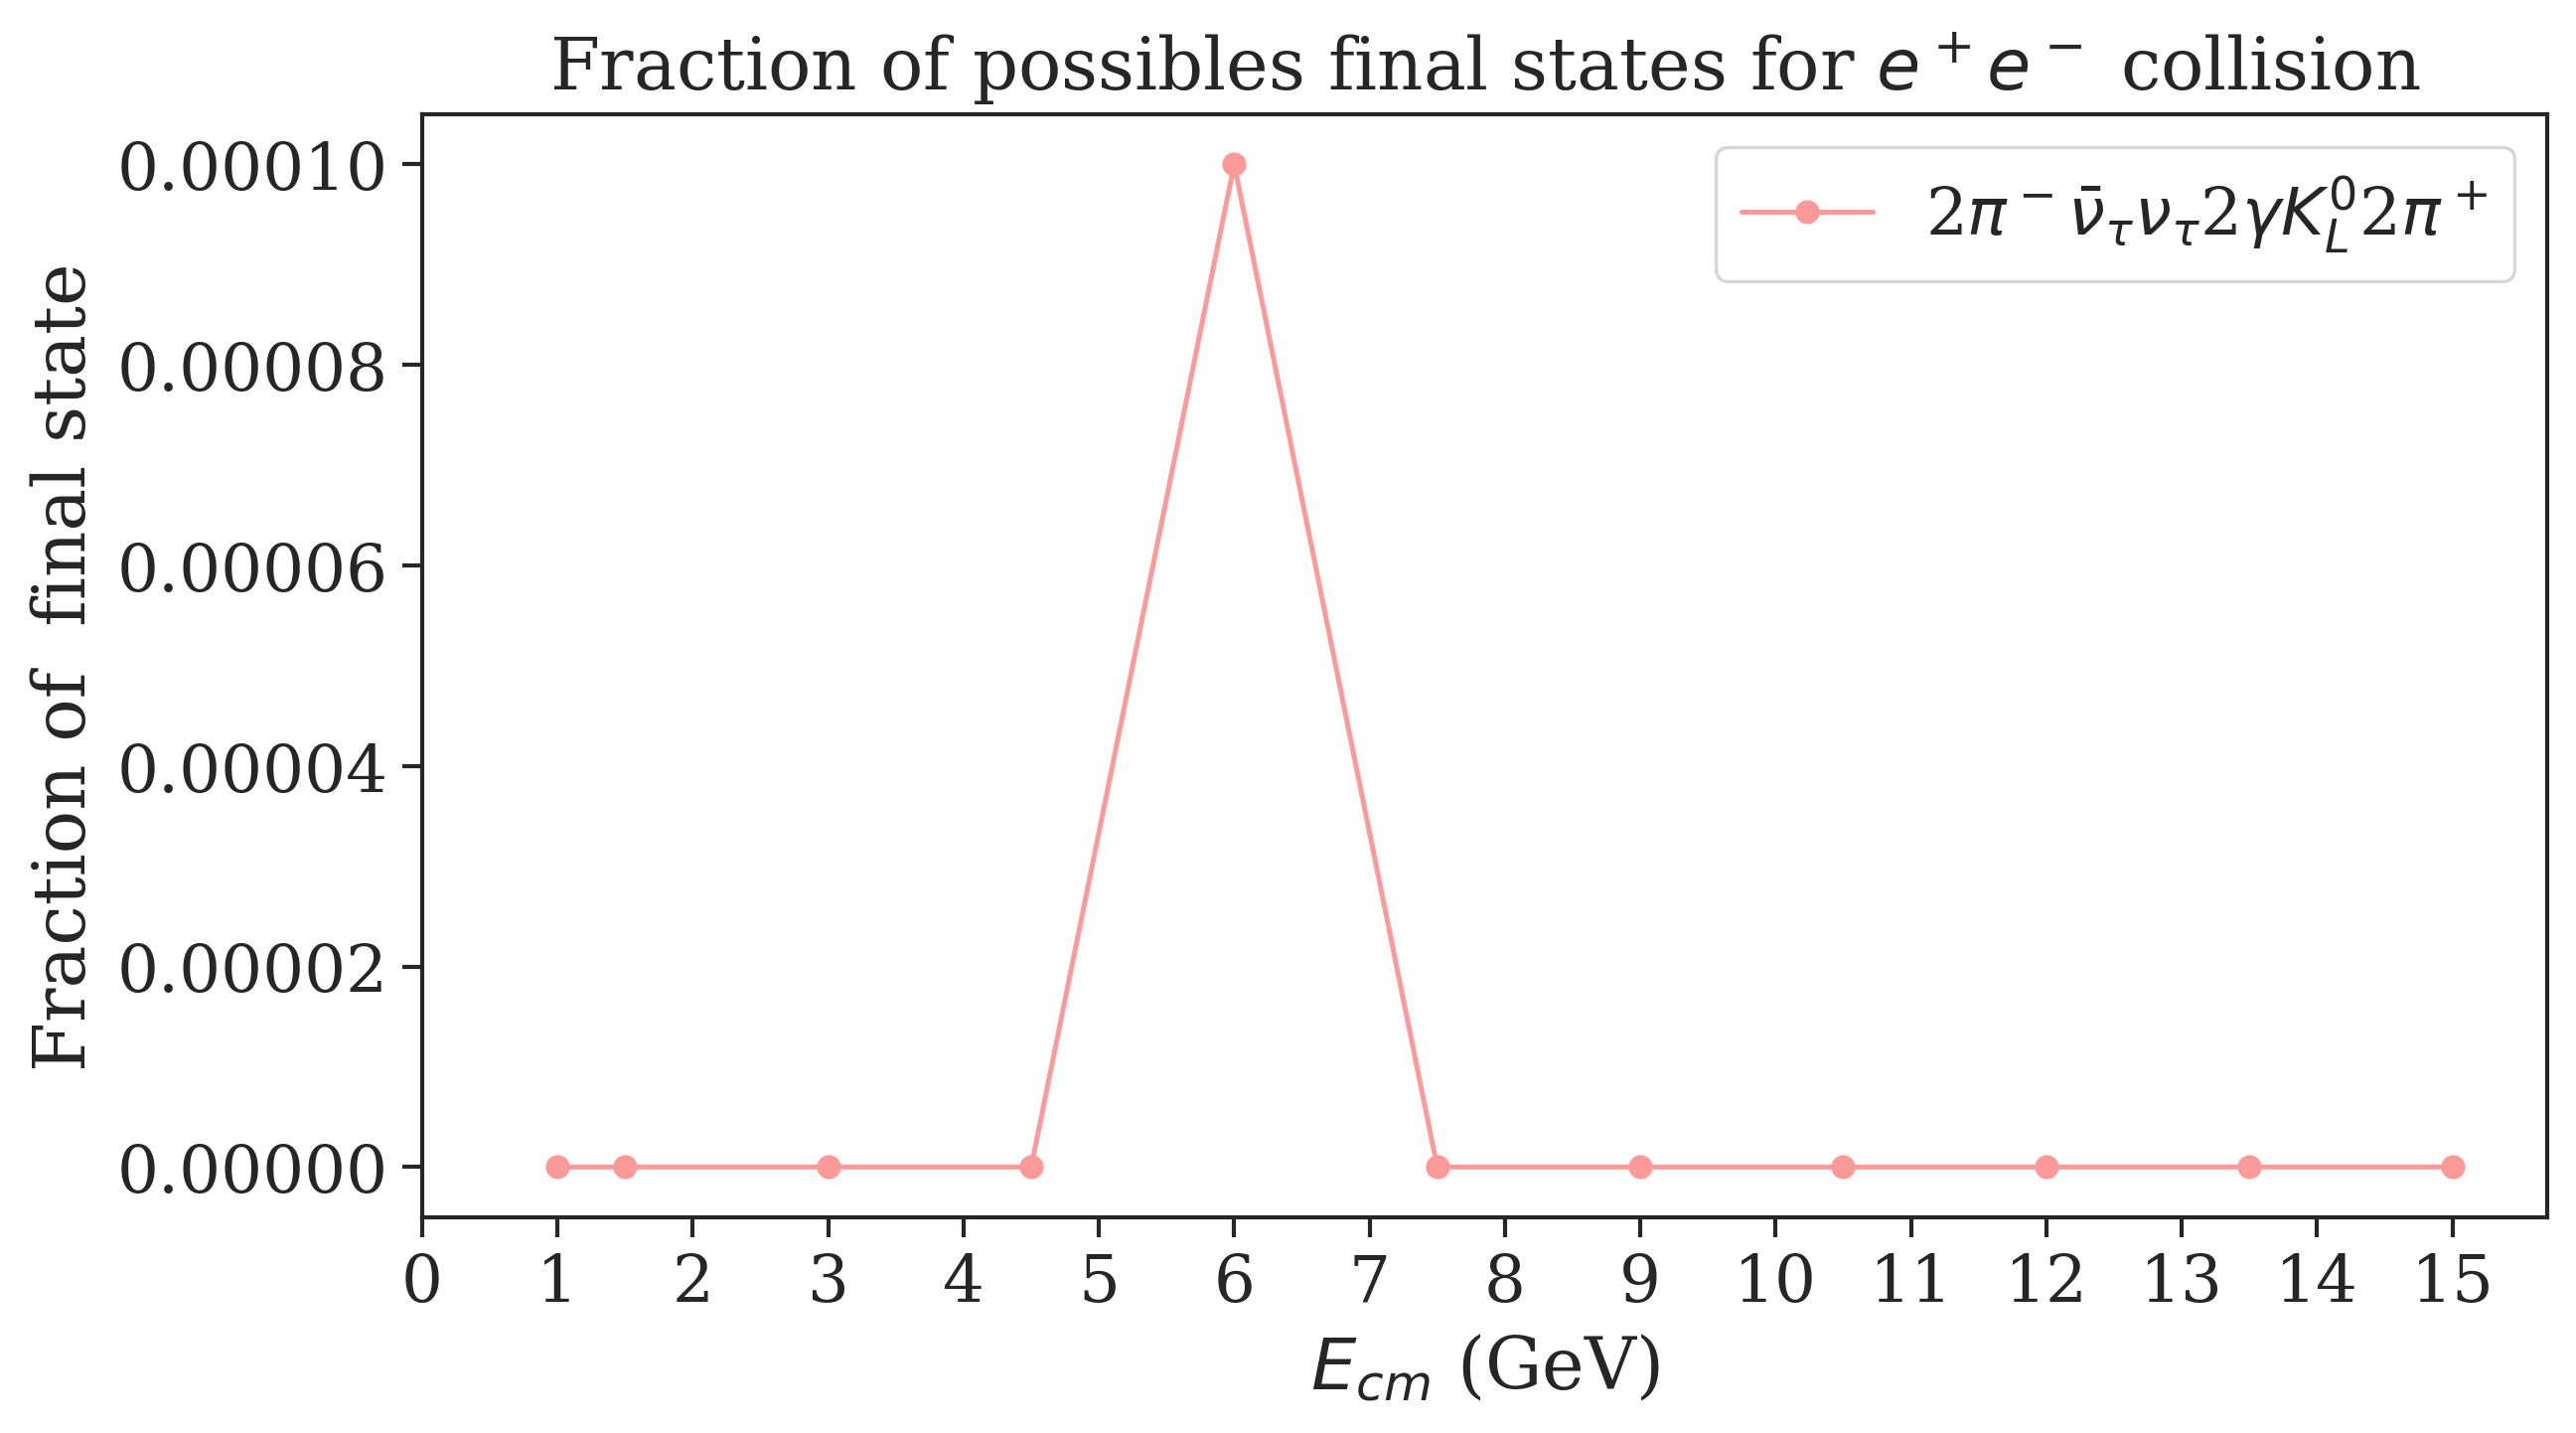

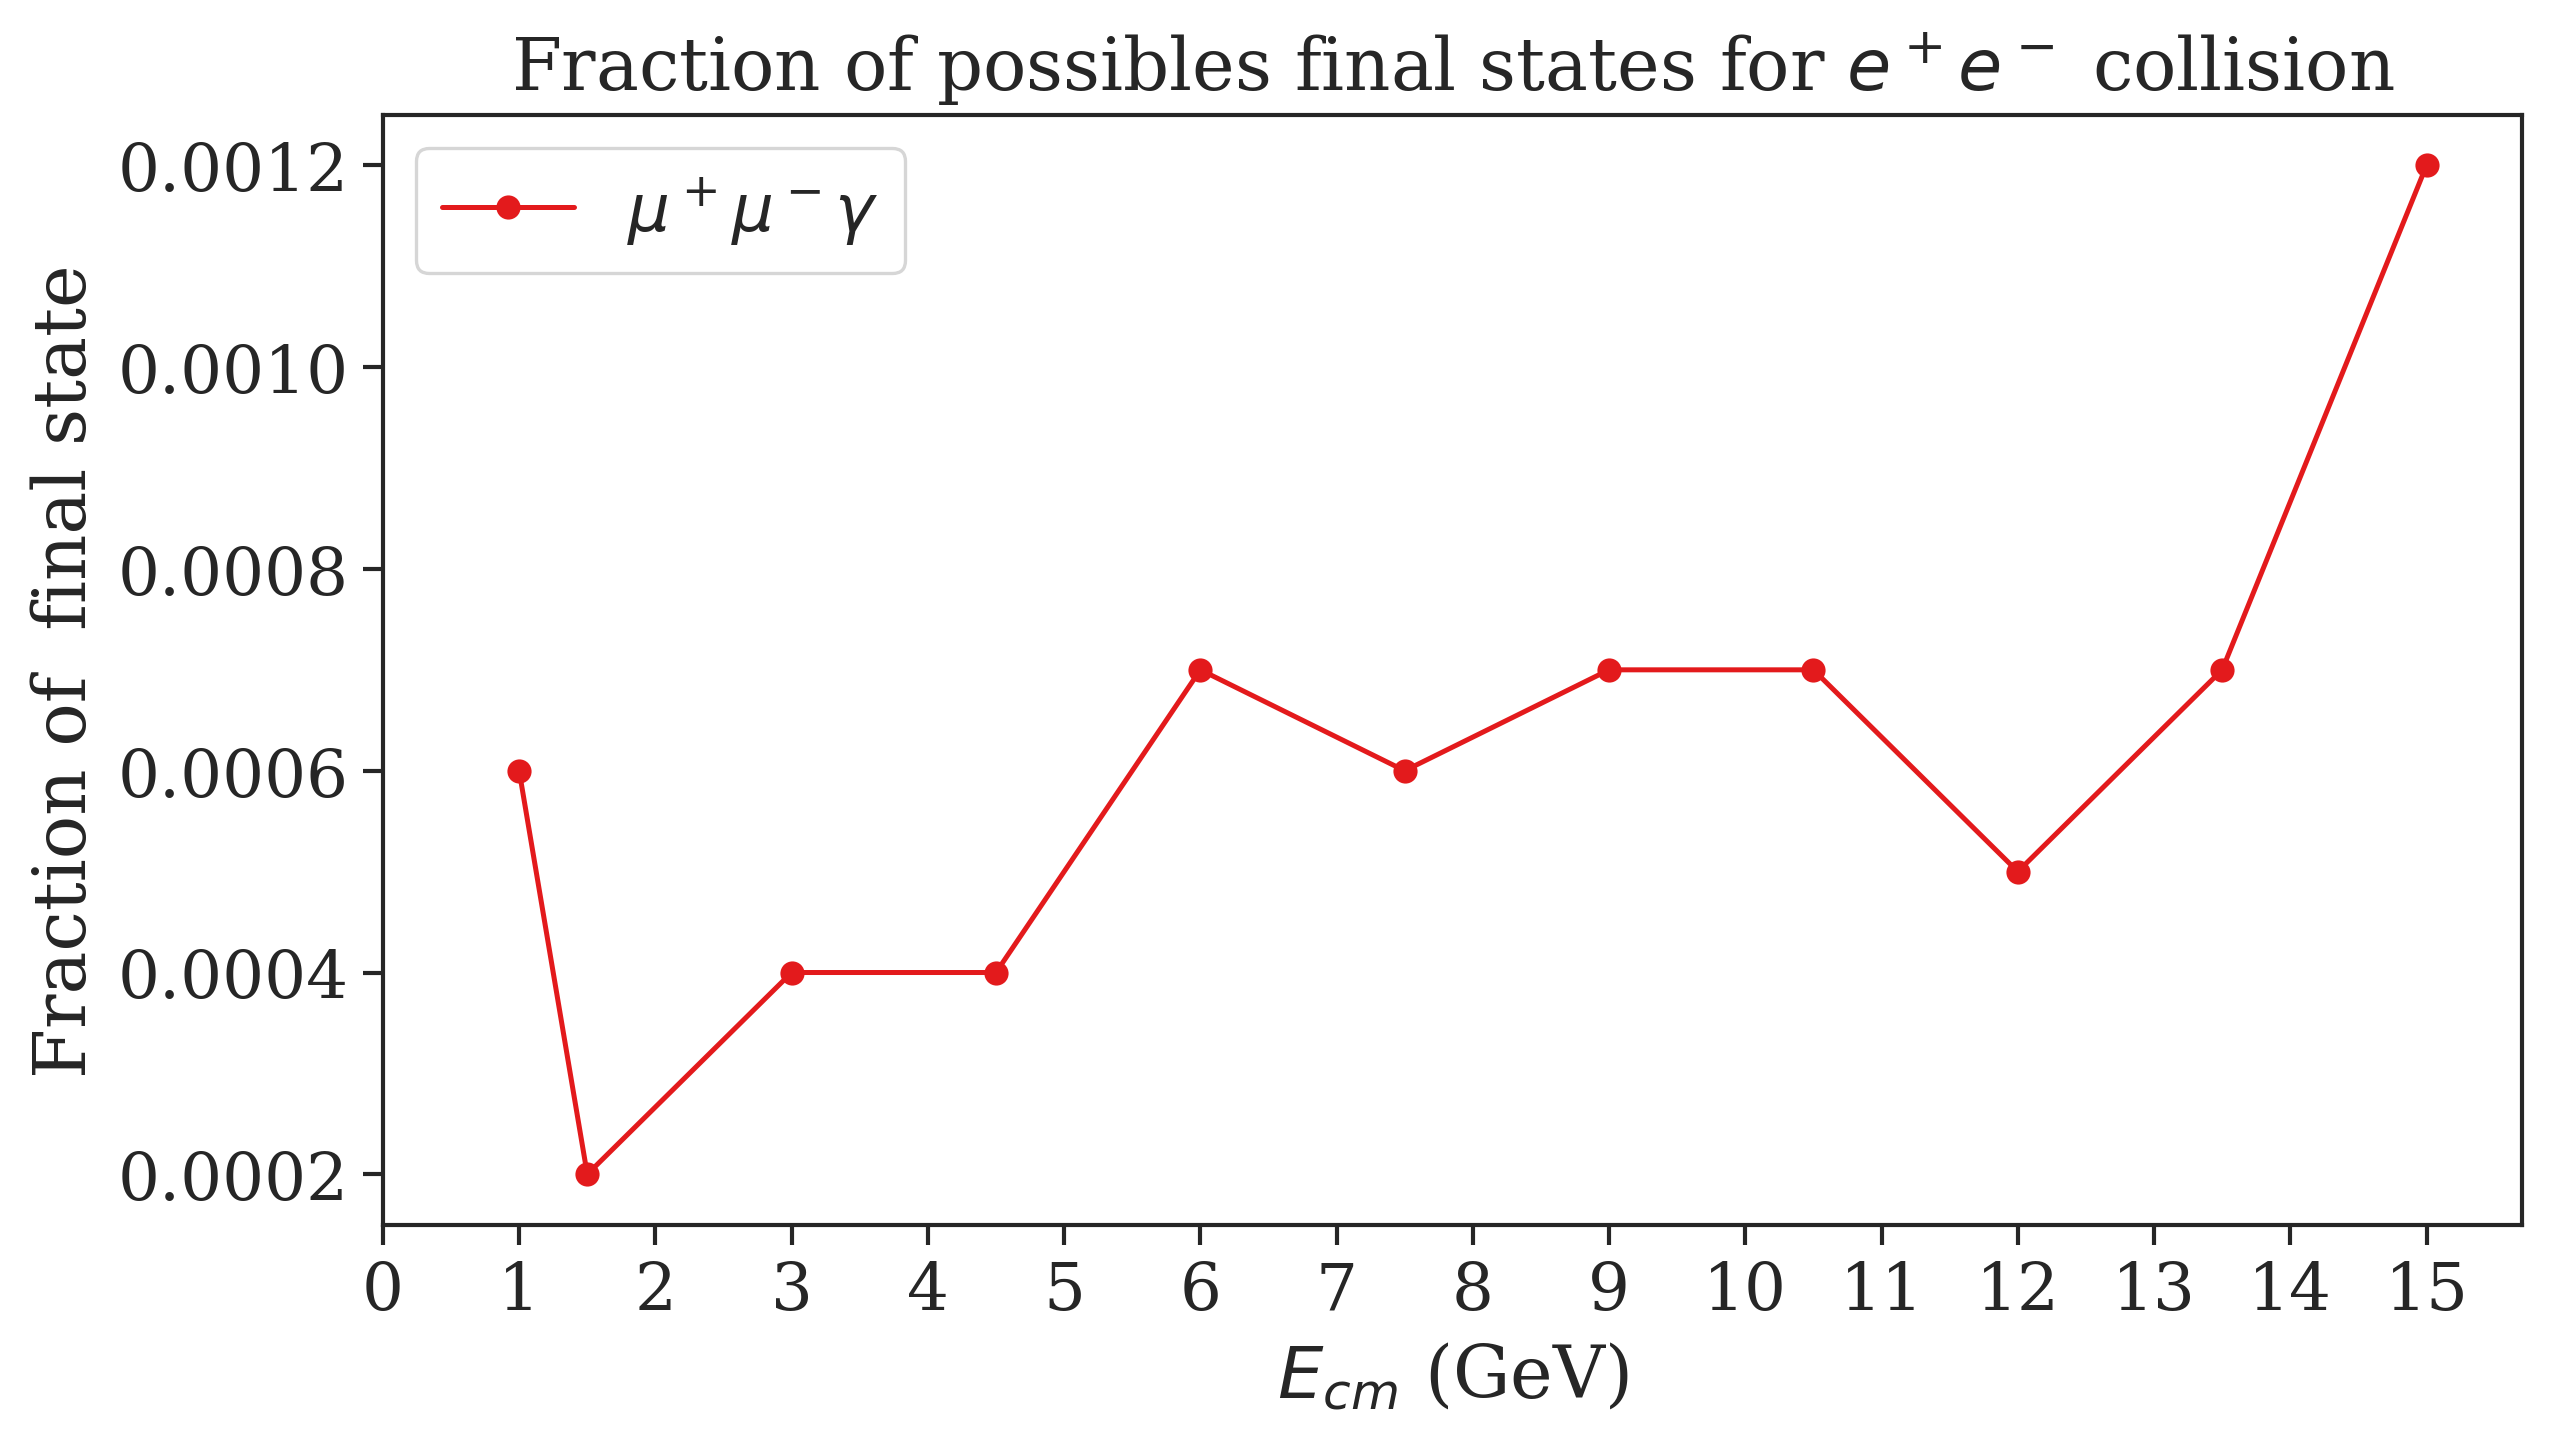

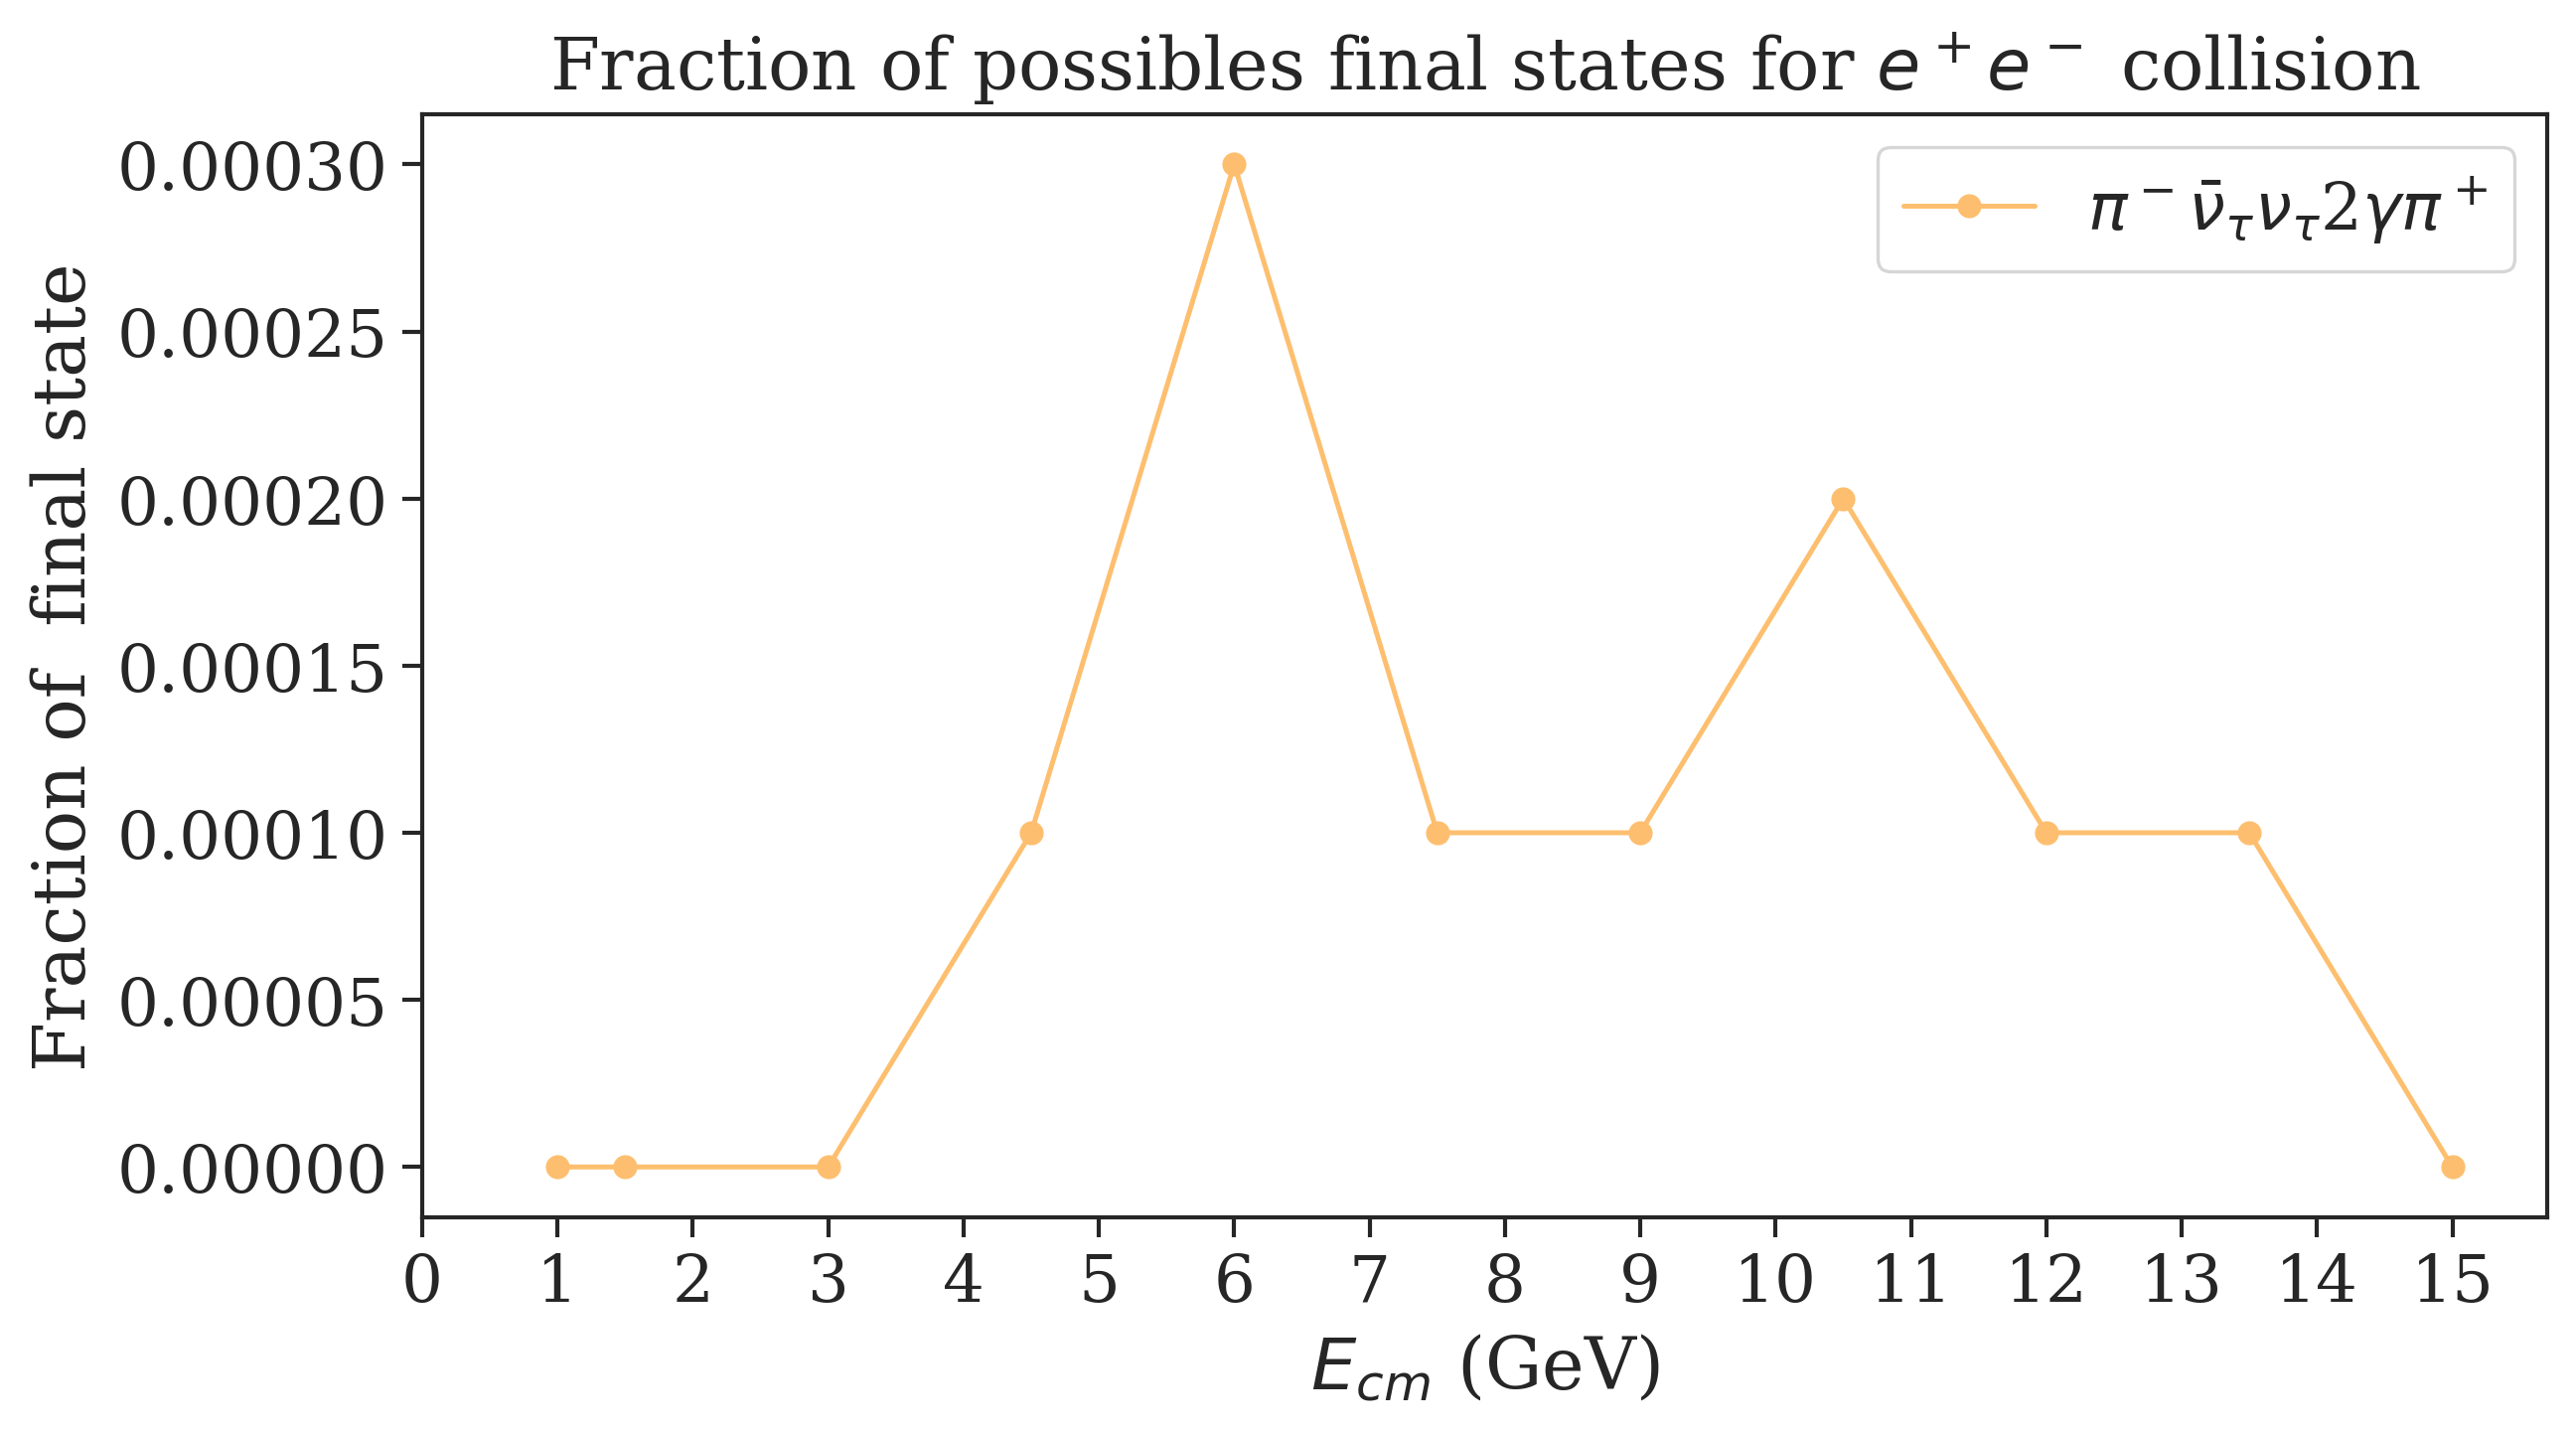

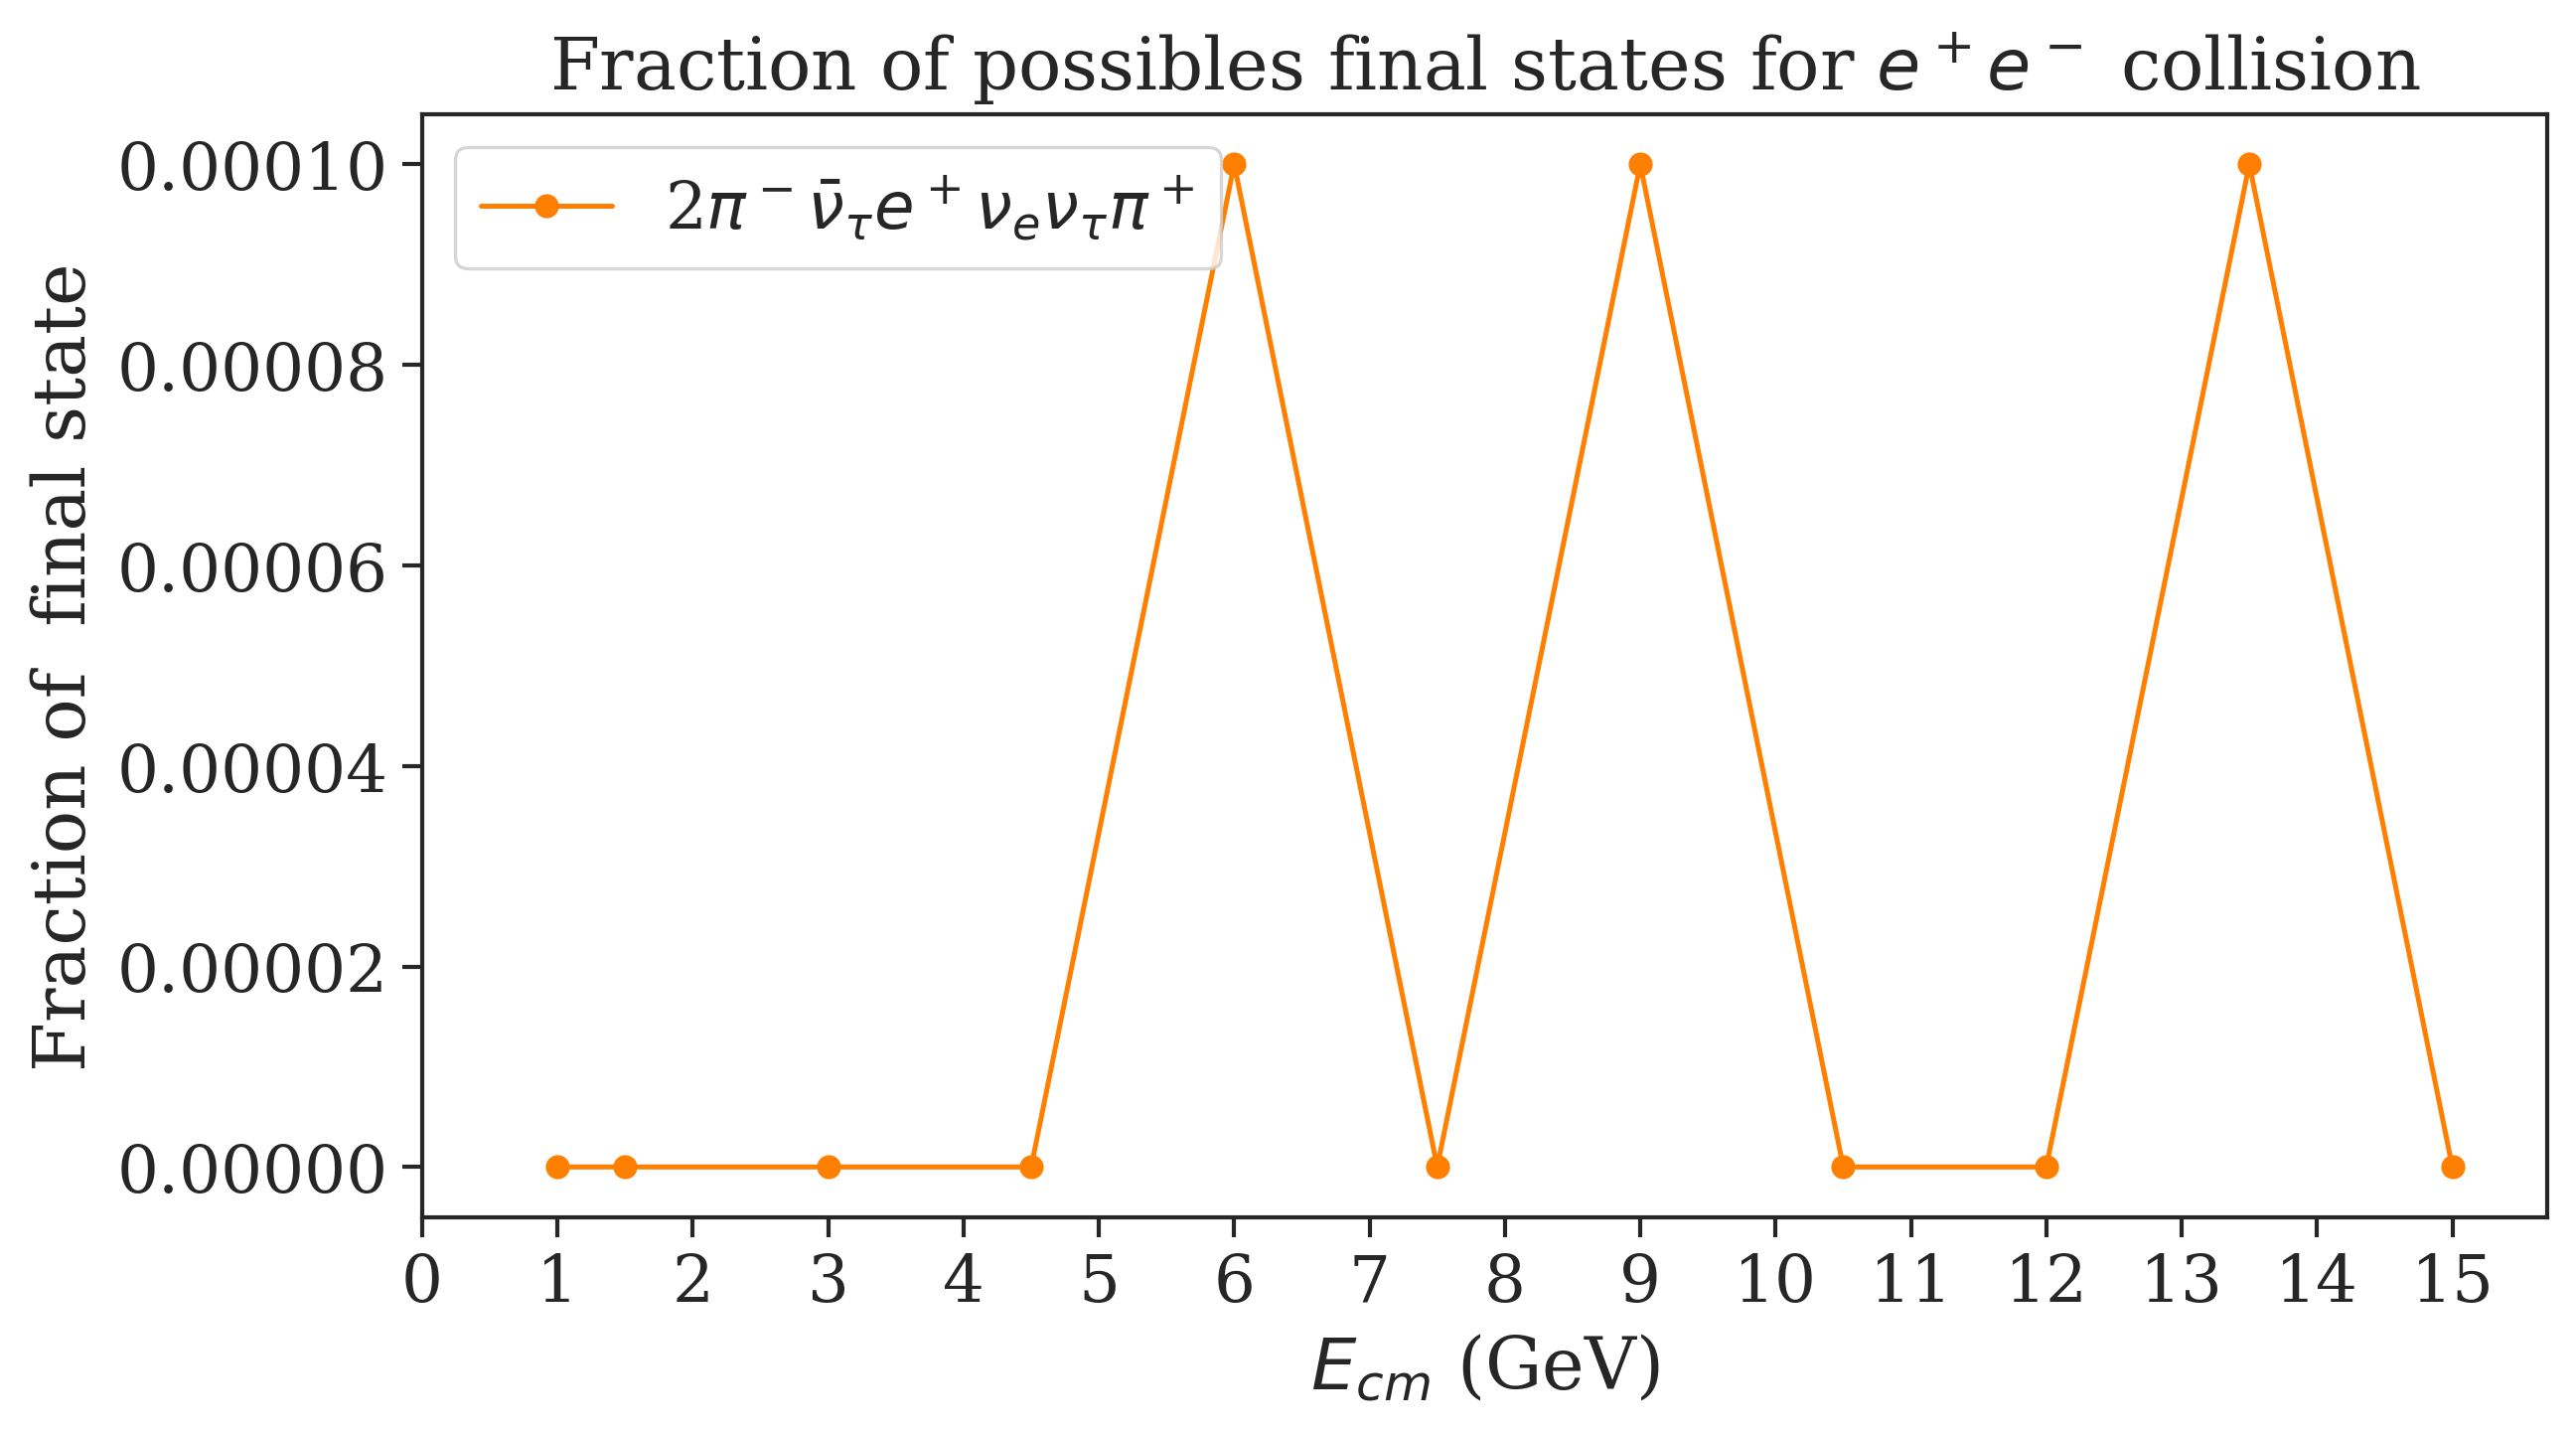

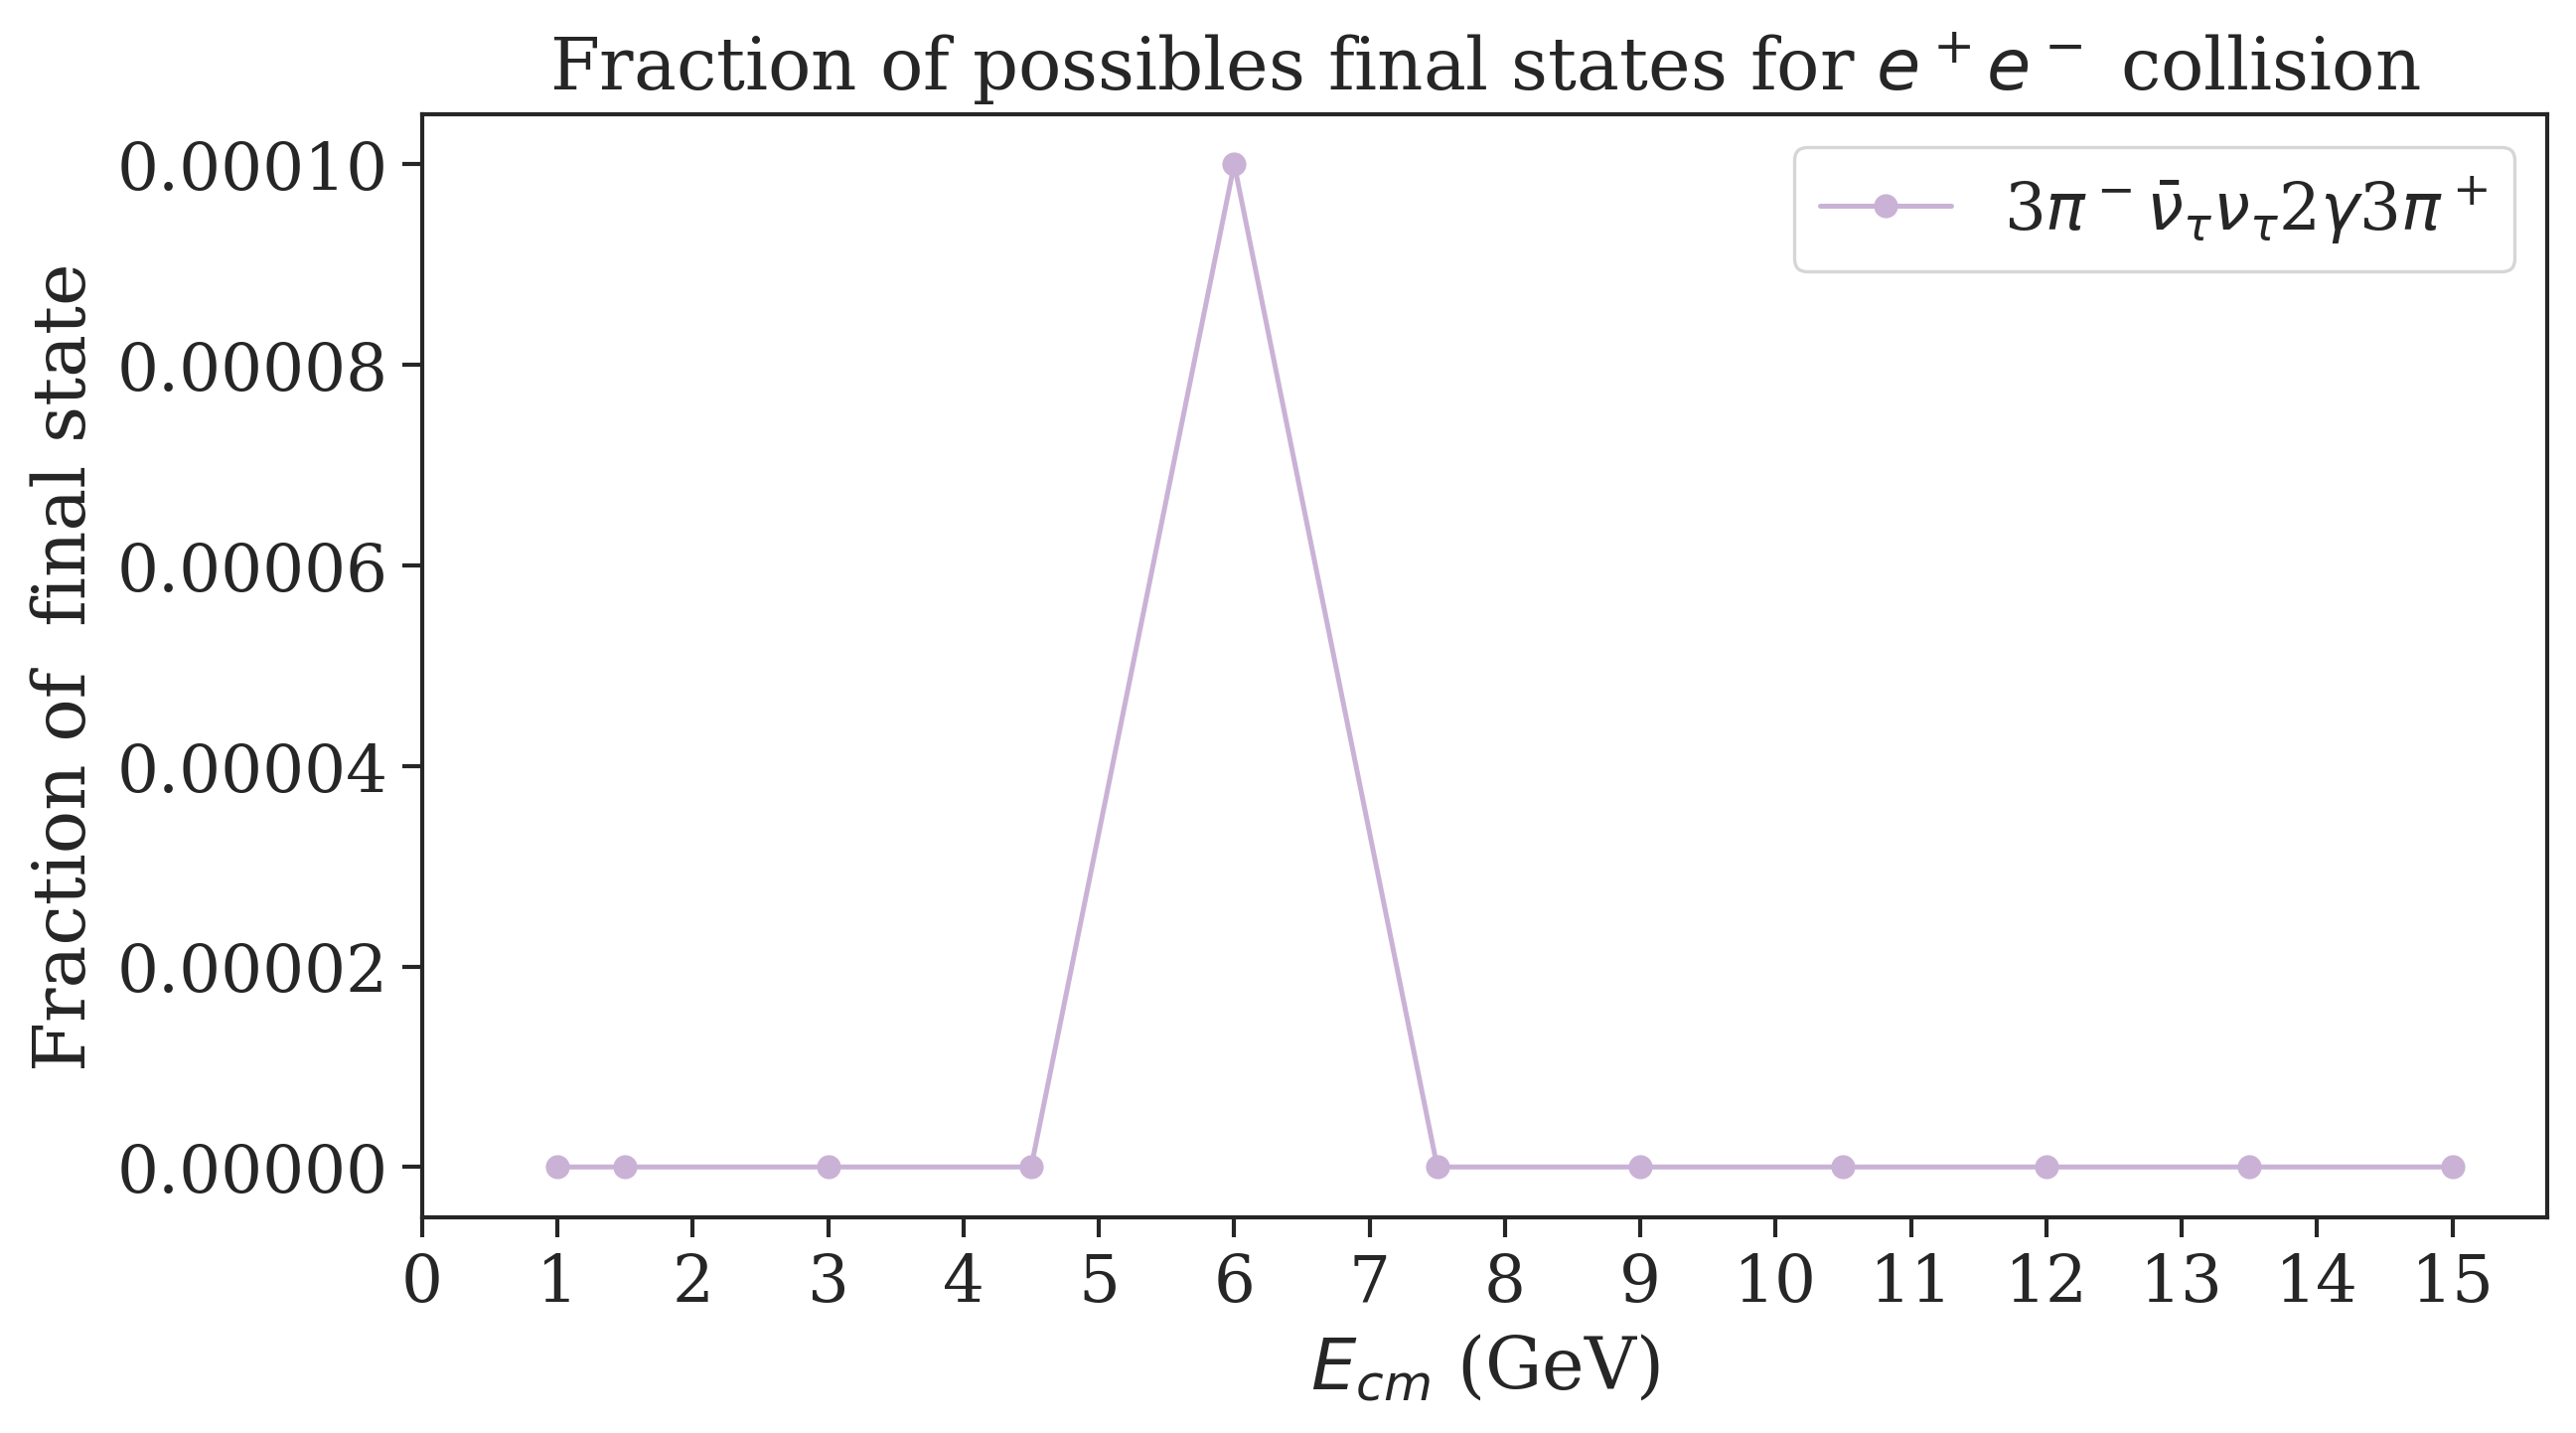

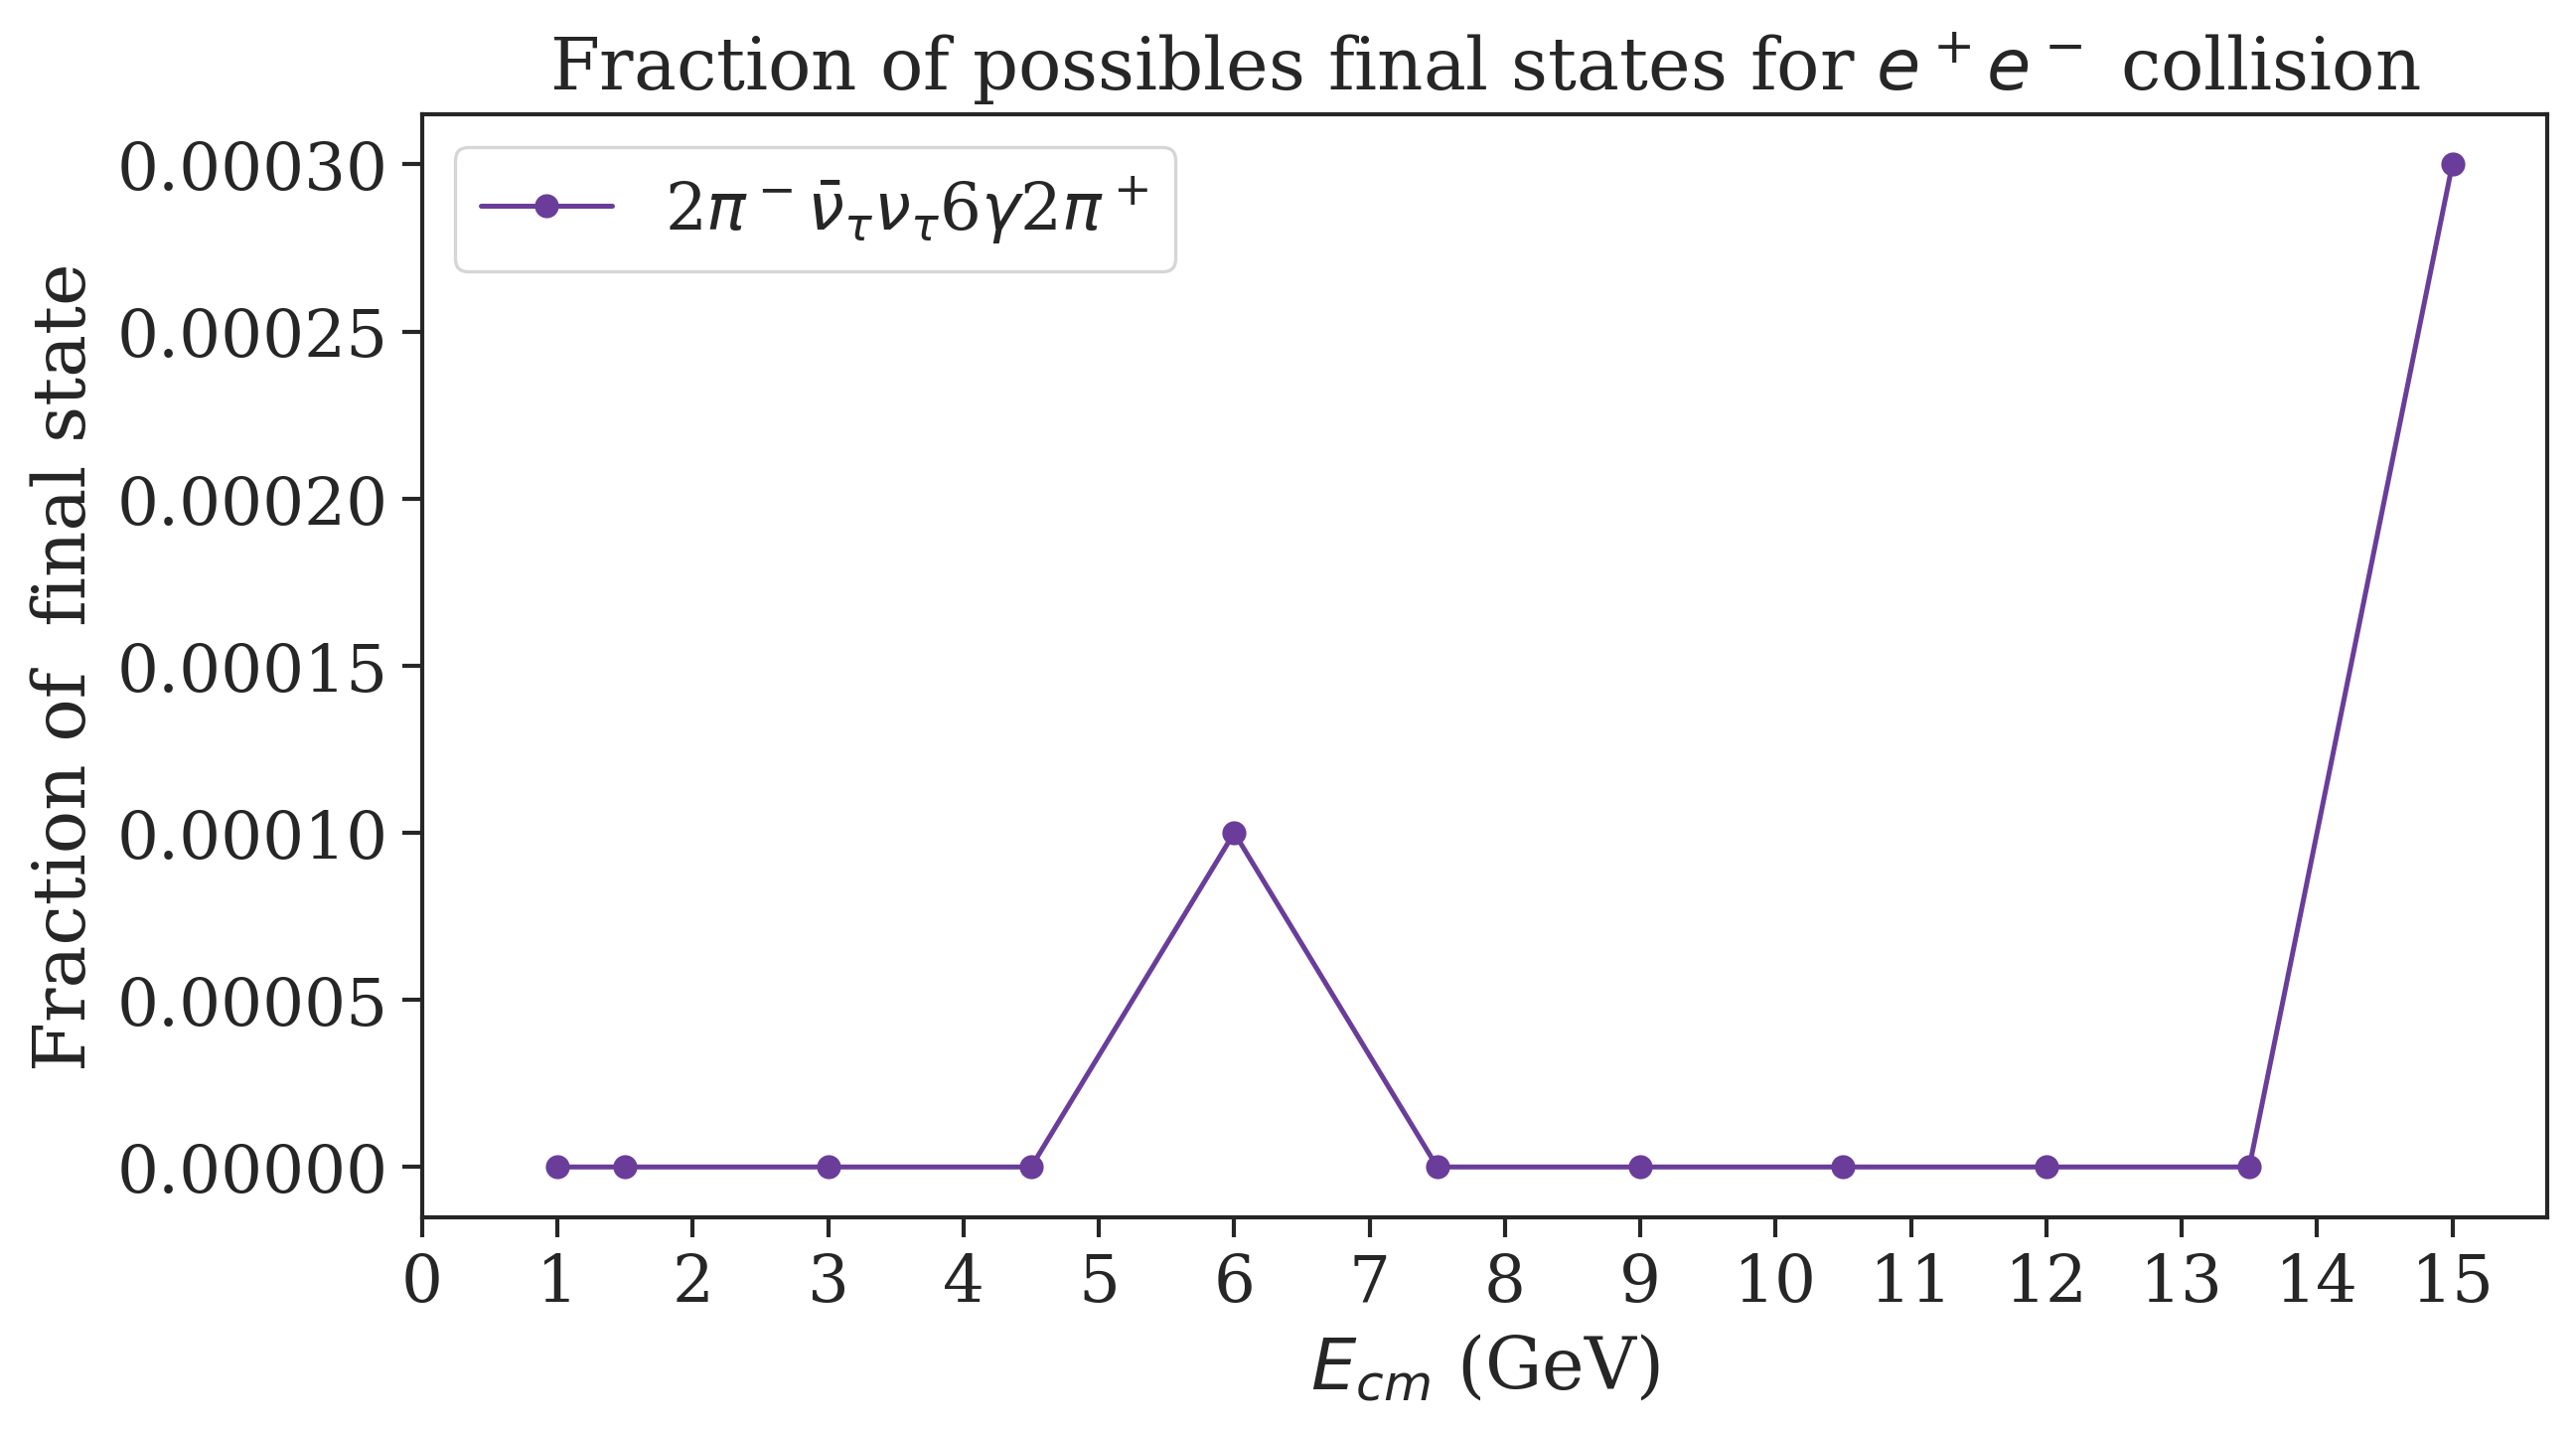

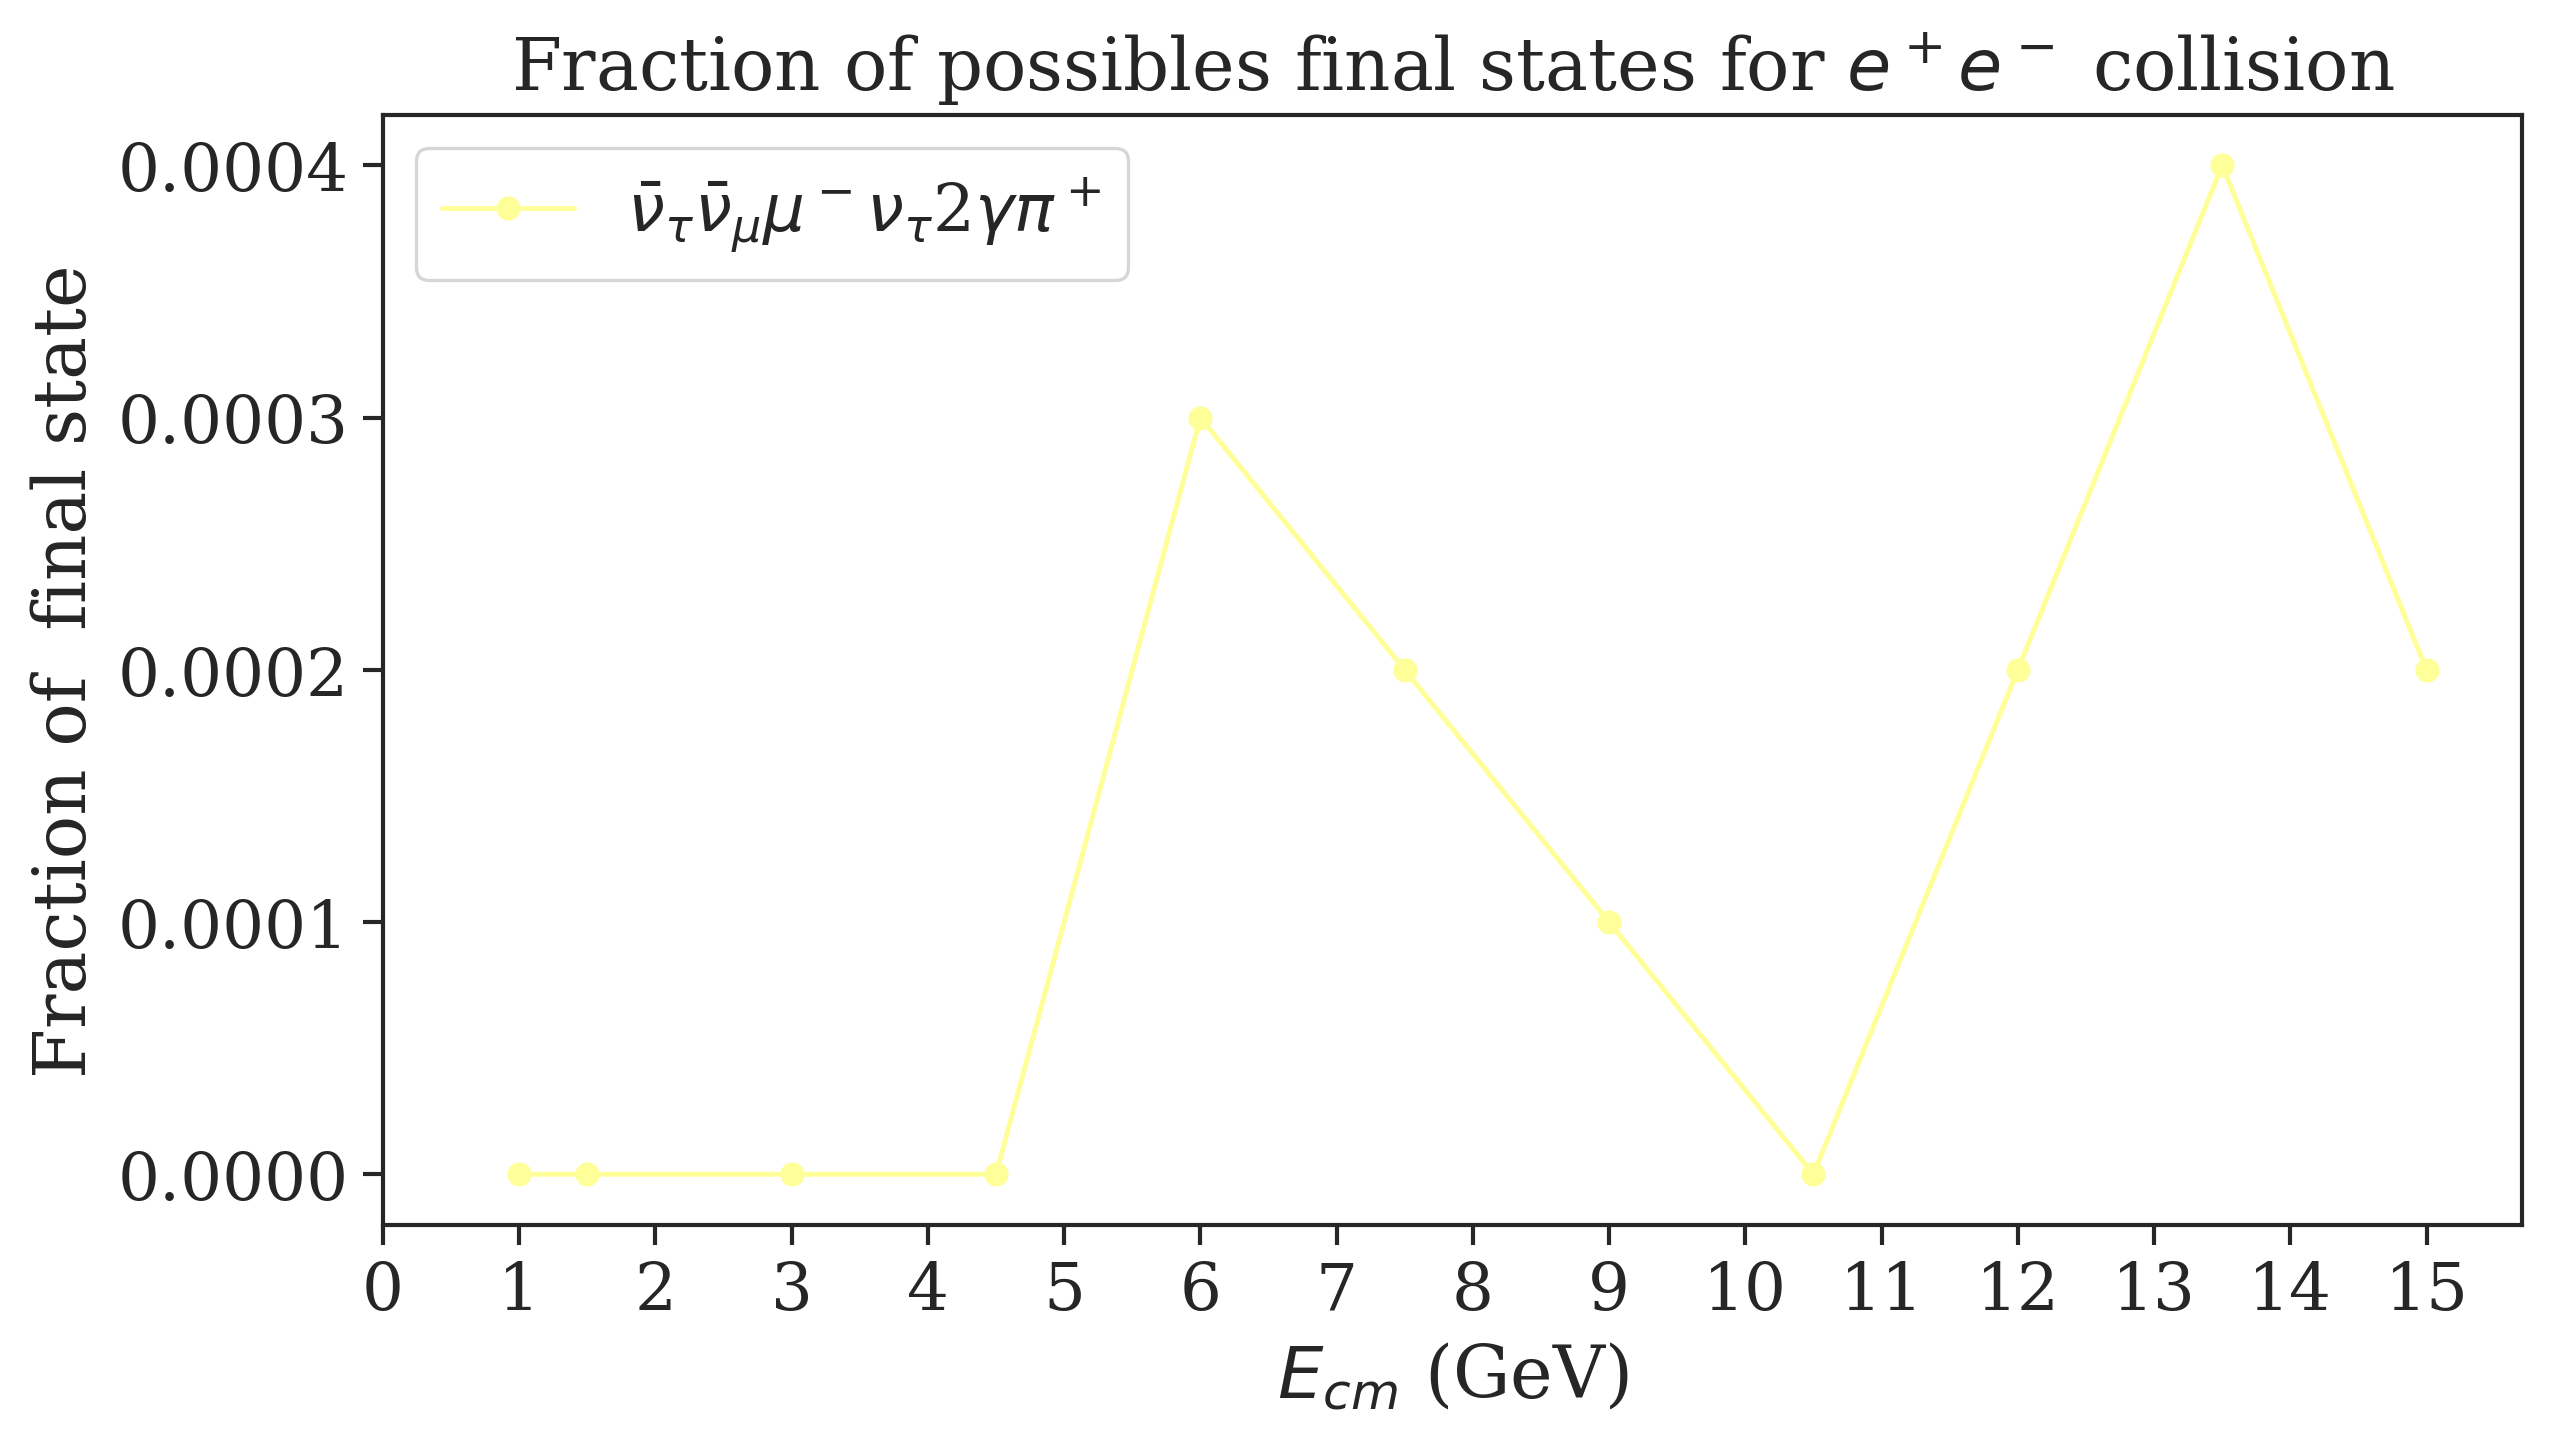

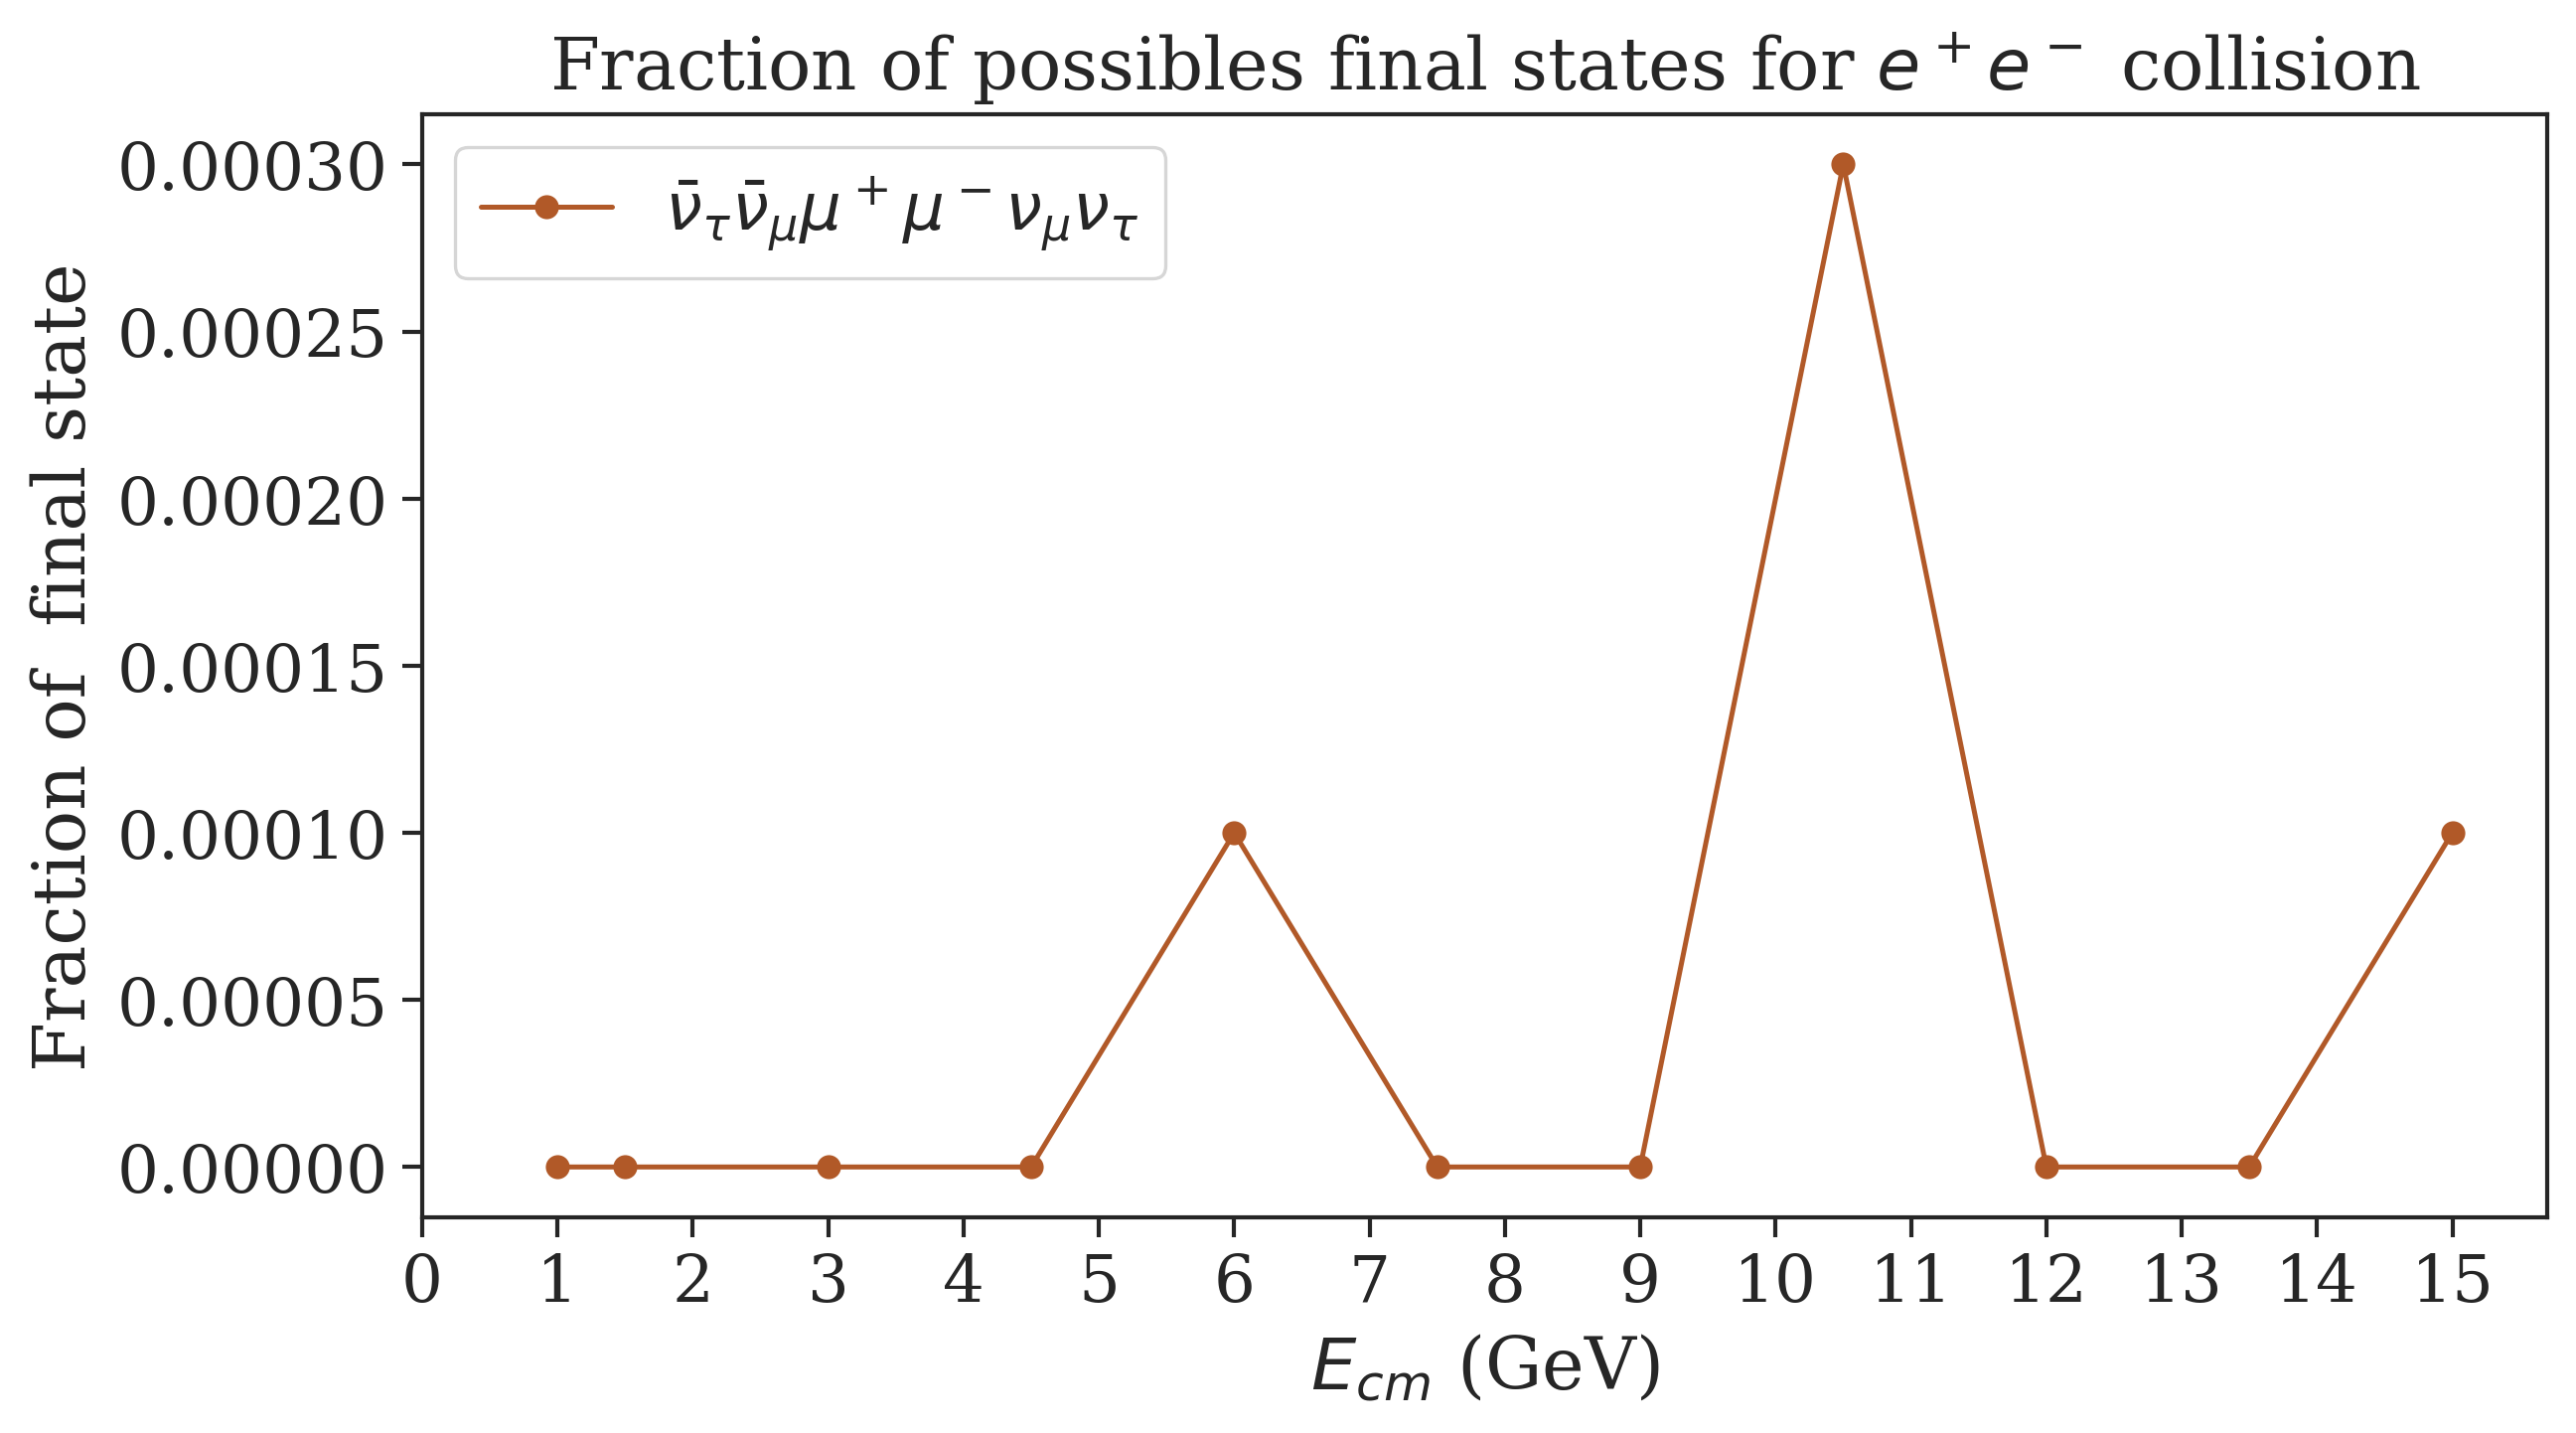

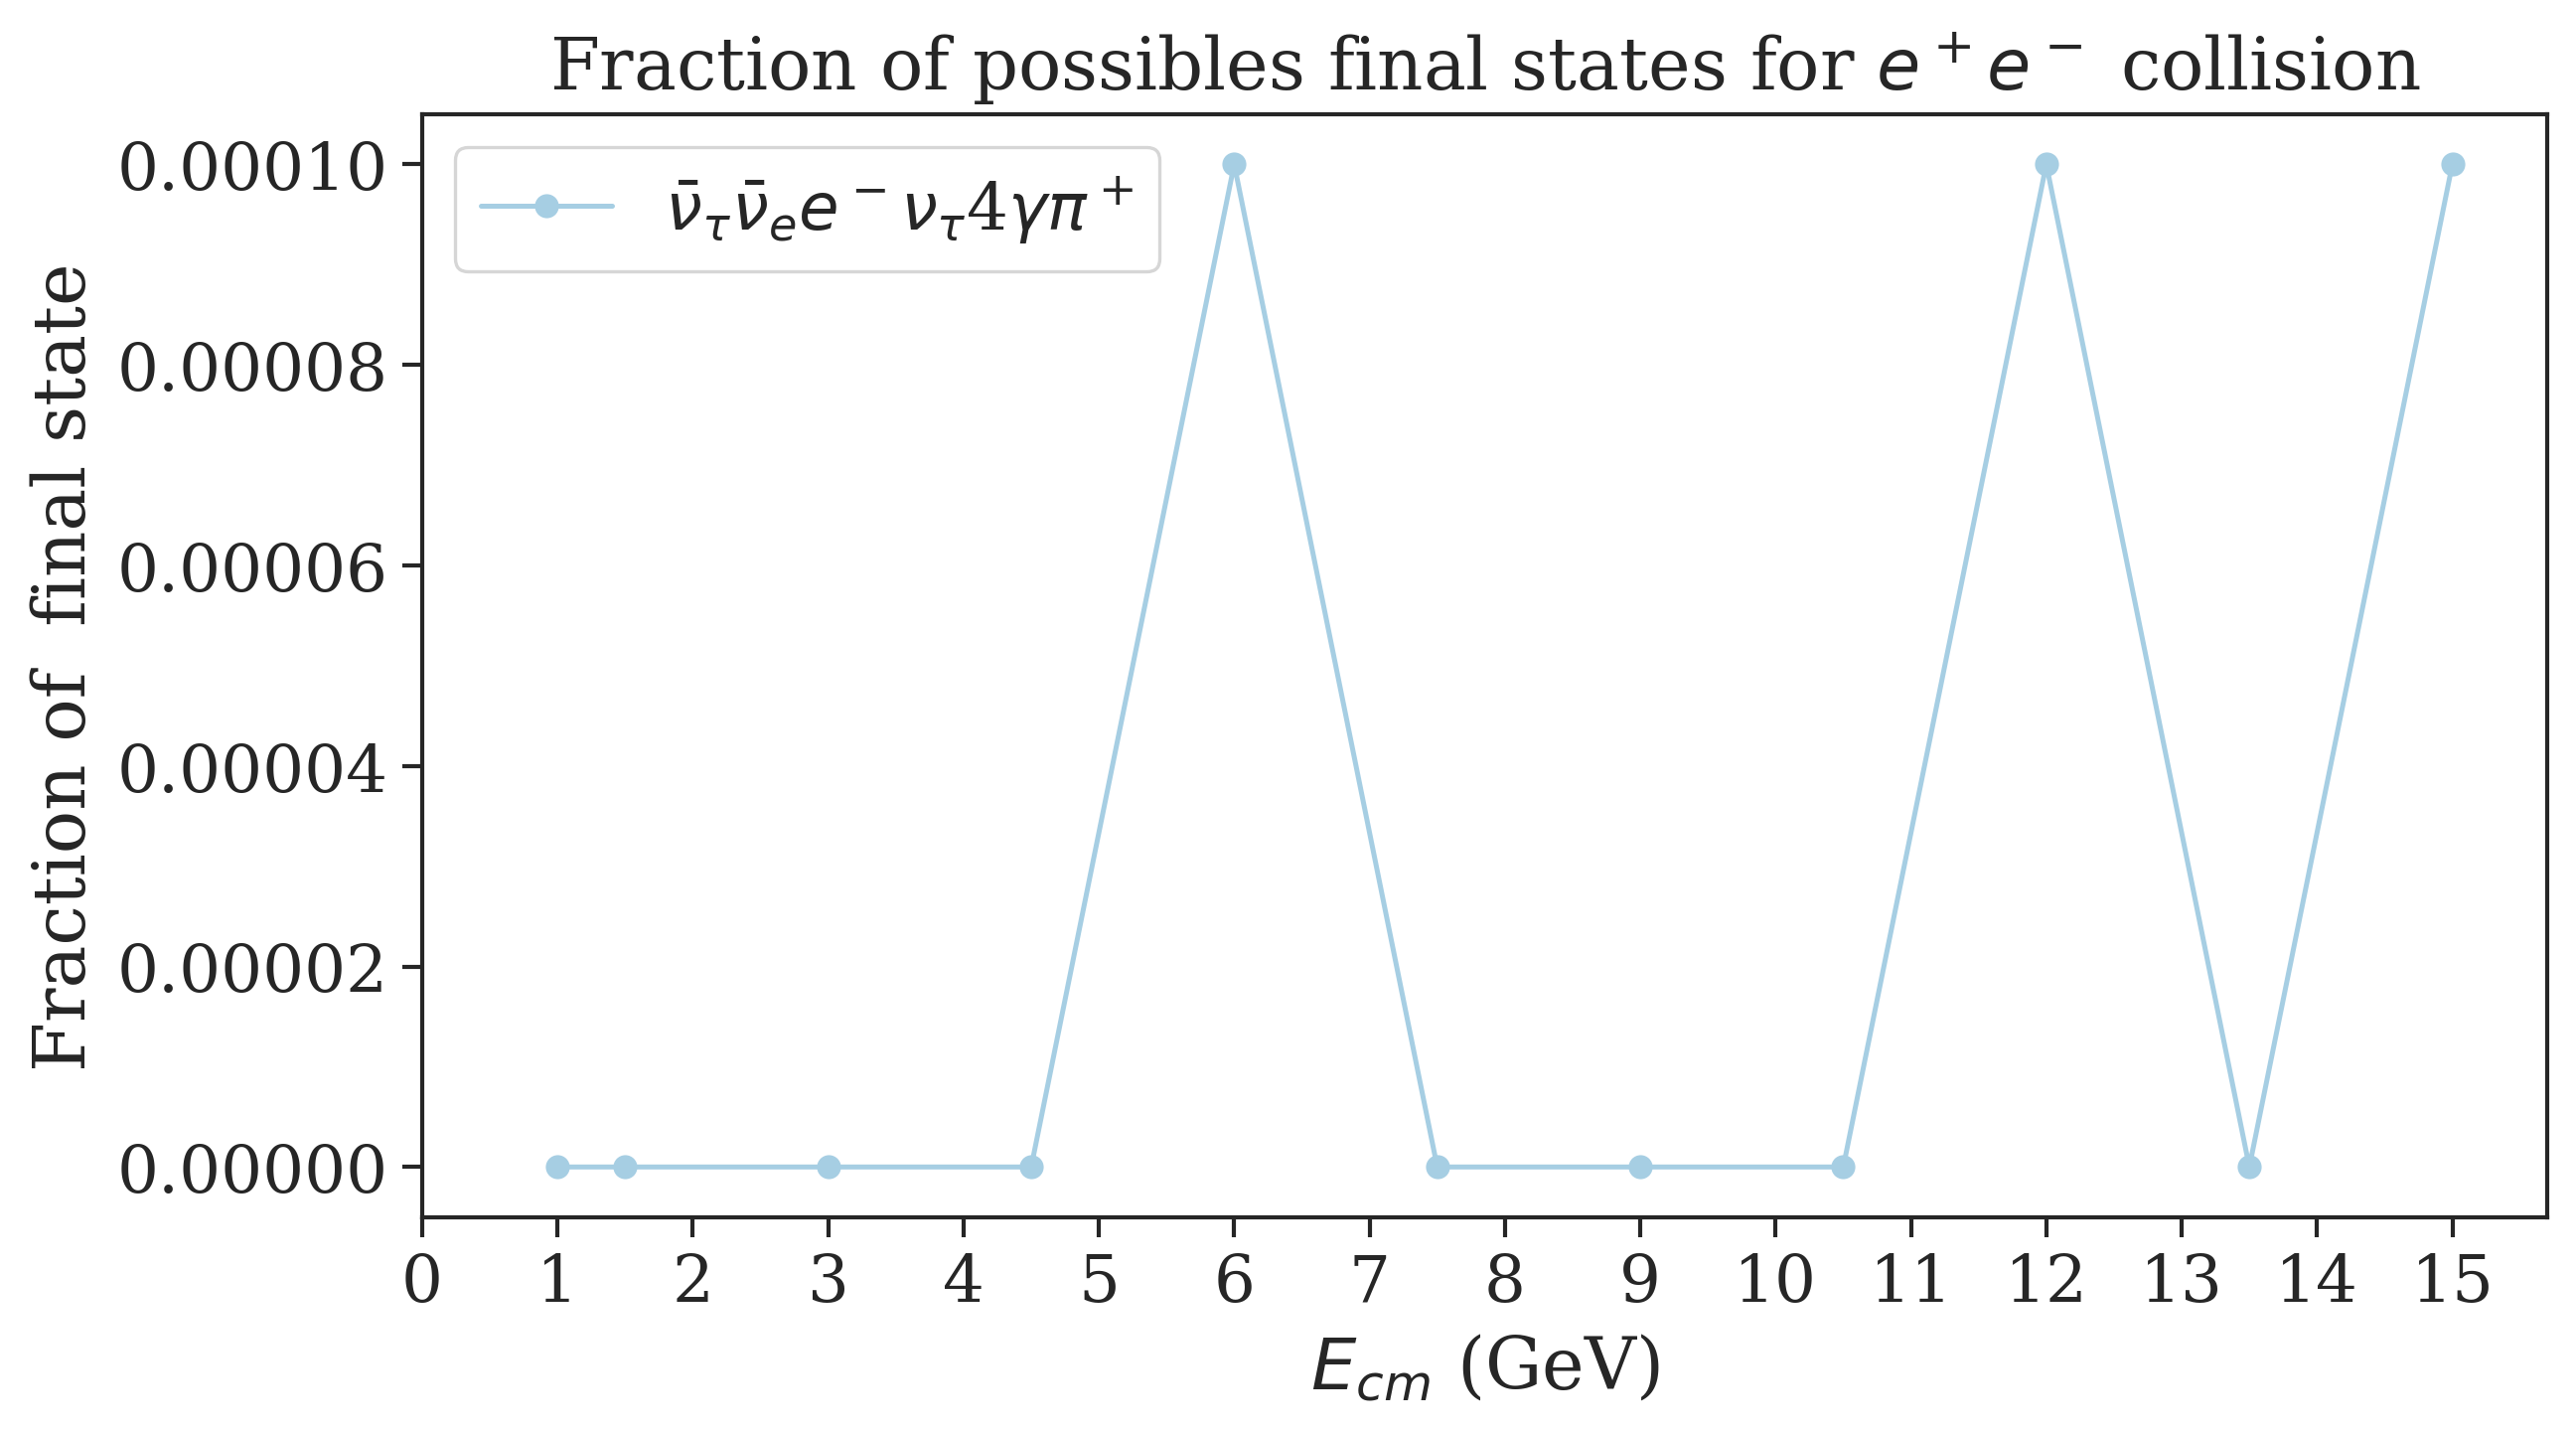

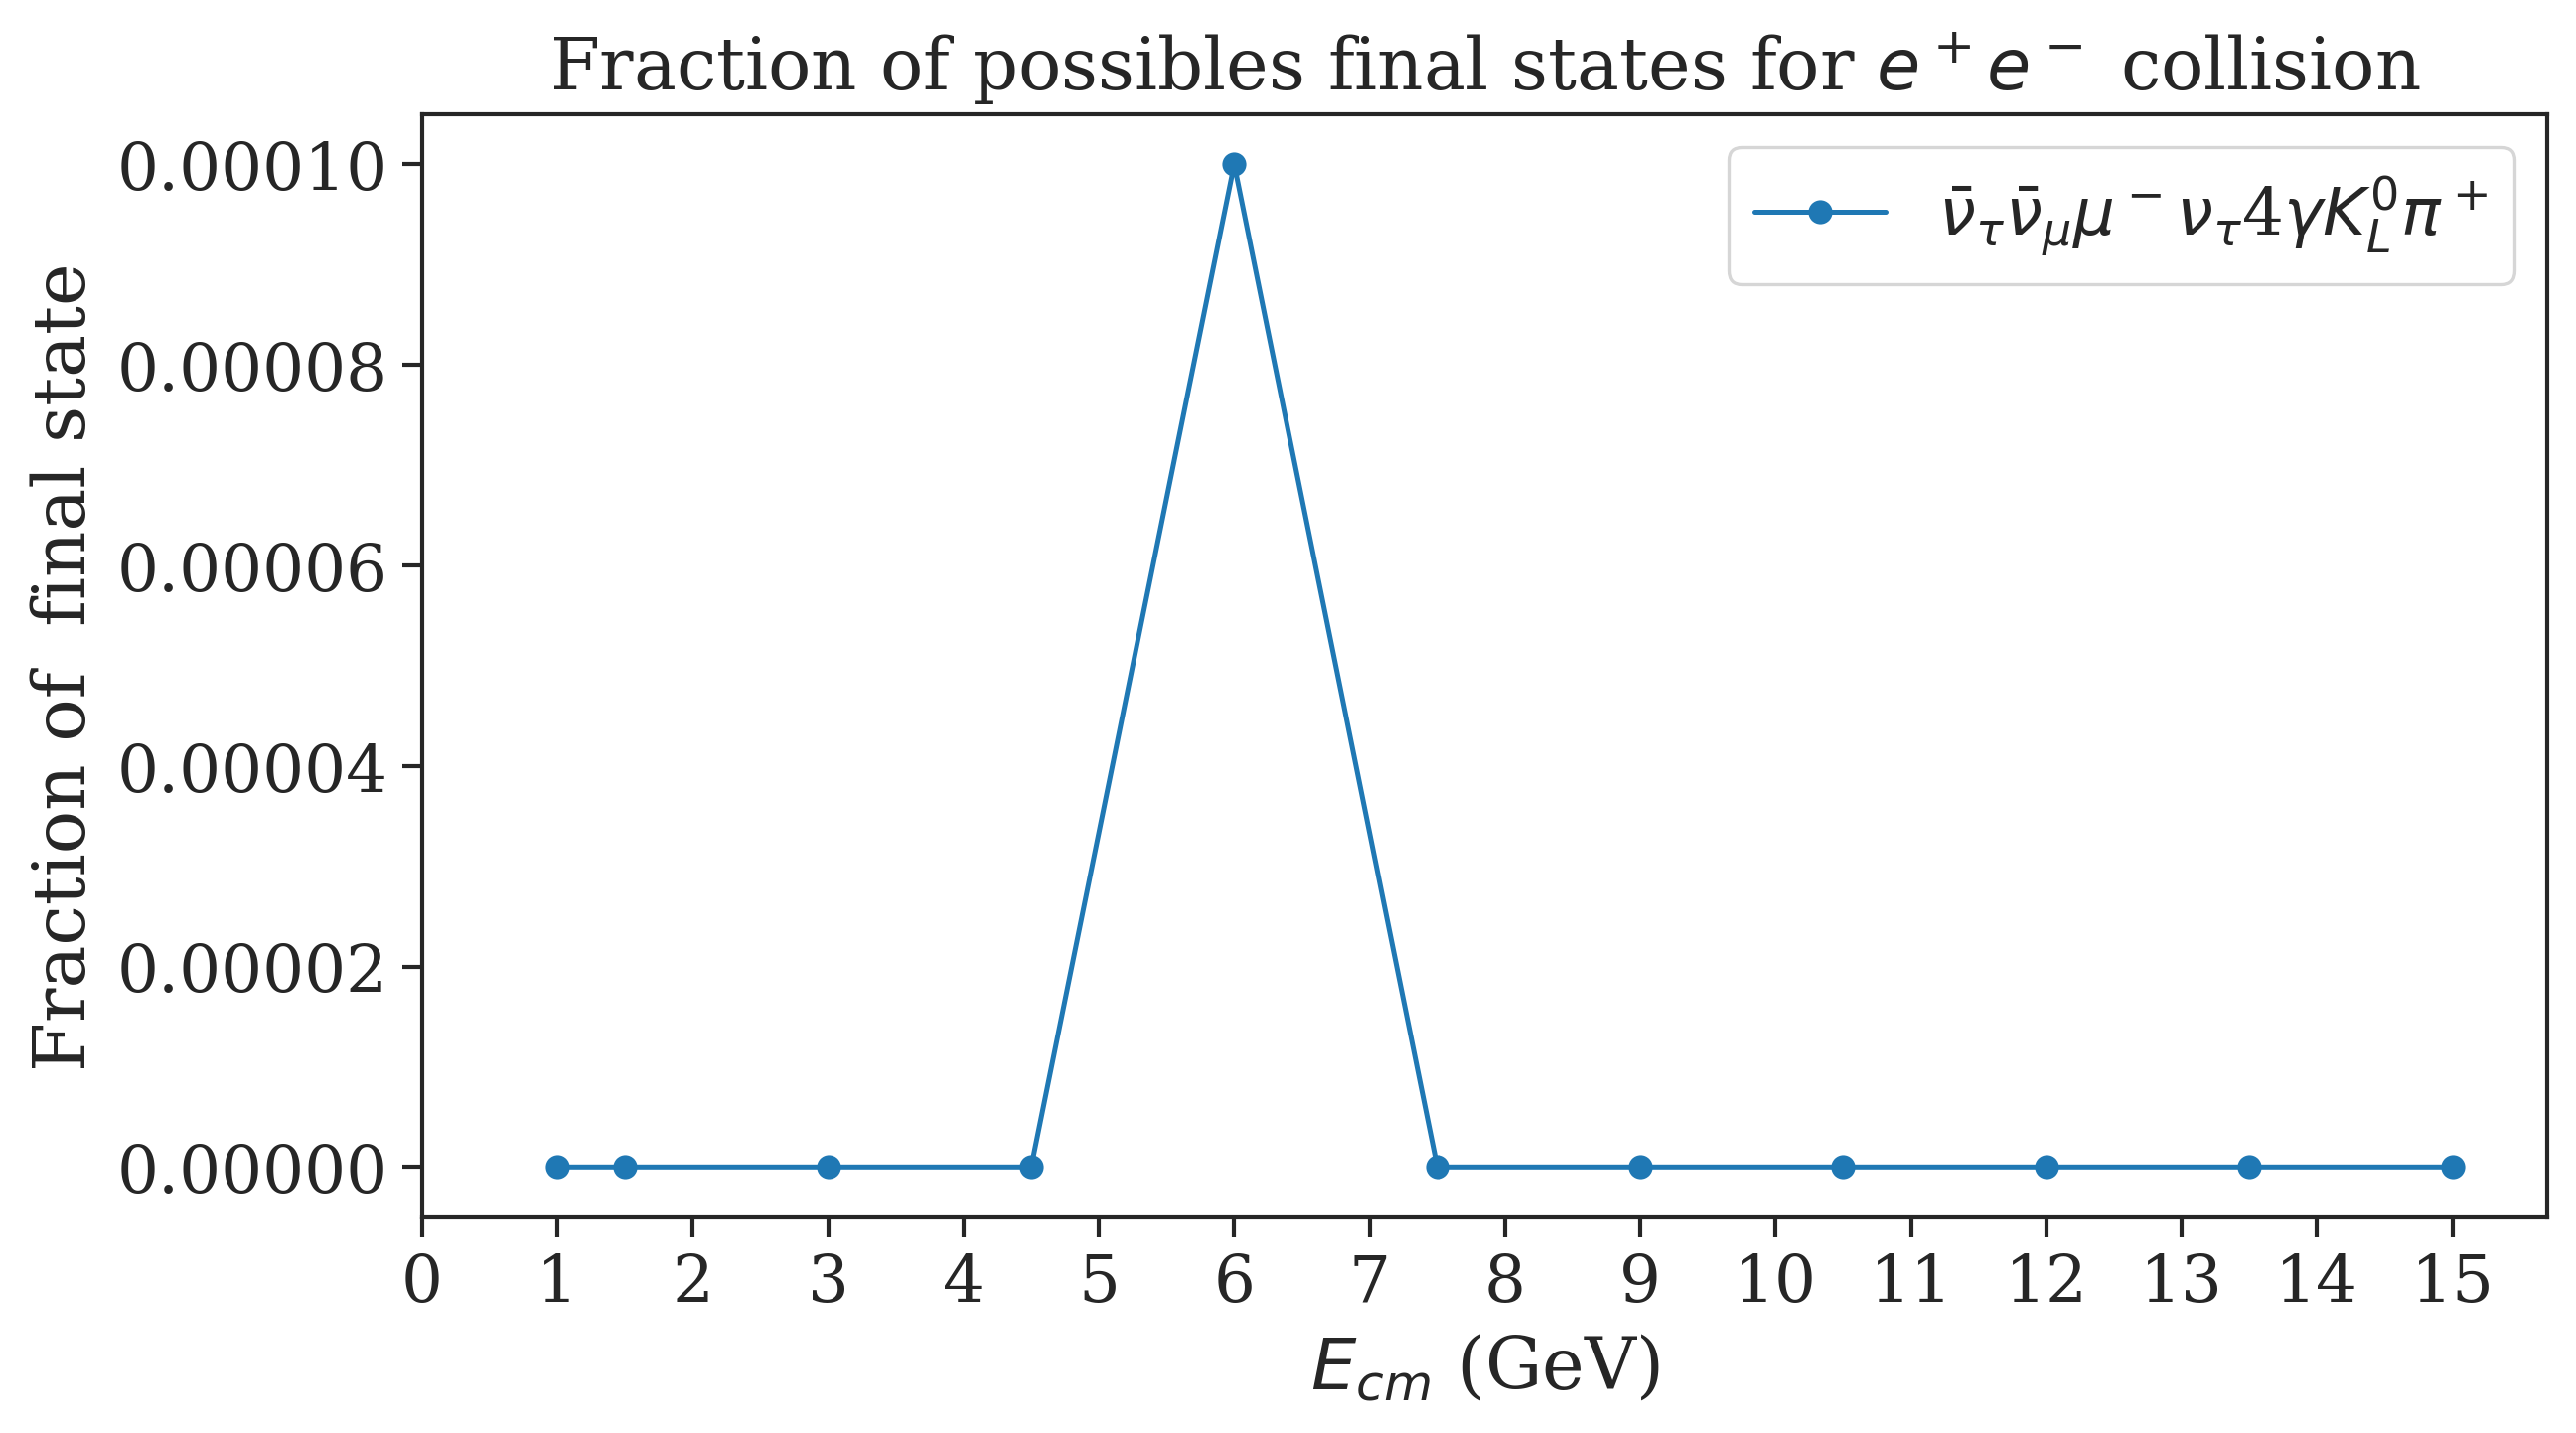

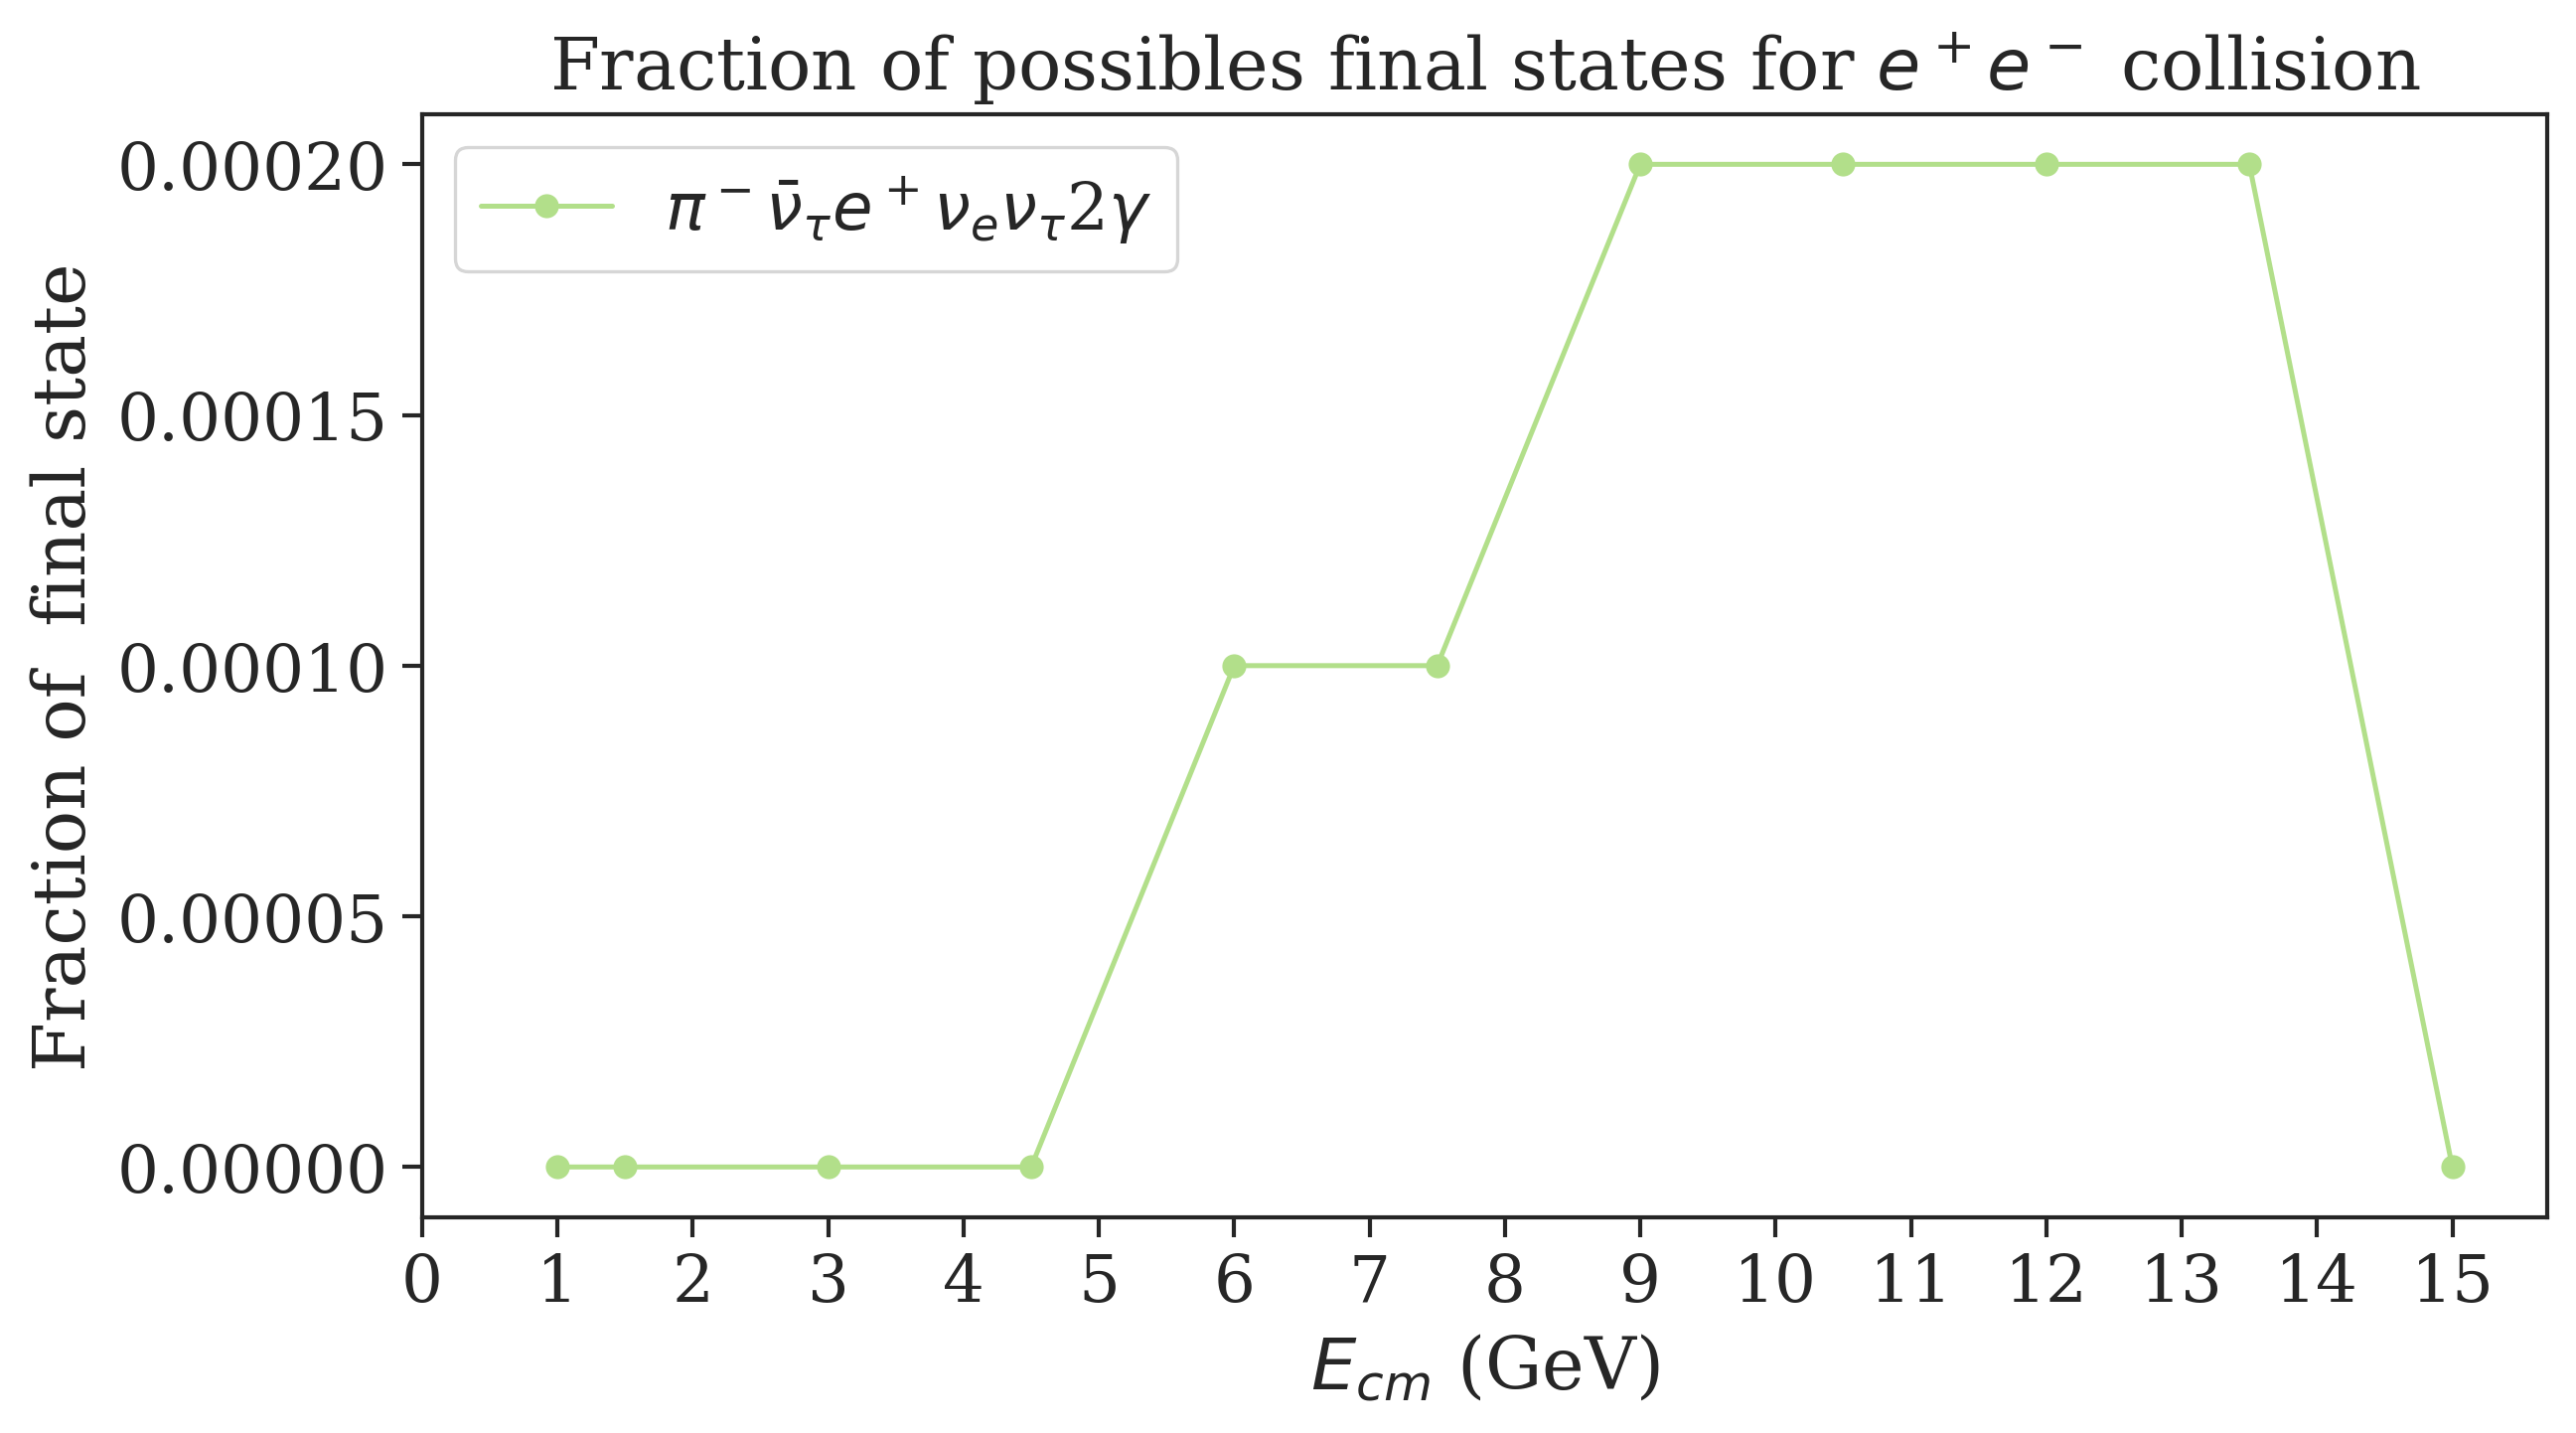

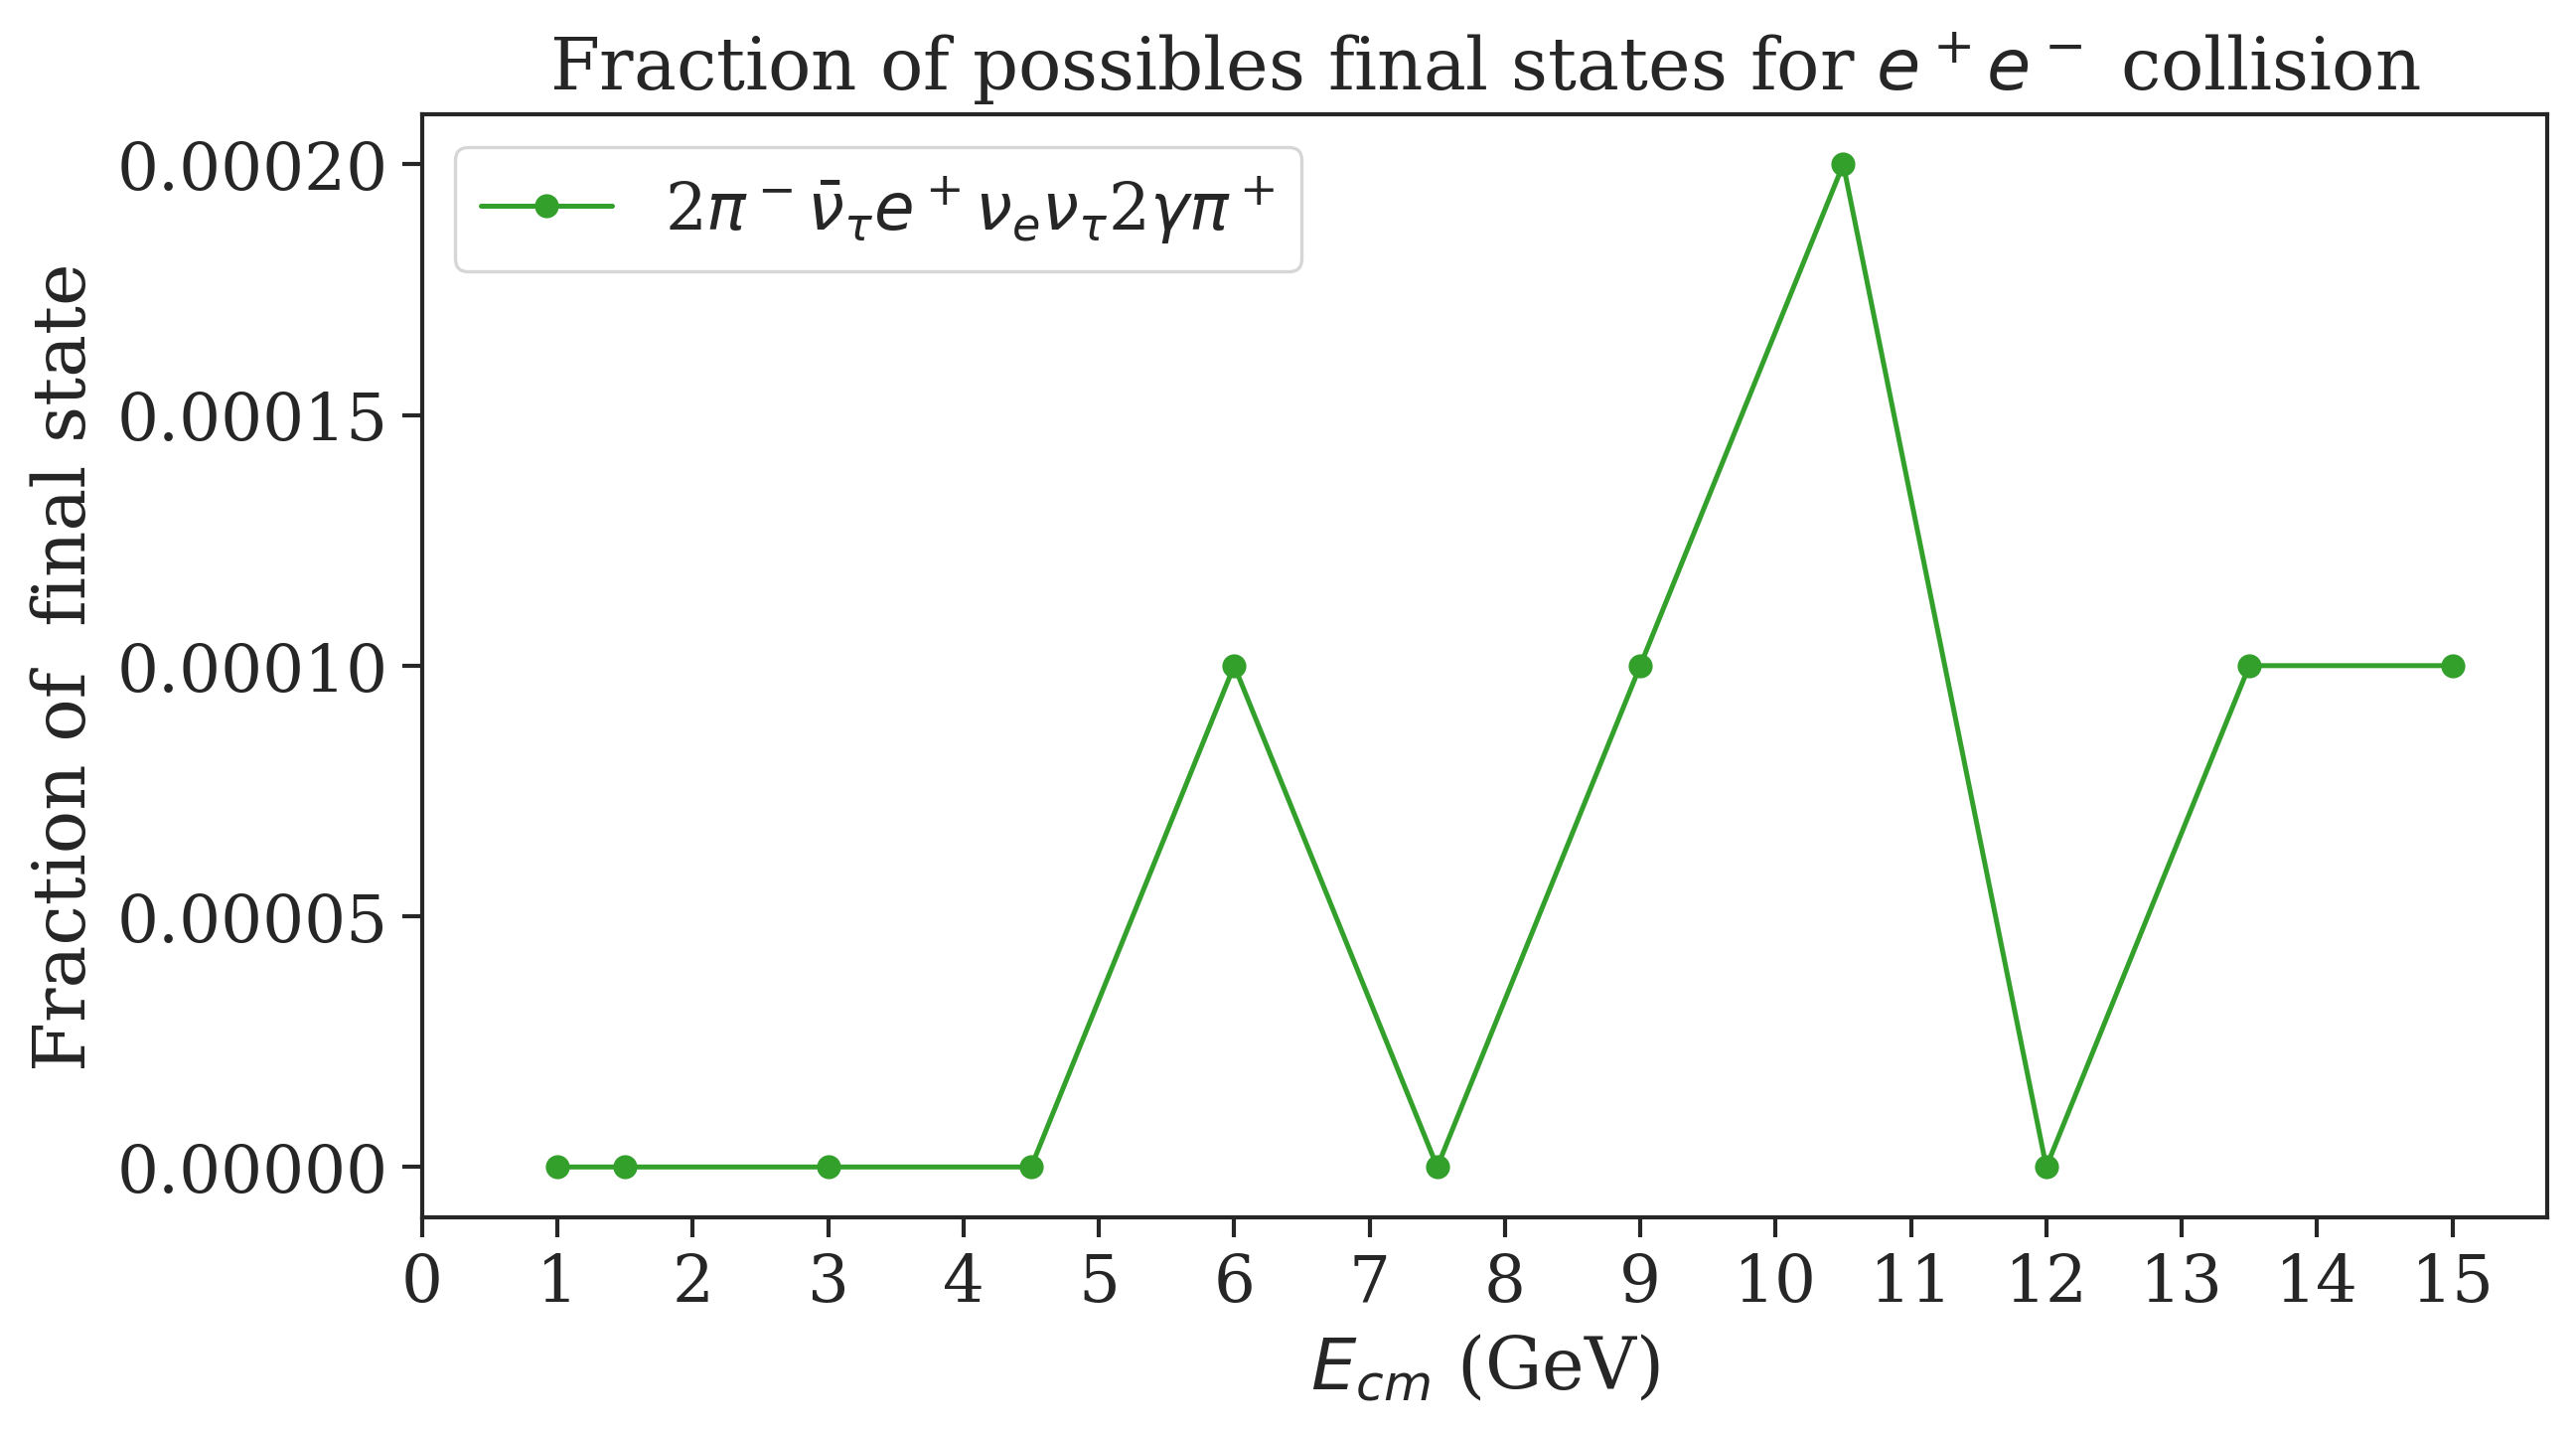

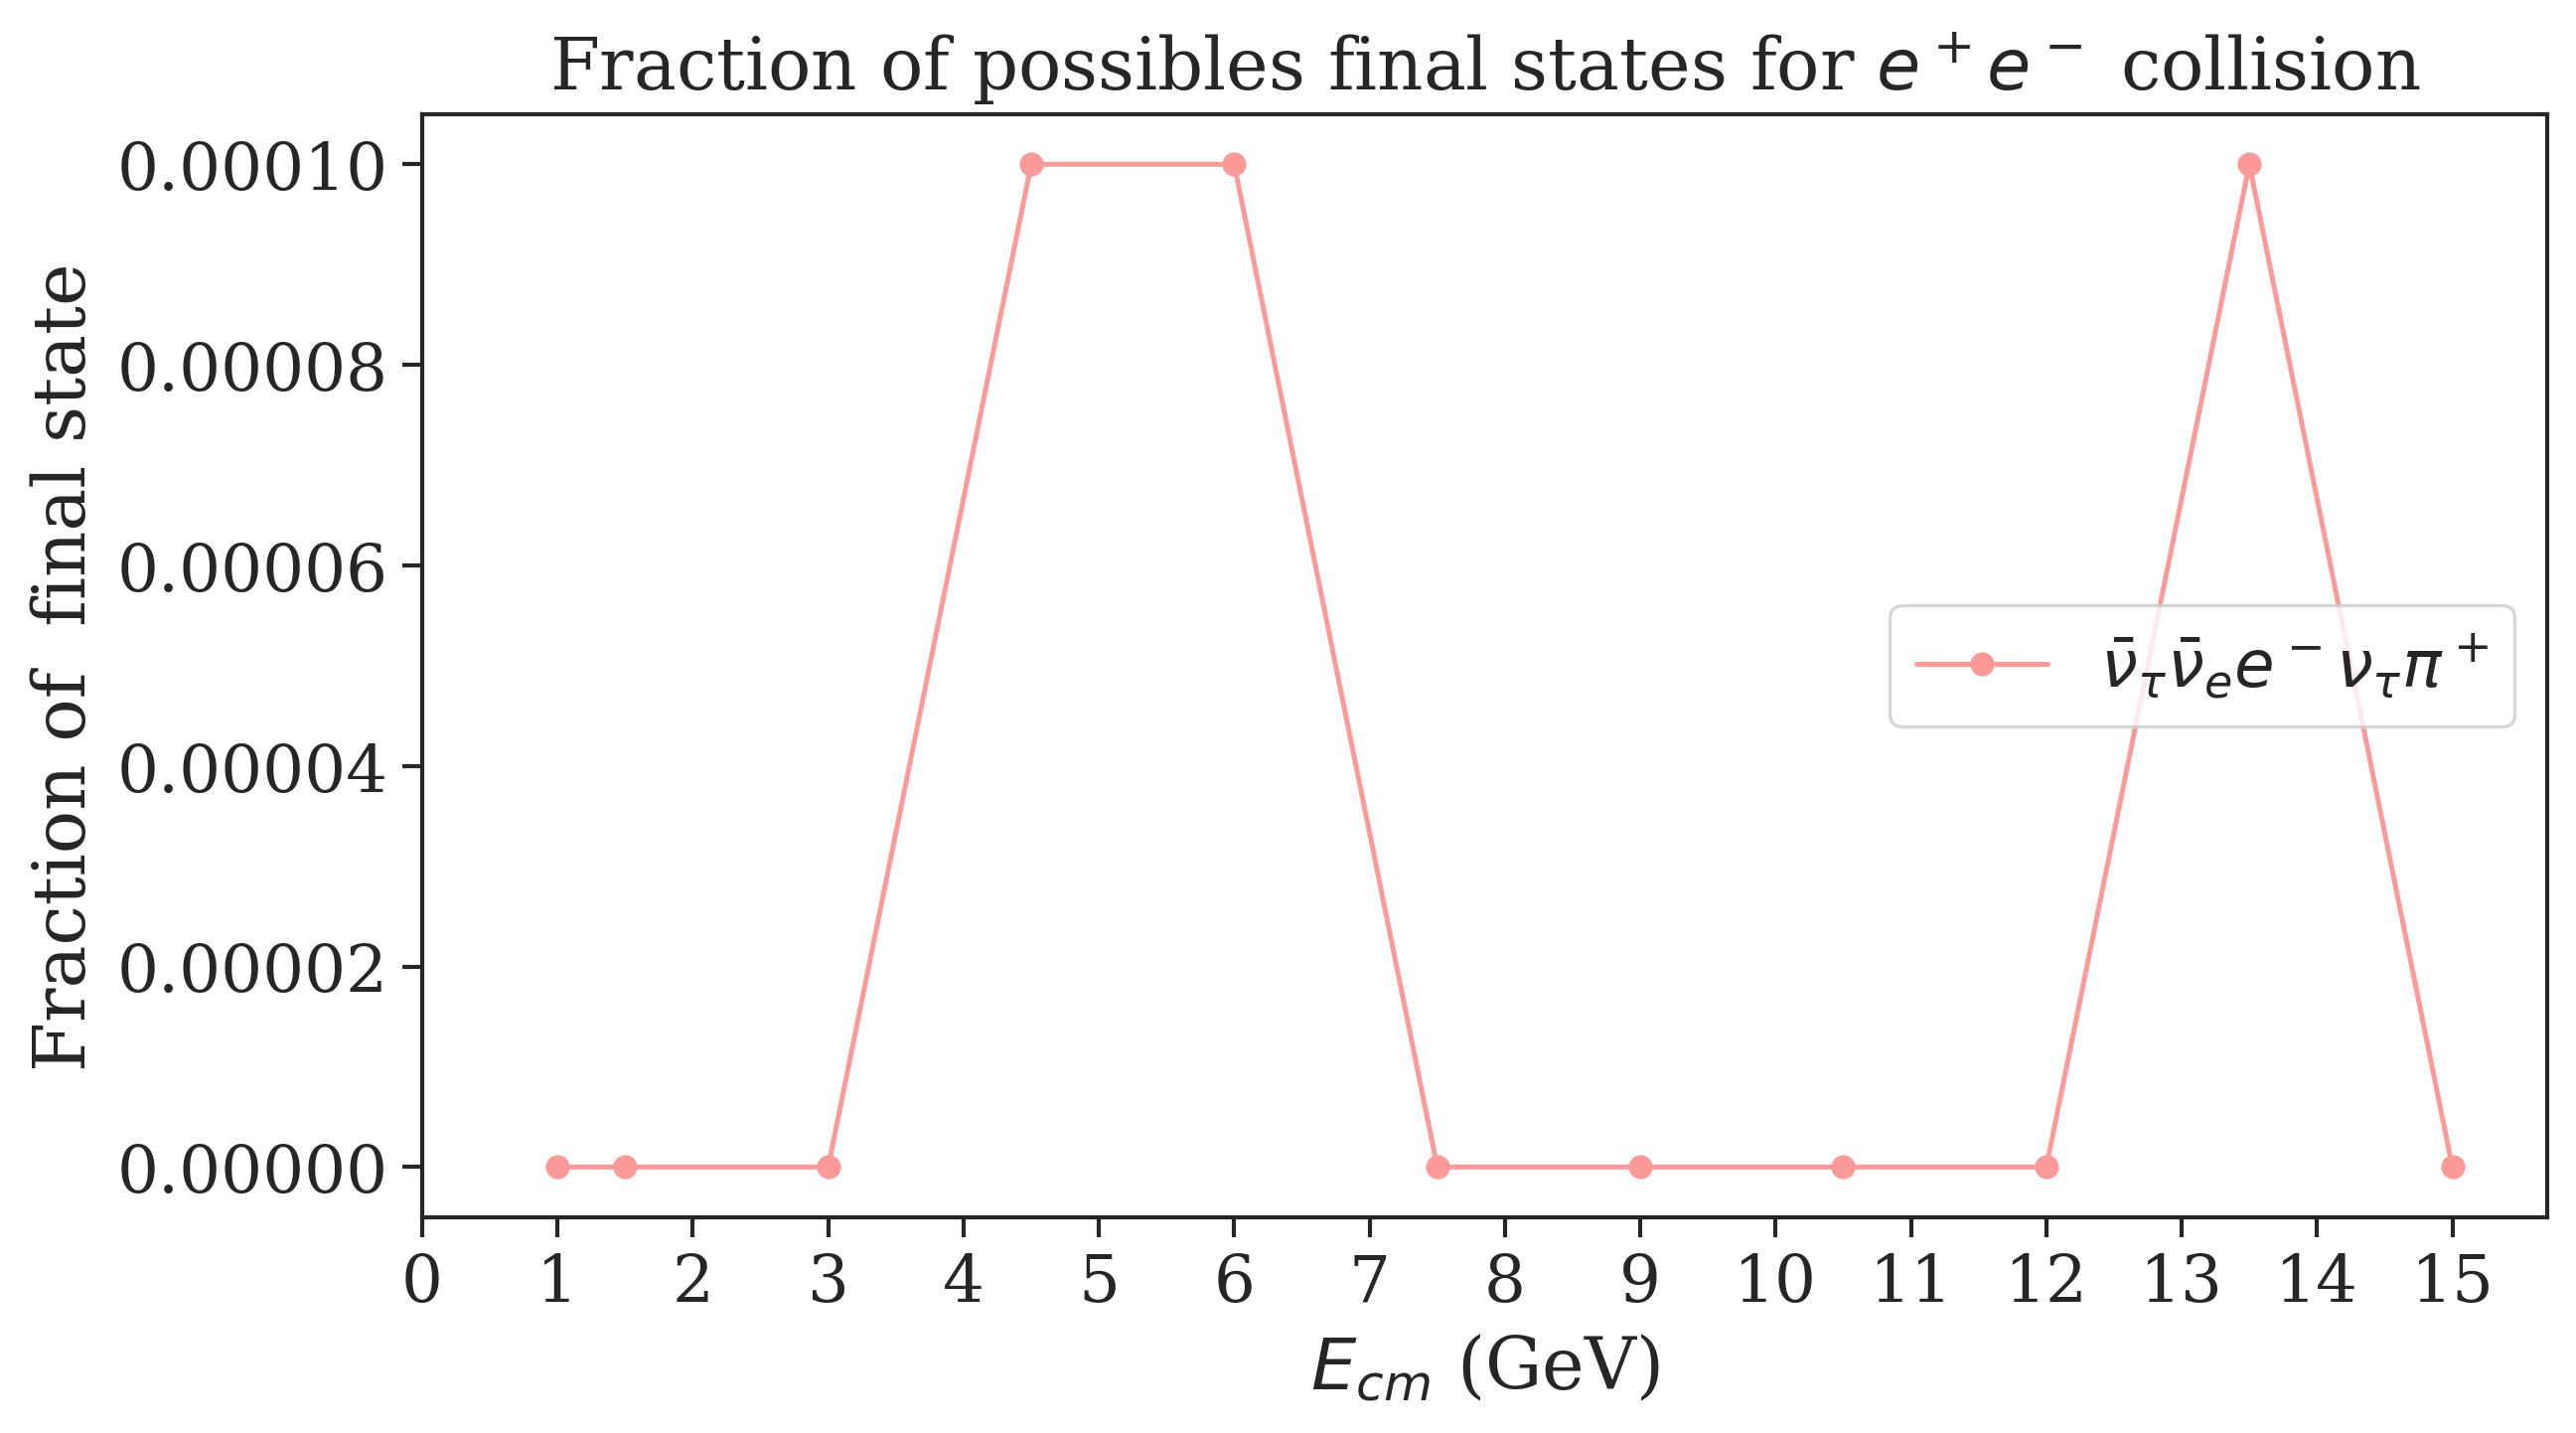

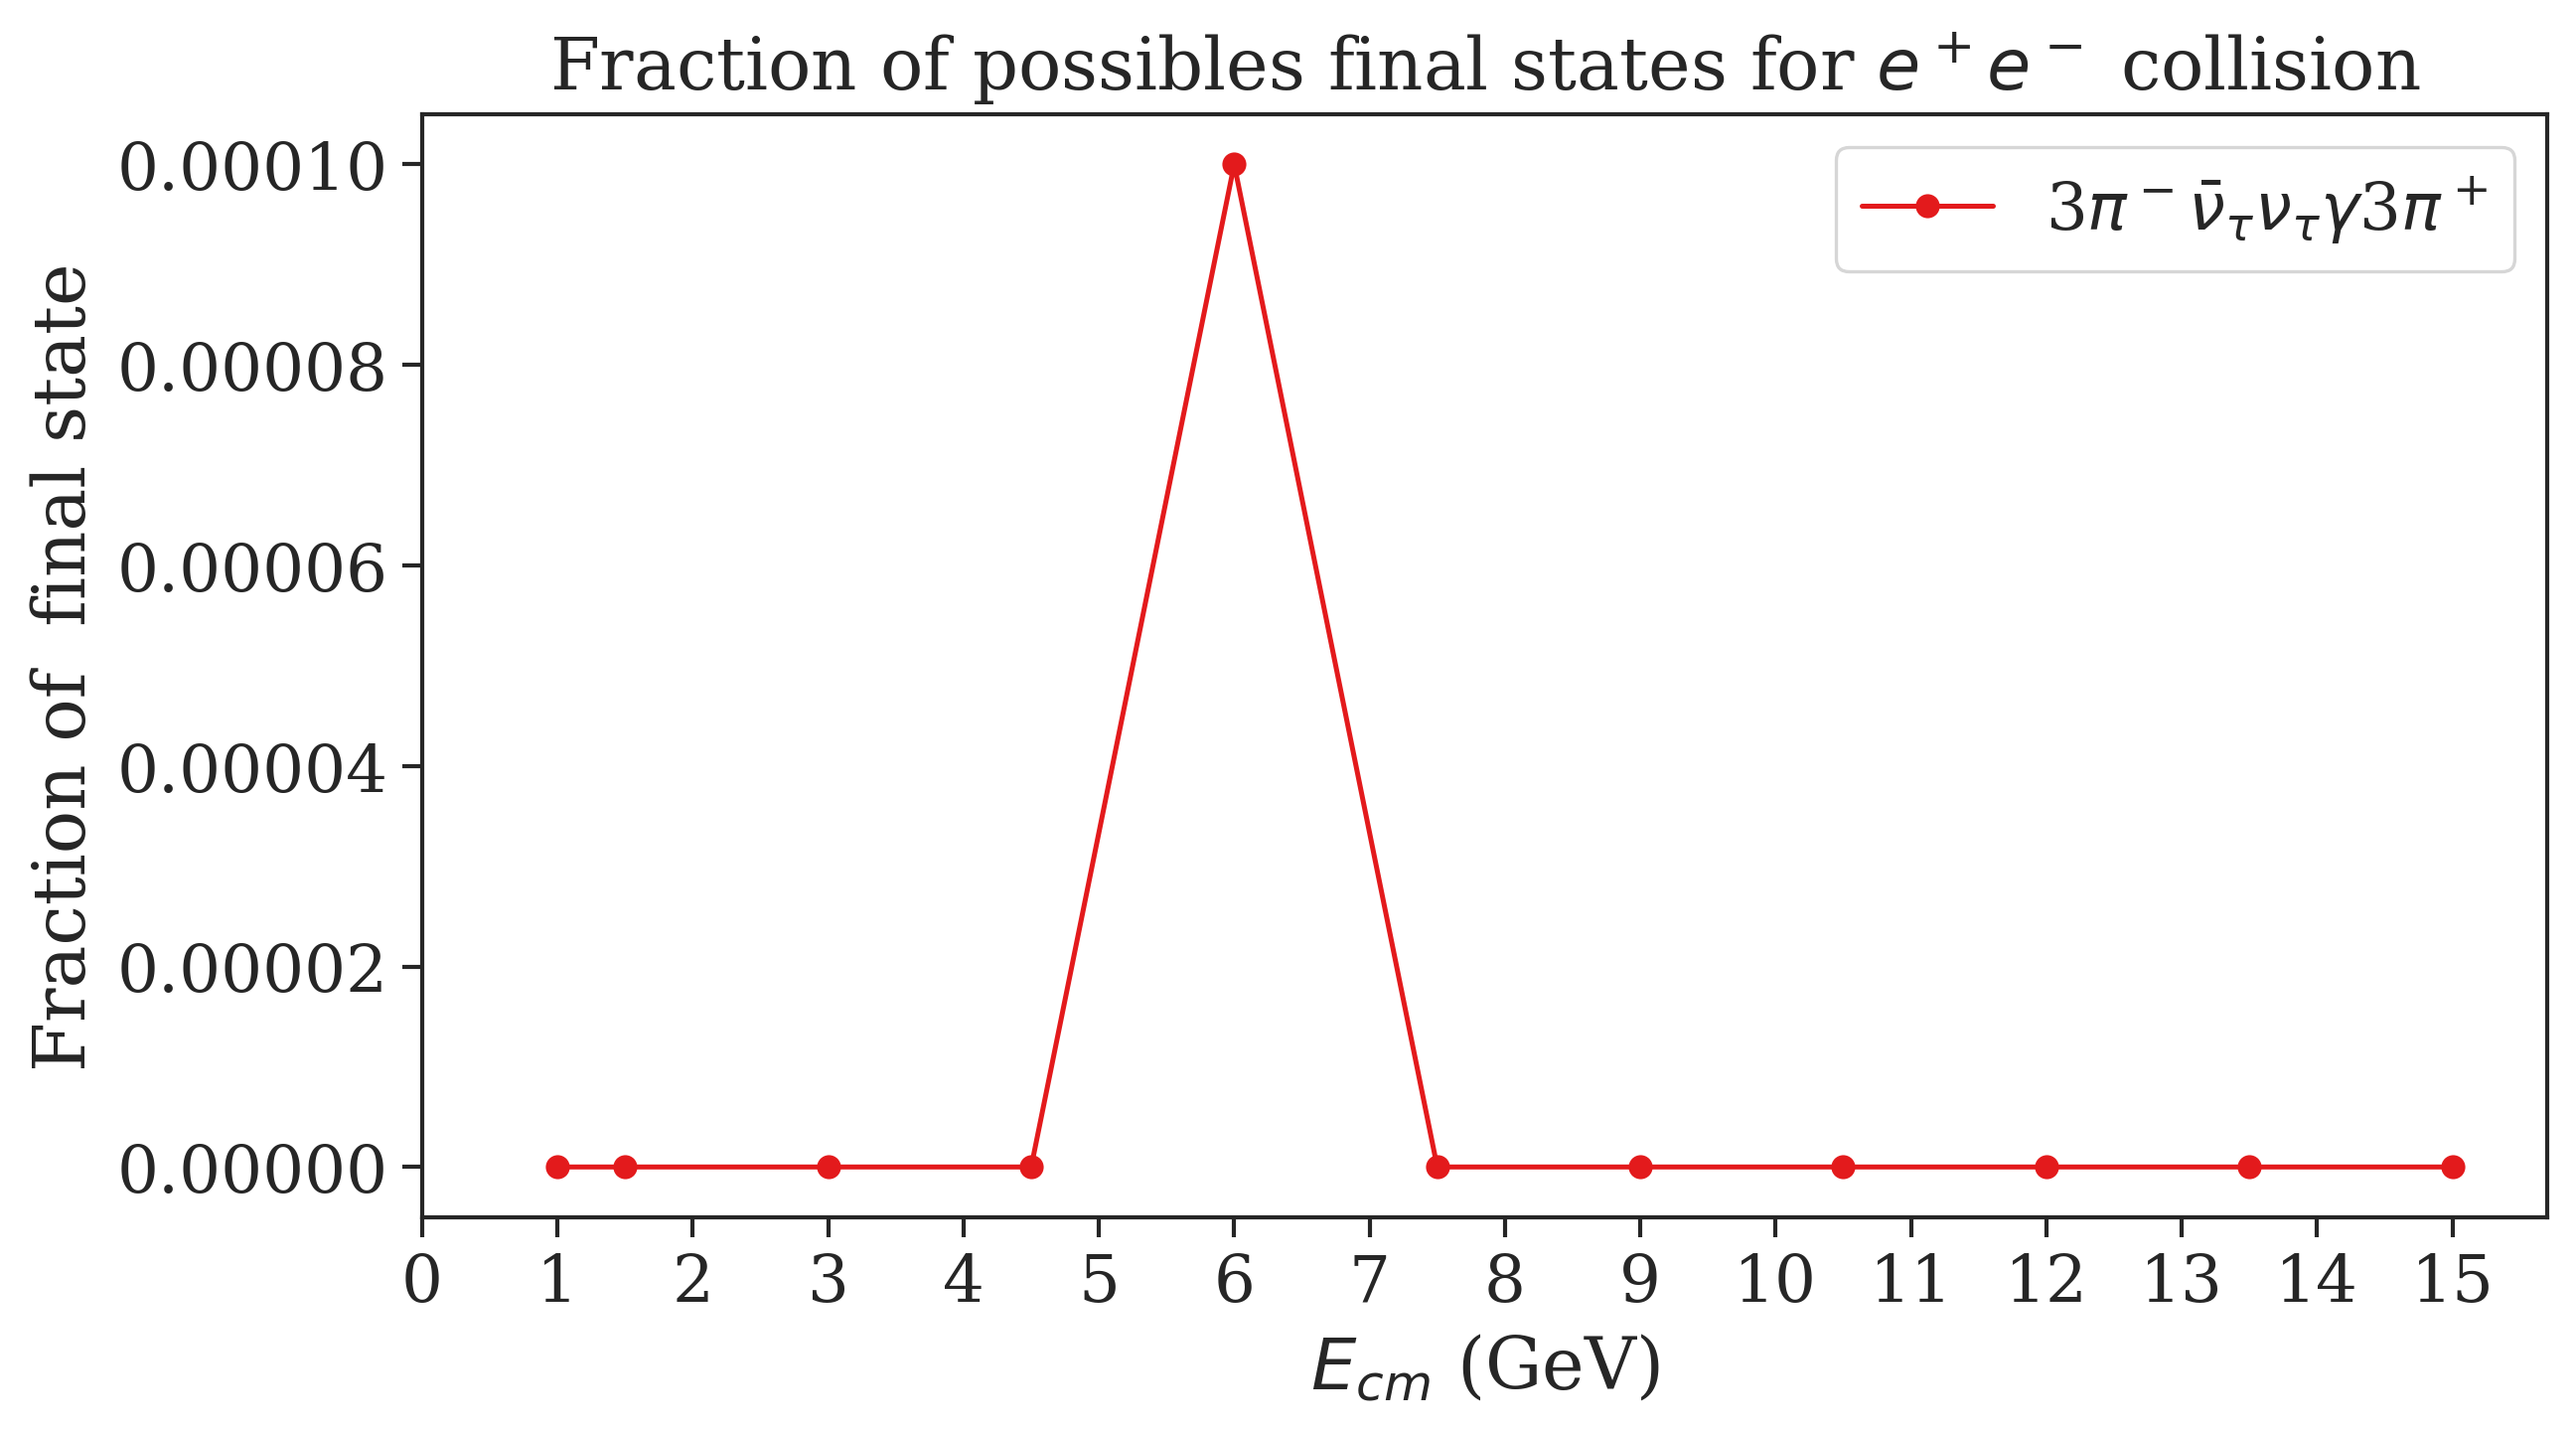

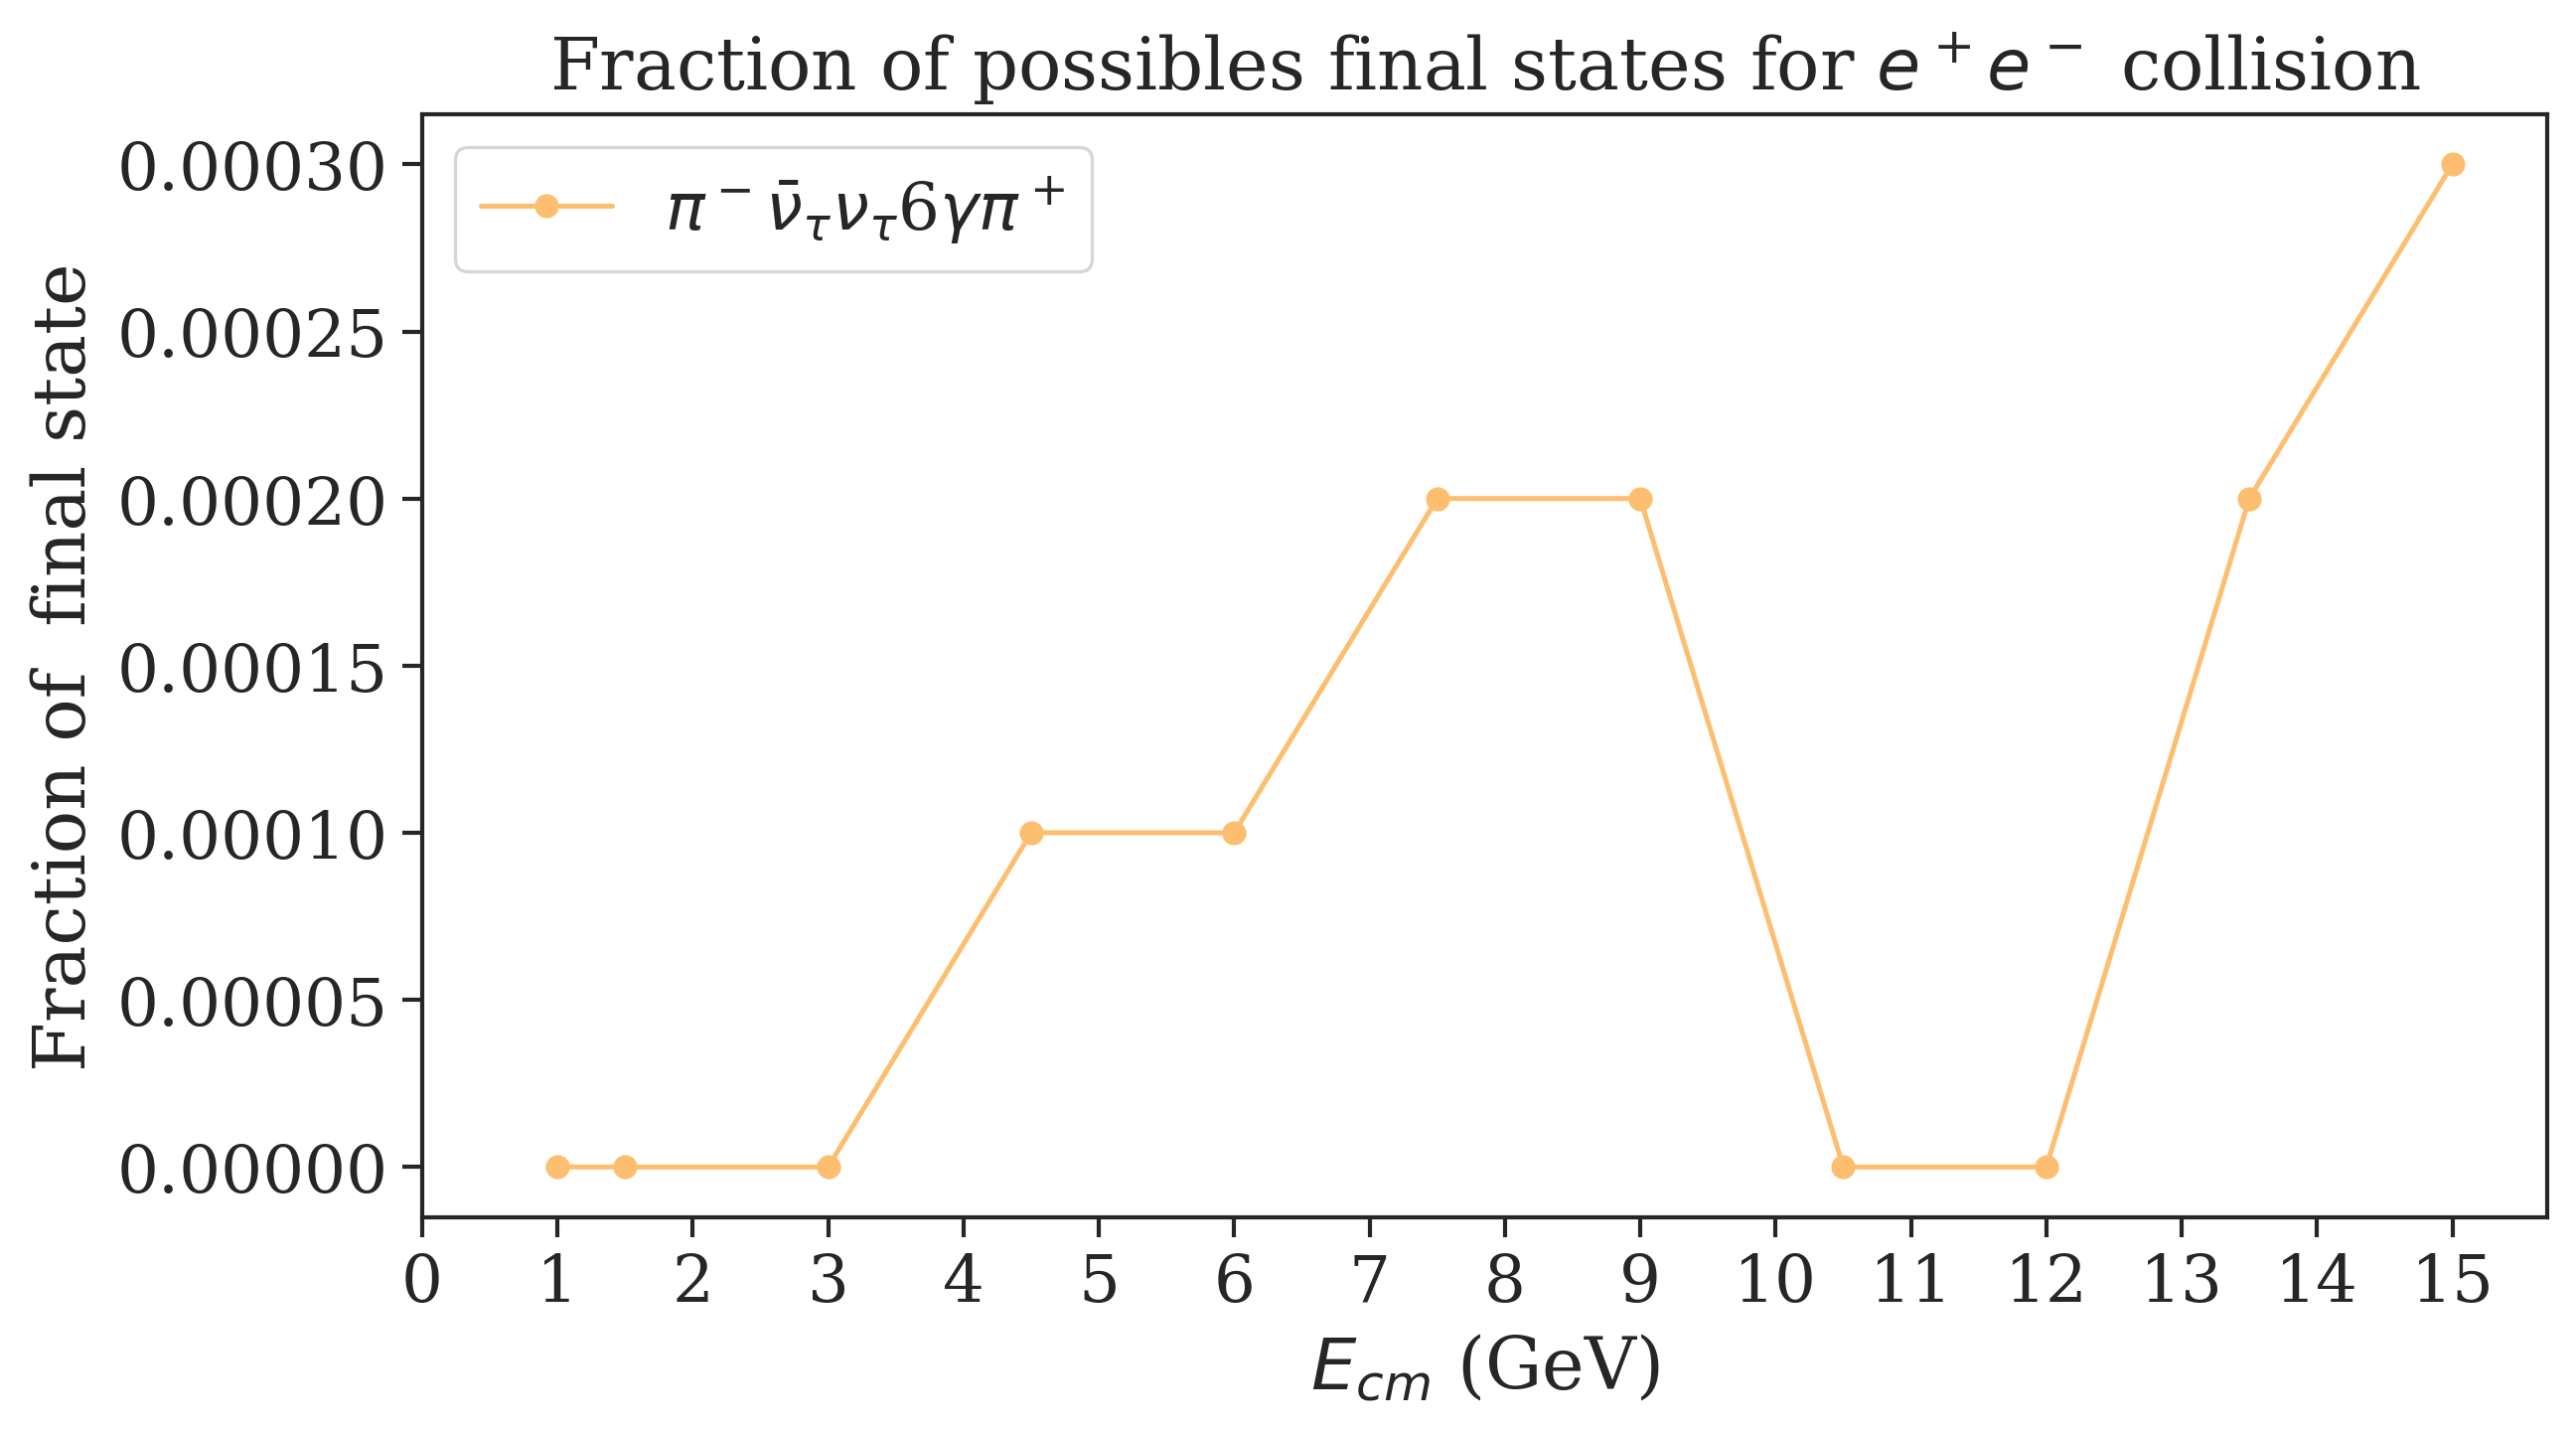

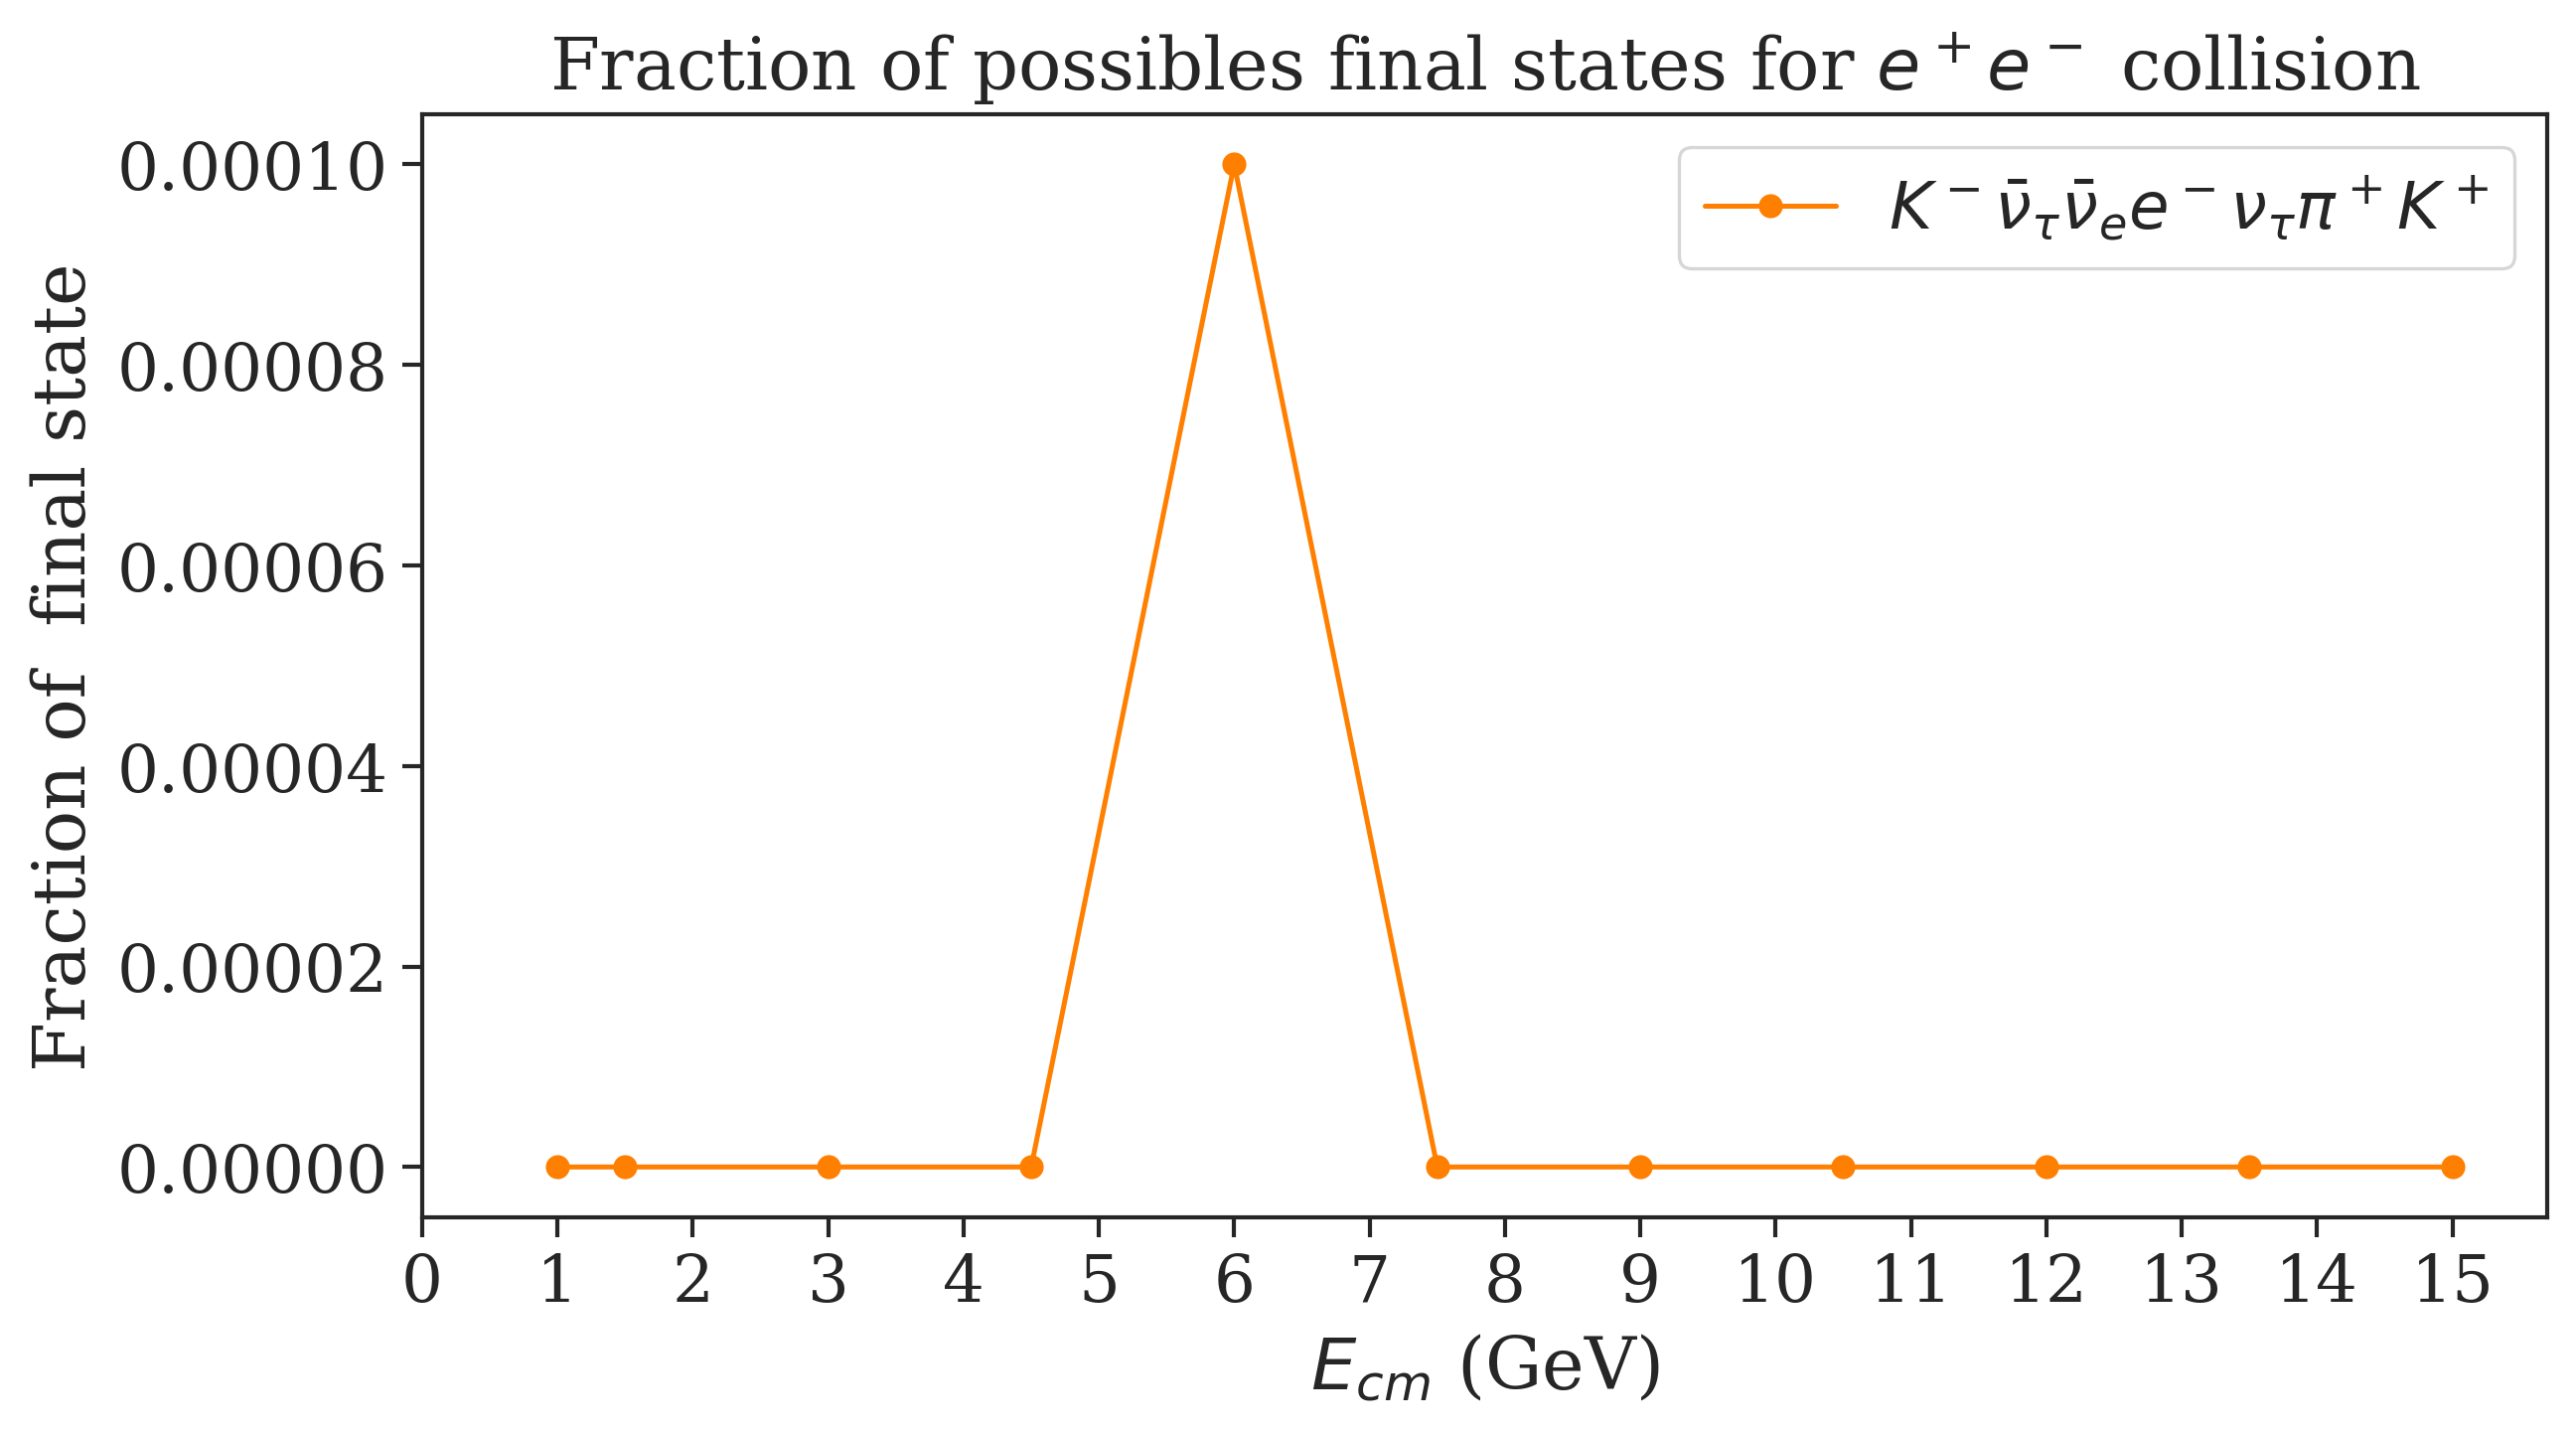

In [27]:
energy = [1,1.5,3,4.5,6,7.5,9,10.5,12,13.5,15]
color = sns.color_palette("Paired",len(eDict[4]))

for i,key in enumerate(eDict[4]):
    f_state = final_state(eDict,key)
    fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
    plt.plot(energy,f_state, marker = 'o', label = key, color = color[i])
    #plt.plot(energy,epem_frac, marker = 'o')
    plt.title(r'Fraction of possibles final states for $e^+e^-$ collision')
    plt.xlabel(r'$E_{cm}$ (GeV)')
    plt.ylabel(r'Fraction of  final state')
    plt.xticks(range(0,16))
    plt.legend()
    plt.show()
    
    